In [1]:
from Burstsearch_forallROIs import *

In [2]:
from matplotlib.pylab import *
from numpy import *
%matplotlib inline

In [3]:
wave = loadtxt("allROIsSignal_OnState_wave.dat")
ctrl = loadtxt("allROIsSignal_OnState_contrl.dat")

print("Wave shape",wave.shape)
print("Ctrl shape",ctrl.shape)

nrois2, nframes = wave.shape
nrois = nrois2//2

thf = 0.6

fullstats = {}

Wave shape (2062, 6000)
Ctrl shape (2062, 6000)


In [4]:
i = randint(0,wave.shape[0]//2)
print(i)
FB = 1.0*wave[i,:] # Blue channel
FA = 1.0*wave[i+nrois,:] # red channel
if isfinite(FA).sum()>0:
    stats = burstanalysis(FB,FA, verbose = True, plot = False,pname=str(i).zfill(3),thf = 0.6, ncycles = 12)
else:
    stats = nan

FB = 1.0*ctrl[i,:] # Blue channel
FA = 1.0*ctrl[i+nrois,:] # red channel
if isfinite(FA).sum()>0:
    statsC = burstanalysis(FB,FA, verbose = True, plot = False,pname=str(i).zfill(3)+" ctrl",thf = 0.6, ncycles = 12)
else:
    statsC = nan

fullstats[i] = [stats,statsC]

17
Particle 017
Selected dF/F = 1.98e-02 +/- 1.38e-02
Total dF/F = 4.82e-04 +/- 4.19e-03
Selected (from dF) dR = 1.06e-03 +/- 5.99e-03
Unselected dR = -1.36e-03 +/- 1.87e-03
Selected (from dR) dR = 3.55e-03 +/- 6.71e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  14.25 +/- 1.6723860200324565
Total length =  57.0
Burst score =  0.28210678645723397 +- 0.39959370223551516
Burst score per time (units of frame)=  0.03409050134207528 +-  0.02150470897204719
Number of intervals =  4
Av. Length =  14.5 +/- 1.346291201783626
Total length =  58.0
Burst score =  0.28210678645723397 +- 0.39959370223551516
Burst score per time (units of frame)=  0.03409050134207528 +-  0.02150470897204719

 The overlap between the 2 burst searchs is 5.26 %


############


Particle 017 ctrl
Selected dF/F = -1.69e-02 +/- 1.24e-02
Total dF/F = -1.45e-03 +/- 3.62e-03
Selected (from dF) dR = 9.10e-03 +/- 4.89e-03
Unselected dR = 6.22e-04 +/- 1.58e-03
Selected (from dR) dR = 4.87e-04 +/- 6.23e-03

 Bu

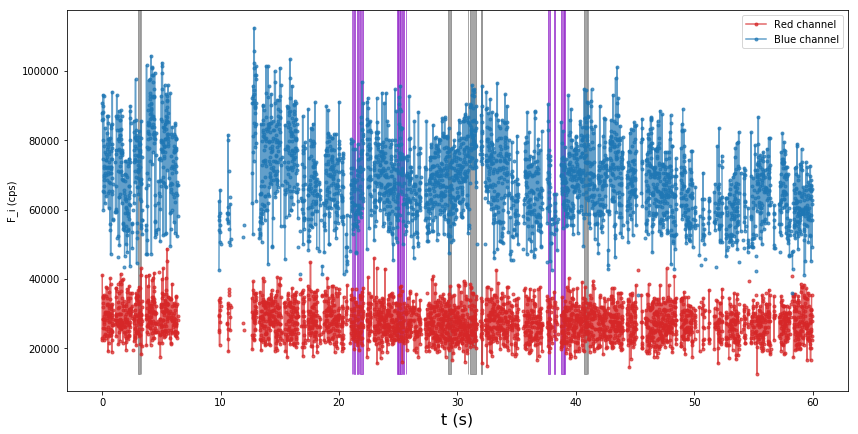

In [5]:
t = arange(0,FA.shape[0])*10e-3
fig = figure(figsize=(14,7))
currentAxis = gca()

Sast = FA.reshape(FA.shape[0]//4,4)
sel = isfinite(Sast.sum(axis=1))

plot(t,FA,'C3.-',alpha=0.7,label="Red channel")
plot(t,FB,'C0.-',alpha=0.7,label="Blue channel")
#print(burst)
ymin = min(concatenate((FA,FB)))*.98
ymax = max(concatenate((FA,FB)))*1.02

tst = t.reshape(t.shape[0]//4,4)
ts = tst[sel,].flatten()
burst = stats["burstIdF"]*4
for b in burst:
    tsb = ts[b[0]:b[1]]
    #print("Interval",tsb[0],tsb[-1],b[0],b[1])
    #print(tsb)
    #print(nsel)
    nsel = arange(tsb.shape[0]-1)[(tsb[1:]-tsb[:-1]-0.01>0.0005)]
    s0 = 0
    for s1 in nsel:
        currentAxis.add_patch(Rectangle((tsb[s0], ymin), tsb[s1]-tsb[s0], ymax,alpha=0.7,color='gray'))
        #print(tsb[s0],tsb[s1])
        s0 = s1+1
    #break
    
burst = stats["burstIdR"]*4
for b in burst:
    tsb = ts[b[0]:b[1]]
    nsel = arange(tsb.shape[0]-1)[(tsb[1:]-tsb[:-1]-0.01>0.0005)]
    s0 = 0
    for s1 in nsel:
        currentAxis.add_patch(Rectangle((tsb[s0], ymin), tsb[s1]-tsb[s0], ymax,alpha=0.7,color='darkorchid'))
        s0 = s1+1
xlabel("t (s)",fontsize = 16)
ylabel("F_i (cps)")
legend()

In [6]:
print("Empezamos!")

Empezamos!


Particle 000
Selected dF/F = -9.74e-03 +/- 1.37e-02
Total dF/F = -1.75e-03 +/- 4.00e-03
Selected (from dF) dR = 5.42e-03 +/- 4.42e-03
Unselected dR = 1.69e-03 +/- 1.85e-03
Selected (from dR) dR = 6.09e-03 +/- 4.77e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  13.8 +/- 0.8197560612767679
Total length =  69.0
Burst score =  -0.13438089596770664 +- 0.3628456212694472
Burst score per time (units of frame)=  -0.021020434215436676 +-  0.018554512867745614
Number of intervals =  7
Av. Length =  16.857142857142858 +/- 1.7074694419062764
Total length =  118.0
Burst score =  -0.13438089596770664 +- 0.3628456212694472
Burst score per time (units of frame)=  -0.021020434215436676 +-  0.018554512867745614

 The overlap between the 2 burst searchs is 5.80 %


############


Particle 001
Selected dF/F = -1.90e-02 +/- 5.50e-02
Total dF/F = 1.17e-02 +/- 8.98e-03
Selected (from dF) dR = -2.34e-03 +/- 1.13e-02
Unselected dR = 5.48e-04 +/- 2.44e-03
Selected (from dR) dR = 2.37e-04 +/-

Particle 019
Selected dF/F = 4.32e-02 +/- 1.55e-02
Total dF/F = -4.41e-03 +/- 2.81e-03
Selected (from dF) dR = 1.08e-02 +/- 7.43e-03
Unselected dR = 5.23e-04 +/- 1.26e-03
Selected (from dR) dR = 5.59e-03 +/- 4.27e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  19.0 +/- 0.0
Total length =  19.0
Burst score =  0.8217218558378492 +- 0.0
Burst score per time (units of frame)=  0.04324851872830785 +-  0.06749219287644158
Number of intervals =  6
Av. Length =  13.166666666666666 +/- 0.43567742059328124
Total length =  79.0
Burst score =  0.8217218558378492 +- 0.0
Burst score per time (units of frame)=  0.04324851872830785 +-  0.06749219287644158

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 021
Selected dF/F = 2.53e-01 +/- 1.11e-01
Total dF/F = 1.89e-03 +/- 7.91e-03
Selected (from dF) dR = -9.93e-03 +/- 9.18e-03
Unselected dR = 1.36e-03 +/- 1.16e-03
Selected (from dR) dR = 5.56e-03 +/- 3.40e-03

 Burst statistics dF/F
Number of intervals =  

Particle 038
Selected dF/F = 5.83e-02 +/- 1.30e-02
Total dF/F = 4.20e-04 +/- 2.95e-03
Selected (from dF) dR = 4.02e-03 +/- 8.44e-03
Unselected dR = -2.13e-04 +/- 1.63e-03
Selected (from dR) dR = -7.91e-03 +/- 9.97e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  13.5 +/- 1.0606601717798212
Total length =  27.0
Burst score =  0.7873084948343869 +- 0.012722861949707842
Burst score per time (units of frame)=  0.06002838094607833 +-  0.03315078916958464
Number of intervals =  2
Av. Length =  14.5 +/- 1.7677669529663687
Total length =  29.0
Burst score =  0.7873084948343869 +- 0.012722861949707842
Burst score per time (units of frame)=  0.06002838094607833 +-  0.03315078916958464

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 040
Selected dF/F = -1.69e-02 +/- 2.01e-02
Total dF/F = -1.06e-03 +/- 1.18e-02
Selected (from dF) dR = 3.45e-03 +/- 4.37e-03
Unselected dR = 3.14e-03 +/- 2.32e-03
Selected (from dR) dR = 1.13e-02 +/- 4.16e-03

 Burst sta

Particle 052
Selected dF/F = -2.72e-02 +/- 9.14e-03
Total dF/F = 6.98e-04 +/- 2.80e-03
Selected (from dF) dR = -2.97e-03 +/- 4.48e-03
Unselected dR = 2.11e-03 +/- 1.38e-03
Selected (from dR) dR = -8.10e-03 +/- 8.98e-03

 Burst statistics dF/F
Number of intervals =  8
Av. Length =  13.75 +/- 0.8431710977020025
Total length =  110.0
Burst score =  -0.3738991531527599 +- 0.22585133765050194
Burst score per time (units of frame)=  -0.009538769914867063 +-  0.009298124752638193
Number of intervals =  3
Av. Length =  13.333333333333334 +/- 0.7200822998230956
Total length =  40.0
Burst score =  -0.3738991531527599 +- 0.22585133765050194
Burst score per time (units of frame)=  -0.009538769914867063 +-  0.009298124752638193

 The overlap between the 2 burst searchs is 32.50 %


############


Particle 053
Selected dF/F = 1.16e-01 +/- 2.72e-02
Total dF/F = 6.15e-03 +/- 7.92e-03
Selected (from dF) dR = 1.10e-02 +/- 7.45e-03
Unselected dR = -1.09e-05 +/- 2.19e-03
Selected (from dR) dR = 6.23e-03 +

Particle 067
Selected dF/F = -1.59e-02 +/- 1.01e-02
Total dF/F = -7.98e-04 +/- 2.92e-03
Selected (from dF) dR = -1.70e-03 +/- 3.75e-03
Unselected dR = -8.23e-04 +/- 1.19e-03
Selected (from dR) dR = 6.64e-04 +/- 4.08e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  15.0 +/- 0.8164965809277261
Total length =  45.0
Burst score =  -0.23799220265862672 +- 0.3381760026465892
Burst score per time (units of frame)=  -0.02420618795552452 +-  0.016821188778981488
Number of intervals =  4
Av. Length =  13.0 +/- 0.0
Total length =  52.0
Burst score =  -0.23799220265862672 +- 0.3381760026465892
Burst score per time (units of frame)=  -0.02420618795552452 +-  0.016821188778981488

 The overlap between the 2 burst searchs is 35.56 %


############


Particle 068
Selected dF/F = 7.26e-02 +/- 3.55e-02
Total dF/F = -1.85e-03 +/- 3.43e-03
Selected (from dF) dR = 5.19e-03 +/- 7.08e-03
Unselected dR = 8.07e-05 +/- 1.46e-03
Selected (from dR) dR = -3.17e-02 +/- 6.89e-03

 Burst statistics 

Particle 080
Selected dF/F = 1.76e-02 +/- 1.06e-02
Total dF/F = 3.02e-03 +/- 2.93e-03
Selected (from dF) dR = -3.74e-03 +/- 4.24e-03
Unselected dR = -6.96e-04 +/- 1.42e-03
Selected (from dR) dR = -1.16e-02 +/- 6.56e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  13.833333333333334 +/- 0.6419011115717412
Total length =  83.0
Burst score =  0.24362411686755073 +- 0.261702096356467
Burst score per time (units of frame)=  0.009591846403156778 +-  0.013210322574284394
Number of intervals =  3
Av. Length =  16.333333333333332 +/- 1.784708711578779
Total length =  49.0
Burst score =  0.24362411686755073 +- 0.261702096356467
Burst score per time (units of frame)=  0.009591846403156778 +-  0.013210322574284394

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 081
Selected dF/F = 5.33e-03 +/- 7.51e-03
Total dF/F = 2.55e-03 +/- 2.87e-03
Selected (from dF) dR = -3.40e-03 +/- 3.13e-03
Unselected dR = -8.93e-04 +/- 1.19e-03
Selected (from dR) dR = -8.23

Particle 094
Selected dF/F = 1.90e-02 +/- 1.27e-02
Total dF/F = -1.50e-03 +/- 2.51e-03
Selected (from dF) dR = 3.77e-03 +/- 5.69e-03
Unselected dR = -2.54e-05 +/- 1.15e-03
Selected (from dR) dR = -2.72e-03 +/- 4.61e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  14.333333333333334 +/- 0.2721655269759087
Total length =  43.0
Burst score =  0.2728457794989011 +- 0.36831105014641446
Burst score per time (units of frame)=  0.038899348503580095 +-  0.019947954899738395
Number of intervals =  5
Av. Length =  14.0 +/- 1.0954451150103321
Total length =  70.0
Burst score =  0.2728457794989011 +- 0.36831105014641446
Burst score per time (units of frame)=  0.038899348503580095 +-  0.019947954899738395

 The overlap between the 2 burst searchs is 32.56 %


############


Particle 095
Selected dF/F = -4.60e-02 +/- 4.09e-02
Total dF/F = 7.90e-03 +/- 7.72e-03
Selected (from dF) dR = -4.91e-04 +/- 4.81e-03
Unselected dR = 2.55e-03 +/- 1.05e-03
Selected (from dR) dR = 7.54e-03 +/- 5.

Particle 111
Selected dF/F = -1.58e-03 +/- 9.21e-03
Total dF/F = -1.85e-03 +/- 3.22e-03
Selected (from dF) dR = -2.48e-03 +/- 4.80e-03
Unselected dR = 4.05e-03 +/- 1.77e-03
Selected (from dR) dR = 3.16e-02 +/- 6.52e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  22.25 +/- 8.309444927310127
Total length =  89.0
Burst score =  -0.03521394891111462 +- 0.2985702773846141
Burst score per time (units of frame)=  0.018518755567863497 +-  0.01699592253264246
Number of intervals =  2
Av. Length =  16.5 +/- 0.35355339059327373
Total length =  33.0
Burst score =  -0.03521394891111462 +- 0.2985702773846141
Burst score per time (units of frame)=  0.018518755567863497 +-  0.01699592253264246

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 112
Selected dF/F = -9.01e-02 +/- 2.95e-02
Total dF/F = 8.31e-04 +/- 5.39e-03
Selected (from dF) dR = 5.11e-03 +/- 1.00e-02
Unselected dR = 3.86e-05 +/- 1.63e-03
Selected (from dR) dR = -1.82e-03 +/- 4.10e-03

 Burst

Particle 127
Selected dF/F = -1.45e-02 +/- 6.33e-02
Total dF/F = -1.03e-02 +/- 1.04e-02
Selected (from dF) dR = -1.42e-02 +/- 1.20e-02
Unselected dR = 1.06e-03 +/- 2.57e-03
Selected (from dR) dR = 5.06e-03 +/- 1.48e-02

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  14.0 +/- 1.414213562373095
Total length =  28.0
Burst score =  -0.2026980191899206 +- 1.975351560853534
Burst score per time (units of frame)=  0.10344570975316522 +-  0.1170807237398748
Number of intervals =  2
Av. Length =  16.0 +/- 2.1213203435596424
Total length =  32.0
Burst score =  -0.2026980191899206 +- 1.975351560853534
Burst score per time (units of frame)=  0.10344570975316522 +-  0.1170807237398748

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 130
Selected dF/F = -1.92e-02 +/- 7.47e-03
Total dF/F = 1.27e-03 +/- 3.04e-03
Selected (from dF) dR = 7.63e-04 +/- 4.79e-03
Unselected dR = -3.66e-04 +/- 1.89e-03
Selected (from dR) dR = 1.86e-02 +/- 7.91e-03

 Burst statistic

Particle 147
Selected dF/F = -4.21e-02 +/- 3.38e-02
Total dF/F = 4.35e-03 +/- 8.96e-03
Selected (from dF) dR = -7.96e-03 +/- 4.95e-03
Unselected dR = -9.07e-04 +/- 1.67e-03
Selected (from dR) dR = 5.28e-03 +/- 6.08e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  13.666666666666666 +/- 1.3608276348795432
Total length =  41.0
Burst score =  -0.5748983283822523 +- 0.9244386778128612
Burst score per time (units of frame)=  -0.0746794214371649 +-  0.05163958201746792
Number of intervals =  3
Av. Length =  15.0 +/- 0.8164965809277261
Total length =  45.0
Burst score =  -0.5748983283822523 +- 0.9244386778128612
Burst score per time (units of frame)=  -0.0746794214371649 +-  0.05163958201746792

 The overlap between the 2 burst searchs is 26.83 %


############


Particle 148
Selected dF/F = 2.04e-02 +/- 8.99e-03
Total dF/F = 4.34e-03 +/- 4.42e-03
Selected (from dF) dR = 4.33e-03 +/- 4.43e-03
Unselected dR = 1.29e-03 +/- 2.23e-03
Selected (from dR) dR = 2.14e-03 +/- 5.90e-03

Particle 164
Selected dF/F = 3.76e-03 +/- 8.86e-03
Total dF/F = 3.07e-04 +/- 4.96e-03
Selected (from dF) dR = -3.75e-03 +/- 4.42e-03
Unselected dR = 8.49e-04 +/- 2.71e-03
Selected (from dR) dR = -3.35e-02 +/- 7.67e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  18.4 +/- 3.6066605052319525
Total length =  92.0
Burst score =  0.0691763999136443 +- 0.27038436434792
Burst score per time (units of frame)=  0.003773977116270109 +-  0.014703126390018764
Number of intervals =  1
Av. Length =  15.0 +/- 0.0
Total length =  15.0
Burst score =  0.0691763999136443 +- 0.27038436434792
Burst score per time (units of frame)=  0.003773977116270109 +-  0.014703126390018764

 The overlap between the 2 burst searchs is 53.33 %


############


Particle 165
Selected dF/F = 7.49e-02 +/- 2.61e-02
Total dF/F = 3.11e-03 +/- 6.46e-03
Selected (from dF) dR = -2.52e-03 +/- 8.60e-03
Unselected dR = 8.58e-04 +/- 2.86e-03
Selected (from dR) dR = 4.85e-03 +/- 5.82e-03

 Burst statistics dF/F
Number

Particle 178
Selected dF/F = -6.31e-02 +/- 1.50e-02
Total dF/F = -8.82e-03 +/- 4.17e-03
Selected (from dF) dR = -7.33e-03 +/- 5.80e-03
Unselected dR = -1.36e-03 +/- 1.60e-03
Selected (from dR) dR = -6.75e-04 +/- 4.41e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  24.5 +/- 3.8890872965260113
Total length =  49.0
Burst score =  -1.5461726971934846 +- 0.10703187953477111
Burst score per time (units of frame)=  -0.06496578174503327 +-  0.05222652188429461
Number of intervals =  8
Av. Length =  12.875 +/- 0.37238672774415577
Total length =  103.0
Burst score =  -1.5461726971934846 +- 0.10703187953477111
Burst score per time (units of frame)=  -0.06496578174503327 +-  0.05222652188429461

 The overlap between the 2 burst searchs is 36.73 %


############


Particle 179
Selected dF/F = 1.54e-01 +/- 3.44e-02
Total dF/F = 1.87e-02 +/- 8.30e-03
Selected (from dF) dR = 1.70e-02 +/- 1.06e-02
Unselected dR = 5.92e-03 +/- 2.22e-03
Selected (from dR) dR = 1.97e-02 +/- 4.73e-03

 B

Particle 192
Selected dF/F = -3.40e-02 +/- 1.78e-02
Total dF/F = -1.33e-03 +/- 5.22e-03
Selected (from dF) dR = 5.54e-03 +/- 4.20e-03
Unselected dR = 4.43e-05 +/- 1.55e-03
Selected (from dR) dR = 9.72e-03 +/- 7.16e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  13.833333333333334 +/- 0.7232898092384188
Total length =  83.0
Burst score =  -0.46969073780567916 +- 0.4386975261738616
Burst score per time (units of frame)=  -0.050533685993936484 +-  0.02095514183765812
Number of intervals =  3
Av. Length =  12.666666666666666 +/- 0.2721655269759087
Total length =  38.0
Burst score =  -0.46969073780567916 +- 0.4386975261738616
Burst score per time (units of frame)=  -0.050533685993936484 +-  0.02095514183765812

 The overlap between the 2 burst searchs is 34.21 %


############


Particle 193
Selected dF/F = 7.57e-03 +/- 2.12e-02
Total dF/F = 5.84e-03 +/- 5.67e-03
Selected (from dF) dR = 1.41e-03 +/- 5.80e-03
Unselected dR = -9.30e-04 +/- 1.81e-03
Selected (from dR) dR = -

Particle 207
Selected dF/F = 4.08e-02 +/- 1.51e-02
Total dF/F = 5.12e-03 +/- 7.07e-03
Selected (from dF) dR = 5.88e-03 +/- 4.73e-03
Unselected dR = 9.14e-04 +/- 2.42e-03
Selected (from dR) dR = 3.39e-03 +/- 5.43e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  15.833333333333334 +/- 1.4027090192169553
Total length =  95.0
Burst score =  0.6454801454185021 +- 0.40008440670668705
Burst score per time (units of frame)=  0.05649774986652976 +-  0.02148537263257178
Number of intervals =  6
Av. Length =  16.666666666666668 +/- 2.1559564346591396
Total length =  100.0
Burst score =  0.6454801454185021 +- 0.40008440670668705
Burst score per time (units of frame)=  0.05649774986652976 +-  0.02148537263257178

 The overlap between the 2 burst searchs is 38.95 %


############


Particle 208
Selected dF/F = -4.38e-03 +/- 6.67e-03
Total dF/F = -2.24e-03 +/- 3.04e-03
Selected (from dF) dR = -2.50e-03 +/- 3.42e-03
Unselected dR = -5.38e-04 +/- 1.63e-03
Selected (from dR) dR = -3.97

Particle 222
Selected dF/F = 2.78e-02 +/- 1.33e-02
Total dF/F = 1.15e-03 +/- 3.17e-03
Selected (from dF) dR = -1.09e-05 +/- 4.59e-03
Unselected dR = 5.43e-04 +/- 1.30e-03
Selected (from dR) dR = -4.36e-03 +/- 5.04e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  13.5 +/- 1.299038105676658
Total length =  54.0
Burst score =  0.3750384903740594 +- 0.29689321977113037
Burst score per time (units of frame)=  0.029083504454087316 +-  0.02032050469274686
Number of intervals =  4
Av. Length =  18.0 +/- 2.1505813167606567
Total length =  72.0
Burst score =  0.3750384903740594 +- 0.29689321977113037
Burst score per time (units of frame)=  0.029083504454087316 +-  0.02032050469274686

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 223
Selected dF/F = -3.99e-02 +/- 2.41e-02
Total dF/F = -7.48e-03 +/- 5.45e-03
Selected (from dF) dR = -8.79e-04 +/- 7.17e-03
Unselected dR = 1.69e-03 +/- 1.93e-03
Selected (from dR) dR = 8.00e-03 +/- 5.77e-03

 Burst sta

Particle 241
Selected dF/F = -2.11e-03 +/- 1.21e-02
Total dF/F = 3.47e-03 +/- 4.00e-03
Selected (from dF) dR = 2.08e-03 +/- 3.16e-03
Unselected dR = 4.22e-04 +/- 1.36e-03
Selected (from dR) dR = 4.24e-03 +/- 3.23e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  15.333333333333334 +/- 1.6442942874387496
Total length =  92.0
Burst score =  -0.03232883975202644 +- 0.33218737876053
Burst score per time (units of frame)=  -0.0003159179283276633 +-  0.01632944619967167
Number of intervals =  8
Av. Length =  13.625 +/- 0.727527920426426
Total length =  109.0
Burst score =  -0.03232883975202644 +- 0.33218737876053
Burst score per time (units of frame)=  -0.0003159179283276633 +-  0.01632944619967167

 The overlap between the 2 burst searchs is 23.91 %


############


Particle 242
Selected dF/F = 3.28e-02 +/- 1.58e-02
Total dF/F = 6.11e-03 +/- 4.85e-03
Selected (from dF) dR = 1.42e-03 +/- 6.86e-03
Unselected dR = -8.92e-05 +/- 3.25e-03
Selected (from dR) dR = -3.17e-03 +/- 9.

Particle 258
Selected dF/F = -1.53e-02 +/- 1.14e-02
Total dF/F = -5.74e-04 +/- 3.84e-03
Selected (from dF) dR = 1.59e-03 +/- 3.23e-03
Unselected dR = 1.78e-03 +/- 1.33e-03
Selected (from dR) dR = 7.64e-03 +/- 3.72e-03

 Burst statistics dF/F
Number of intervals =  9
Av. Length =  16.555555555555557 +/- 1.7923783159352389
Total length =  149.0
Burst score =  -0.25350541231118295 +- 0.305238544235476
Burst score per time (units of frame)=  -0.02483146588379806 +-  0.012507914181582609
Number of intervals =  8
Av. Length =  15.0 +/- 0.9682458365518541
Total length =  120.0
Burst score =  -0.25350541231118295 +- 0.305238544235476
Burst score per time (units of frame)=  -0.02483146588379806 +-  0.012507914181582609

 The overlap between the 2 burst searchs is 9.17 %


############


Particle 259
Selected dF/F = -7.55e-02 +/- 2.70e-02
Total dF/F = -1.23e-03 +/- 3.90e-03
Selected (from dF) dR = 6.25e-03 +/- 8.04e-03
Unselected dR = -2.00e-03 +/- 1.61e-03
Selected (from dR) dR = -5.08e-03 +/- 

Particle 273
Selected dF/F = -9.78e-03 +/- 1.03e-02
Total dF/F = 4.49e-03 +/- 4.69e-03
Selected (from dF) dR = -3.02e-03 +/- 5.16e-03
Unselected dR = 1.62e-03 +/- 2.52e-03
Selected (from dR) dR = -2.52e-03 +/- 4.81e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  16.333333333333332 +/- 1.784708711578779
Total length =  49.0
Burst score =  -0.15970197629297517 +- 0.323436199989277
Burst score per time (units of frame)=  0.0015223755438648187 +-  0.019365151030803097
Number of intervals =  4
Av. Length =  16.75 +/- 3.0695072894521687
Total length =  67.0
Burst score =  -0.15970197629297517 +- 0.323436199989277
Burst score per time (units of frame)=  0.0015223755438648187 +-  0.019365151030803097

 The overlap between the 2 burst searchs is 2.04 %


############


Particle 275
Selected dF/F = 5.01e-03 +/- 1.43e-02
Total dF/F = 2.22e-03 +/- 5.08e-03
Selected (from dF) dR = -6.13e-03 +/- 3.61e-03
Unselected dR = -3.17e-04 +/- 1.65e-03
Selected (from dR) dR = 2.12e-02 +/- 6

Particle 288
Selected dF/F = -2.60e-03 +/- 1.63e-02
Total dF/F = -4.49e-03 +/- 4.41e-03
Selected (from dF) dR = -3.25e-05 +/- 2.99e-03
Unselected dR = -1.37e-03 +/- 1.25e-03
Selected (from dR) dR = -2.75e-02 +/- 6.86e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  13.333333333333334 +/- 0.5091750772173156
Total length =  80.0
Burst score =  -0.034673629813793926 +- 0.4024669988949466
Burst score per time (units of frame)=  -0.01395209195026368 +-  0.01996879370551565
Number of intervals =  2
Av. Length =  15.0 +/- 2.1213203435596424
Total length =  30.0
Burst score =  -0.034673629813793926 +- 0.4024669988949466
Burst score per time (units of frame)=  -0.01395209195026368 +-  0.01996879370551565

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 289
Selected dF/F = -1.07e-02 +/- 2.23e-02
Total dF/F = -8.35e-03 +/- 6.96e-03
Selected (from dF) dR = -2.37e-03 +/- 4.12e-03
Unselected dR = 2.33e-04 +/- 1.74e-03
Selected (from dR) dR = -6.09e-03 +

Particle 306
Selected dF/F = -5.36e-02 +/- 9.94e-03
Total dF/F = -7.13e-03 +/- 4.63e-03
Selected (from dF) dR = 1.44e-04 +/- 8.24e-03
Unselected dR = 1.56e-05 +/- 2.68e-03
Selected (from dR) dR = -2.05e-03 +/- 4.95e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  18.0 +/- 0.0
Total length =  18.0
Burst score =  -0.9640108550949578 +- 0.0
Burst score per time (units of frame)=  -0.05355615861638655 +-  0.04217998826727013
Number of intervals =  2
Av. Length =  28.5 +/- 8.131727983645296
Total length =  57.0
Burst score =  -0.9640108550949578 +- 0.0
Burst score per time (units of frame)=  -0.05355615861638655 +-  0.04217998826727013

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 307
Selected dF/F = -7.67e-03 +/- 2.50e-02
Total dF/F = 5.17e-03 +/- 7.76e-03
Selected (from dF) dR = 8.76e-03 +/- 7.49e-03
Unselected dR = 2.13e-03 +/- 2.59e-03
Selected (from dR) dR = 1.19e-02 +/- 5.82e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Leng

Particle 318
Selected dF/F = -2.71e-02 +/- 1.43e-02
Total dF/F = -2.66e-03 +/- 6.11e-03
Selected (from dF) dR = 8.04e-03 +/- 4.98e-03
Unselected dR = -1.62e-03 +/- 2.48e-03
Selected (from dR) dR = -6.16e-03 +/- 4.47e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  13.25 +/- 0.649519052838329
Total length =  53.0
Burst score =  -0.35860490294223196 +- 0.35055946612365363
Burst score per time (units of frame)=  -0.04780969235969659 +-  0.019288693579314307
Number of intervals =  5
Av. Length =  20.8 +/- 4.693825731745907
Total length =  104.0
Burst score =  -0.35860490294223196 +- 0.35055946612365363
Burst score per time (units of frame)=  -0.04780969235969659 +-  0.019288693579314307

 The overlap between the 2 burst searchs is 66.04 %


############


Particle 320
Selected dF/F = -3.57e-02 +/- 1.58e-02
Total dF/F = 3.58e-05 +/- 4.37e-03
Selected (from dF) dR = -9.42e-03 +/- 4.25e-03
Unselected dR = -6.30e-04 +/- 1.45e-03
Selected (from dR) dR = -1.01e-02 +/- 6.60e-03


Particle 330
Selected dF/F = -5.66e-03 +/- 2.97e-02
Total dF/F = 3.06e-03 +/- 7.64e-03
Selected (from dF) dR = 2.37e-03 +/- 8.13e-03
Unselected dR = 5.21e-04 +/- 1.75e-03
Selected (from dR) dR = 3.01e-02 +/- 1.11e-02

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  16.0 +/- 0.0
Total length =  32.0
Burst score =  -0.09054611230126575 +- 1.0031756592140466
Burst score per time (units of frame)=  -0.012809337225549555 +-  0.0711532702605744
Number of intervals =  1
Av. Length =  16.0 +/- 0.0
Total length =  16.0
Burst score =  -0.09054611230126575 +- 1.0031756592140466
Burst score per time (units of frame)=  -0.012809337225549555 +-  0.0711532702605744

 The overlap between the 2 burst searchs is 100.00 %


############


Particle 331
Selected dF/F = -7.64e-03 +/- 8.52e-03
Total dF/F = -1.76e-05 +/- 2.66e-03
Selected (from dF) dR = -1.04e-03 +/- 3.46e-03
Unselected dR = -5.55e-04 +/- 1.23e-03
Selected (from dR) dR = -8.81e-03 +/- 6.68e-03

 Burst statistics dF/F
Number of i

Particle 346
Selected dF/F = -4.63e-02 +/- 1.18e-02
Total dF/F = -5.30e-03 +/- 6.25e-03
Selected (from dF) dR = 4.57e-03 +/- 4.86e-03
Unselected dR = -1.21e-03 +/- 2.81e-03
Selected (from dR) dR = -8.02e-03 +/- 4.53e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  13.0 +/- 0.47140452079103173
Total length =  39.0
Burst score =  -0.6022751073528273 +- 0.022575336610794527
Burst score per time (units of frame)=  -0.044610452441162 +-  0.022148780775869147
Number of intervals =  2
Av. Length =  29.5 +/- 6.010407640085654
Total length =  59.0
Burst score =  -0.6022751073528273 +- 0.022575336610794527
Burst score per time (units of frame)=  -0.044610452441162 +-  0.022148780775869147

 The overlap between the 2 burst searchs is 66.67 %


############


Particle 347
Selected dF/F = -1.30e-02 +/- 1.32e-02
Total dF/F = 2.07e-03 +/- 4.18e-03
Selected (from dF) dR = -2.34e-04 +/- 3.65e-03
Unselected dR = -1.26e-04 +/- 1.60e-03
Selected (from dR) dR = 3.08e-03 +/- 4.55e-03

 Bur

Particle 359
Selected dF/F = -1.26e-01 +/- 4.38e-02
Total dF/F = -5.93e-03 +/- 7.36e-03
Selected (from dF) dR = -3.44e-02 +/- 1.64e-02
Unselected dR = -1.15e-03 +/- 2.85e-03
Selected (from dR) dR = -3.51e-03 +/- 1.68e-02

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  13.0 +/- 0.7071067811865475
Total length =  26.0
Burst score =  -1.6401771756665047 +- 0.08583190078442418
Burst score per time (units of frame)=  -0.12623904973915745 +-  0.11033908525441002
Number of intervals =  2
Av. Length =  15.5 +/- 2.4748737341529163
Total length =  31.0
Burst score =  -1.6401771756665047 +- 0.08583190078442418
Burst score per time (units of frame)=  -0.12623904973915745 +-  0.11033908525441002

 The overlap between the 2 burst searchs is 50.00 %


############


Particle 361
Selected dF/F = 2.50e-02 +/- 1.64e-02
Total dF/F = 2.20e-03 +/- 5.97e-03
Selected (from dF) dR = 2.16e-04 +/- 3.92e-03
Unselected dR = 1.00e-03 +/- 1.76e-03
Selected (from dR) dR = 3.30e-03 +/- 4.93e-03

 Burst

Particle 374
Selected dF/F = -3.42e-02 +/- 8.17e-03
Total dF/F = -6.72e-03 +/- 2.75e-03
Selected (from dF) dR = 1.09e-03 +/- 3.14e-03
Unselected dR = -5.44e-04 +/- 1.21e-03
Selected (from dR) dR = -3.32e-02 +/- 7.68e-03

 Burst statistics dF/F
Number of intervals =  8
Av. Length =  15.5 +/- 1.224744871391589
Total length =  124.0
Burst score =  -0.5307334701378061 +- 0.17738818300728135
Burst score per time (units of frame)=  -0.03799257473737441 +-  0.009445584262863788
Number of intervals =  1
Av. Length =  17.0 +/- 0.0
Total length =  17.0
Burst score =  -0.5307334701378061 +- 0.17738818300728135
Burst score per time (units of frame)=  -0.03799257473737441 +-  0.009445584262863788

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 376
Selected dF/F = -2.68e-02 +/- 2.05e-02
Total dF/F = -2.59e-03 +/- 3.88e-03
Selected (from dF) dR = -1.62e-03 +/- 6.43e-03
Unselected dR = 1.50e-04 +/- 1.36e-03
Selected (from dR) dR = 3.22e-02 +/- 8.86e-03

 Burst statistics 

Particle 390
Selected dF/F = -1.12e-01 +/- 5.69e-02
Total dF/F = -9.49e-03 +/- 7.29e-03
Selected (from dF) dR = 7.11e-03 +/- 1.16e-02
Unselected dR = 1.04e-03 +/- 2.24e-03
Selected (from dR) dR = 1.30e-02 +/- 9.58e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  18.0 +/- 0.0
Total length =  18.0
Burst score =  -2.0241657000494597 +- 0.0
Burst score per time (units of frame)=  -0.11245365000274776 +-  0.24152291496470207
Number of intervals =  3
Av. Length =  14.0 +/- 1.6329931618554523
Total length =  42.0
Burst score =  -2.0241657000494597 +- 0.0
Burst score per time (units of frame)=  -0.11245365000274776 +-  0.24152291496470207

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 391
Selected dF/F = -4.86e-02 +/- 1.55e-02
Total dF/F = -4.96e-03 +/- 3.51e-03
Selected (from dF) dR = 2.92e-03 +/- 4.34e-03
Unselected dR = -2.00e-03 +/- 1.35e-03
Selected (from dR) dR = -9.63e-03 +/- 7.17e-03

 Burst statistics dF/F
Number of intervals =  3
Av. L

Particle 403
Selected dF/F = 8.17e-03 +/- 1.27e-02
Total dF/F = -5.01e-04 +/- 2.60e-03
Selected (from dF) dR = -4.19e-03 +/- 5.39e-03
Unselected dR = -8.73e-04 +/- 1.29e-03
Selected (from dR) dR = 6.06e-03 +/- 7.53e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  14.75 +/- 1.1388041973930374
Total length =  59.0
Burst score =  0.12055739322120829 +- 0.4338948093135956
Burst score per time (units of frame)=  0.006647935550373169 +-  0.019244075463855228
Number of intervals =  3
Av. Length =  16.0 +/- 2.160246899469287
Total length =  48.0
Burst score =  0.12055739322120829 +- 0.4338948093135956
Burst score per time (units of frame)=  0.006647935550373169 +-  0.019244075463855228

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 405
Selected dF/F = 8.55e-02 +/- 4.16e-02
Total dF/F = -1.53e-03 +/- 7.14e-03
Selected (from dF) dR = -1.77e-02 +/- 8.02e-03
Unselected dR = -5.16e-03 +/- 2.73e-03
Selected (from dR) dR = -2.67e-02 +/- 8.13e-03

 Burs

Particle 416
Selected dF/F = 6.15e-02 +/- 1.89e-02
Total dF/F = 3.39e-03 +/- 4.50e-03
Selected (from dF) dR = 3.26e-03 +/- 3.81e-03
Unselected dR = 3.95e-04 +/- 1.58e-03
Selected (from dR) dR = 2.74e-03 +/- 3.83e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  20.0 +/- 0.0
Total length =  40.0
Burst score =  1.2305212628243478 +- 0.09065974750437518
Burst score per time (units of frame)=  0.06468899201373005 +-  0.05200982347069081
Number of intervals =  5
Av. Length =  14.0 +/- 1.131370849898476
Total length =  70.0
Burst score =  1.2305212628243478 +- 0.09065974750437518
Burst score per time (units of frame)=  0.06468899201373005 +-  0.05200982347069081

 The overlap between the 2 burst searchs is 12.50 %


############


Particle 417
Selected dF/F = -4.52e-03 +/- 8.34e-03
Total dF/F = 4.74e-04 +/- 3.06e-03
Selected (from dF) dR = -4.11e-04 +/- 2.67e-03
Unselected dR = -9.80e-04 +/- 1.13e-03
Selected (from dR) dR = -1.03e-02 +/- 4.43e-03

 Burst statistics dF/F
Numb

Particle 431
Selected dF/F = -7.41e-02 +/- 1.67e-02
Total dF/F = -1.90e-03 +/- 2.93e-03
Selected (from dF) dR = -2.29e-03 +/- 8.40e-03
Unselected dR = -1.84e-03 +/- 1.15e-03
Selected (from dR) dR = -9.49e-03 +/- 5.96e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  21.0 +/- 0.0
Total length =  21.0
Burst score =  -1.5552188020229099 +- 0.0
Burst score per time (units of frame)=  -0.07405803819156713 +-  0.07656851421170195
Number of intervals =  3
Av. Length =  15.333333333333334 +/- 2.7216552697590863
Total length =  46.0
Burst score =  -1.5552188020229099 +- 0.0
Burst score per time (units of frame)=  -0.07405803819156713 +-  0.07656851421170195

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 433
Selected dF/F = -4.76e-02 +/- 1.50e-02
Total dF/F = -1.92e-02 +/- 6.87e-03
Selected (from dF) dR = -2.41e-04 +/- 7.20e-03
Unselected dR = -9.08e-05 +/- 2.99e-03
Selected (from dR) dR = -1.95e-02 +/- 9.62e-03

 Burst statistics dF/F
Number of in

Particle 444
Selected dF/F = -1.01e-02 +/- 1.24e-02
Total dF/F = -7.59e-04 +/- 3.64e-03
Selected (from dF) dR = -1.14e-03 +/- 5.68e-03
Unselected dR = 1.79e-03 +/- 2.07e-03
Selected (from dR) dR = 1.31e-02 +/- 8.91e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  18.75 +/- 3.895109112720721
Total length =  75.0
Burst score =  -0.18858519023890796 +- 0.4083924125010108
Burst score per time (units of frame)=  -0.032595724546758895 +-  0.01780969745525526
Number of intervals =  2
Av. Length =  17.5 +/- 3.8890872965260113
Total length =  35.0
Burst score =  -0.18858519023890796 +- 0.4083924125010108
Burst score per time (units of frame)=  -0.032595724546758895 +-  0.01780969745525526

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 445
Selected dF/F = 7.91e-03 +/- 2.44e-02
Total dF/F = 5.45e-03 +/- 3.83e-03
Selected (from dF) dR = 2.28e-03 +/- 4.84e-03
Unselected dR = -3.73e-05 +/- 1.36e-03
Selected (from dR) dR = 8.26e-03 +/- 6.15e-03

 Burst

Particle 457
Selected dF/F = 1.45e-02 +/- 1.43e-02
Total dF/F = 3.28e-03 +/- 5.16e-03
Selected (from dF) dR = -3.47e-03 +/- 4.57e-03
Unselected dR = 1.49e-03 +/- 1.86e-03
Selected (from dR) dR = 6.78e-03 +/- 7.87e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  16.25 +/- 2.8804296554507283
Total length =  65.0
Burst score =  0.2350841237894863 +- 0.4124197360035049
Burst score per time (units of frame)=  0.044612060145534406 +-  0.02091362153489748
Number of intervals =  2
Av. Length =  15.0 +/- 1.414213562373095
Total length =  30.0
Burst score =  0.2350841237894863 +- 0.4124197360035049
Burst score per time (units of frame)=  0.044612060145534406 +-  0.02091362153489748

 The overlap between the 2 burst searchs is 43.33 %


############


Particle 458
Selected dF/F = -1.29e-02 +/- 1.86e-02
Total dF/F = 2.70e-03 +/- 3.18e-03
Selected (from dF) dR = -6.50e-03 +/- 5.08e-03
Unselected dR = -1.63e-03 +/- 1.23e-03
Selected (from dR) dR = -2.51e-02 +/- 9.53e-03

 Burst sta

Particle 473
Selected dF/F = -2.92e-02 +/- 1.55e-02
Total dF/F = 2.92e-03 +/- 6.01e-03
Selected (from dF) dR = -4.52e-03 +/- 6.42e-03
Unselected dR = -2.21e-03 +/- 2.37e-03
Selected (from dR) dR = -1.18e-02 +/- 6.92e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  14.5 +/- 1.8874586088176875
Total length =  58.0
Burst score =  -0.4232394002424956 +- 0.34776514766430094
Burst score per time (units of frame)=  -0.036929544188317454 +-  0.025139896171250998
Number of intervals =  4
Av. Length =  13.5 +/- 0.4330127018922193
Total length =  54.0
Burst score =  -0.4232394002424956 +- 0.34776514766430094
Burst score per time (units of frame)=  -0.036929544188317454 +-  0.025139896171250998

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 474
Selected dF/F = -5.52e-02 +/- 2.01e-02
Total dF/F = 1.09e-03 +/- 2.76e-03
Selected (from dF) dR = -7.34e-03 +/- 9.91e-03
Unselected dR = 5.55e-04 +/- 1.14e-03
Selected (from dR) dR = 5.51e-03 +/- 3.85e-03

 B

Particle 484
Selected dF/F = -7.08e-03 +/- 1.28e-02
Total dF/F = -2.14e-04 +/- 3.49e-03
Selected (from dF) dR = 1.14e-02 +/- 6.36e-03
Unselected dR = -1.33e-05 +/- 2.16e-03
Selected (from dR) dR = 7.74e-04 +/- 7.25e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  29.0 +/- 0.0
Total length =  29.0
Burst score =  -0.20542572695233813 +- 0.0
Burst score per time (units of frame)=  -0.007083645756977176 +-  0.06884318129317057
Number of intervals =  2
Av. Length =  14.5 +/- 0.35355339059327373
Total length =  29.0
Burst score =  -0.20542572695233813 +- 0.0
Burst score per time (units of frame)=  -0.007083645756977176 +-  0.06884318129317057

 The overlap between the 2 burst searchs is 48.28 %


############


Particle 486
Selected dF/F = 4.66e-03 +/- 1.97e-02
Total dF/F = 1.59e-03 +/- 7.35e-03
Selected (from dF) dR = -6.81e-03 +/- 7.19e-03
Unselected dR = -2.65e-04 +/- 2.75e-03
Selected (from dR) dR = -5.88e-04 +/- 1.05e-02

 Burst statistics dF/F
Number of intervals =  4

Particle 497
Selected dF/F = 3.10e-02 +/- 1.23e-02
Total dF/F = 1.92e-03 +/- 3.28e-03
Selected (from dF) dR = -1.48e-03 +/- 3.99e-03
Unselected dR = 2.08e-04 +/- 1.28e-03
Selected (from dR) dR = -2.34e-03 +/- 3.91e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  13.0 +/- 0.48989794855663554
Total length =  65.0
Burst score =  0.4035802753600482 +- 0.26741987373565507
Burst score per time (units of frame)=  0.04446429808070772 +-  0.015697440944263515
Number of intervals =  7
Av. Length =  14.0 +/- 0.8329931278350428
Total length =  98.0
Burst score =  0.4035802753600482 +- 0.26741987373565507
Burst score per time (units of frame)=  0.04446429808070772 +-  0.015697440944263515

 The overlap between the 2 burst searchs is 16.92 %


############


Particle 498
Selected dF/F = 4.92e-02 +/- 1.10e-02
Total dF/F = 2.52e-03 +/- 3.19e-03
Selected (from dF) dR = 6.17e-03 +/- 5.73e-03
Unselected dR = 3.62e-04 +/- 1.67e-03
Selected (from dR) dR = -1.75e-03 +/- 5.64e-03

 Burst st

Particle 510
Selected dF/F = -4.17e-03 +/- 9.03e-03
Total dF/F = 1.13e-03 +/- 3.91e-03
Selected (from dF) dR = 3.71e-03 +/- 3.33e-03
Unselected dR = 2.72e-03 +/- 1.58e-03
Selected (from dR) dR = -1.43e-03 +/- 7.08e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  21.75 +/- 3.5772720053135463
Total length =  87.0
Burst score =  -0.09076115057385002 +- 0.3323952682928808
Burst score per time (units of frame)=  -0.01918214786386083 +-  0.01815415474745575
Number of intervals =  2
Av. Length =  14.5 +/- 0.35355339059327373
Total length =  29.0
Burst score =  -0.09076115057385002 +- 0.3323952682928808
Burst score per time (units of frame)=  -0.01918214786386083 +-  0.01815415474745575

 The overlap between the 2 burst searchs is 82.76 %


############


Particle 511
Selected dF/F = 4.71e-02 +/- 7.24e-03
Total dF/F = 1.17e-03 +/- 3.03e-03
Selected (from dF) dR = 1.21e-03 +/- 4.12e-03
Unselected dR = 1.05e-03 +/- 1.54e-03
Selected (from dR) dR = -5.86e-03 +/- 8.44e-03

 Burst

Particle 526
Selected dF/F = -1.59e-01 +/- 5.48e-02
Total dF/F = -7.64e-03 +/- 1.05e-02
Selected (from dF) dR = -2.10e-02 +/- 2.78e-02
Unselected dR = -2.96e-03 +/- 4.27e-03
Selected (from dR) dR = -3.33e-02 +/- 1.06e-02

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  17.0 +/- 0.0
Total length =  17.0
Burst score =  -2.705939985889072 +- 0.0
Burst score per time (units of frame)=  -0.159172940346416 +-  0.22578994074638276
Number of intervals =  4
Av. Length =  15.0 +/- 0.9354143466934853
Total length =  60.0
Burst score =  -2.705939985889072 +- 0.0
Burst score per time (units of frame)=  -0.159172940346416 +-  0.22578994074638276

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 527
Selected dF/F = 4.21e-02 +/- 3.65e-02
Total dF/F = -8.74e-04 +/- 1.03e-02
Selected (from dF) dR = 1.56e-03 +/- 9.18e-03
Unselected dR = 4.77e-04 +/- 2.66e-03
Selected (from dR) dR = 5.96e-04 +/- 5.11e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length 

Particle 543
Selected dF/F = -2.67e-02 +/- 1.21e-02
Total dF/F = -3.01e-04 +/- 3.73e-03
Selected (from dF) dR = -4.42e-03 +/- 5.39e-03
Unselected dR = -1.31e-03 +/- 1.61e-03
Selected (from dR) dR = -1.10e-03 +/- 6.07e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  14.75 +/- 1.6345871038277526
Total length =  59.0
Burst score =  -0.3932021108701028 +- 0.41230472698473924
Burst score per time (units of frame)=  -0.02344482580567461 +-  0.016575872343812116
Number of intervals =  4
Av. Length =  12.75 +/- 0.649519052838329
Total length =  51.0
Burst score =  -0.3932021108701028 +- 0.41230472698473924
Burst score per time (units of frame)=  -0.02344482580567461 +-  0.016575872343812116

 The overlap between the 2 burst searchs is 23.53 %


############


Particle 544
Selected dF/F = -3.05e-02 +/- 2.39e-02
Total dF/F = -8.18e-03 +/- 5.74e-03
Selected (from dF) dR = -3.19e-03 +/- 6.03e-03
Unselected dR = -9.04e-05 +/- 1.57e-03
Selected (from dR) dR = -5.01e-03 +/- 6.06e-03

Particle 557
Selected dF/F = -3.15e-02 +/- 2.24e-02
Total dF/F = -7.95e-03 +/- 4.43e-03
Selected (from dF) dR = -1.28e-02 +/- 9.06e-03
Unselected dR = -2.08e-03 +/- 1.89e-03
Selected (from dR) dR = -4.17e-02 +/- 1.36e-02

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  14.0 +/- 1.6329931618554523
Total length =  42.0
Burst score =  -0.44140237971876023 +- 0.5637292746744919
Burst score per time (units of frame)=  -0.024851268285697645 +-  0.04288548125220948
Number of intervals =  1
Av. Length =  14.0 +/- 0.0
Total length =  14.0
Burst score =  -0.44140237971876023 +- 0.5637292746744919
Burst score per time (units of frame)=  -0.024851268285697645 +-  0.04288548125220948

 The overlap between the 2 burst searchs is 100.00 %


############


Particle 558
Selected dF/F = 3.22e-02 +/- 1.11e-02
Total dF/F = 2.97e-03 +/- 3.40e-03
Selected (from dF) dR = 6.33e-04 +/- 5.22e-03
Unselected dR = 3.23e-04 +/- 1.45e-03
Selected (from dR) dR = -4.37e-03 +/- 6.64e-03

 Burst statistics

Particle 572
Selected dF/F = -1.14e-01 +/- 3.10e-02
Total dF/F = -5.00e-03 +/- 3.60e-03
Selected (from dF) dR = 3.09e-03 +/- 1.11e-02
Unselected dR = 2.88e-03 +/- 1.80e-03
Selected (from dR) dR = -3.87e-02 +/- 8.03e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  16.0 +/- 0.0
Total length =  16.0
Burst score =  -1.823211820604959 +- 0.0
Burst score per time (units of frame)=  -0.11395073878780992 +-  0.12419028111135265
Number of intervals =  2
Av. Length =  15.5 +/- 1.0606601717798212
Total length =  31.0
Burst score =  -1.823211820604959 +- 0.0
Burst score per time (units of frame)=  -0.11395073878780992 +-  0.12419028111135265

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 575
Selected dF/F = 1.42e-03 +/- 5.65e-02
Total dF/F = -6.65e-03 +/- 6.44e-03
Selected (from dF) dR = 1.58e-02 +/- 8.88e-03
Unselected dR = 1.95e-03 +/- 1.52e-03
Selected (from dR) dR = 6.49e-03 +/- 5.99e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Lengt

Particle 587
Selected dF/F = 8.33e-03 +/- 1.58e-02
Total dF/F = -3.80e-03 +/- 3.35e-03
Selected (from dF) dR = 2.26e-03 +/- 4.47e-03
Unselected dR = 2.35e-03 +/- 1.53e-03
Selected (from dR) dR = 5.45e-03 +/- 4.48e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  14.5 +/- 1.8874586088176875
Total length =  58.0
Burst score =  0.12073746023292634 +- 0.5085313637030494
Burst score per time (units of frame)=  0.030095801083302988 +-  0.018506362094045326
Number of intervals =  7
Av. Length =  15.857142857142858 +/- 1.7891803097390762
Total length =  111.0
Burst score =  0.12073746023292634 +- 0.5085313637030494
Burst score per time (units of frame)=  0.030095801083302988 +-  0.018506362094045326

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 588
Selected dF/F = 1.98e-02 +/- 1.14e-02
Total dF/F = 3.66e-03 +/- 4.19e-03
Selected (from dF) dR = 1.12e-03 +/- 5.45e-03
Unselected dR = -4.43e-04 +/- 2.06e-03
Selected (from dR) dR = -4.18e-03 +/- 5.54

Particle 602
Selected dF/F = -5.85e-02 +/- 2.09e-02
Total dF/F = -2.14e-03 +/- 8.42e-03
Selected (from dF) dR = -4.67e-03 +/- 6.21e-03
Unselected dR = -2.54e-03 +/- 3.58e-03
Selected (from dR) dR = -2.31e-02 +/- 8.68e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  16.5 +/- 0.35355339059327373
Total length =  33.0
Burst score =  -0.9659482924585536 +- 0.0579654077343754
Burst score per time (units of frame)=  -0.05931867863138415 +-  0.05784840441395989
Number of intervals =  1
Av. Length =  16.0 +/- 0.0
Total length =  16.0
Burst score =  -0.9659482924585536 +- 0.0579654077343754
Burst score per time (units of frame)=  -0.05931867863138415 +-  0.05784840441395989

 The overlap between the 2 burst searchs is 75.00 %


############


Particle 604
Selected dF/F = 3.49e-02 +/- 7.27e-03
Total dF/F = 7.24e-03 +/- 2.95e-03
Selected (from dF) dR = 1.51e-03 +/- 3.53e-03
Unselected dR = 2.32e-03 +/- 1.30e-03
Selected (from dR) dR = 3.35e-03 +/- 5.54e-03

 Burst statistics dF/F

Particle 616
Selected dF/F = 1.07e-02 +/- 1.34e-02
Total dF/F = -1.15e-03 +/- 8.27e-03
Selected (from dF) dR = 3.43e-03 +/- 5.05e-03
Unselected dR = -1.17e-03 +/- 3.16e-03
Selected (from dR) dR = -1.85e-03 +/- 7.09e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  14.5 +/- 1.4288690166235207
Total length =  87.0
Burst score =  0.15459595602509116 +- 0.34830211617946727
Burst score per time (units of frame)=  0.02373061465844081 +-  0.01700696272673275
Number of intervals =  4
Av. Length =  13.75 +/- 0.414578098794425
Total length =  55.0
Burst score =  0.15459595602509116 +- 0.34830211617946727
Burst score per time (units of frame)=  0.02373061465844081 +-  0.01700696272673275

 The overlap between the 2 burst searchs is 30.91 %


############


Particle 617
Selected dF/F = -1.54e-02 +/- 2.16e-02
Total dF/F = -5.12e-04 +/- 3.13e-03
Selected (from dF) dR = 3.04e-03 +/- 6.67e-03
Unselected dR = -1.60e-04 +/- 1.22e-03
Selected (from dR) dR = 8.91e-03 +/- 7.47e-03

 Burst 

Particle 627
Selected dF/F = 5.06e-02 +/- 1.71e-02
Total dF/F = 5.26e-03 +/- 4.69e-03
Selected (from dF) dR = -1.29e-02 +/- 8.57e-03
Unselected dR = -5.32e-04 +/- 2.09e-03
Selected (from dR) dR = -2.43e-02 +/- 8.57e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  18.0 +/- 0.0
Total length =  18.0
Burst score =  0.9112599820383993 +- 0.0
Burst score per time (units of frame)=  0.05062555455768885 +-  0.07256257189621129
Number of intervals =  1
Av. Length =  16.0 +/- 0.0
Total length =  16.0
Burst score =  0.9112599820383993 +- 0.0
Burst score per time (units of frame)=  0.05062555455768885 +-  0.07256257189621129

 The overlap between the 2 burst searchs is 100.00 %


############


Particle 628
Selected dF/F = -1.19e-02 +/- 6.43e-03
Total dF/F = -3.55e-03 +/- 2.69e-03
Selected (from dF) dR = 4.09e-03 +/- 3.24e-03
Unselected dR = -7.06e-04 +/- 1.30e-03
Selected (from dR) dR = 7.72e-03 +/- 4.34e-03

 Burst statistics dF/F
Number of intervals =  9
Av. Length =  17.55555

Particle 639
Selected dF/F = -2.96e-02 +/- 1.13e-02
Total dF/F = 1.01e-03 +/- 3.33e-03
Selected (from dF) dR = -3.27e-03 +/- 4.41e-03
Unselected dR = 2.44e-03 +/- 1.36e-03
Selected (from dR) dR = -1.93e-03 +/- 7.52e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  14.5 +/- 2.165063509461097
Total length =  58.0
Burst score =  -0.4290443509739315 +- 0.3092186237854315
Burst score per time (units of frame)=  -0.02395812650451834 +-  0.01815334031745008
Number of intervals =  2
Av. Length =  14.0 +/- 1.414213562373095
Total length =  28.0
Burst score =  -0.4290443509739315 +- 0.3092186237854315
Burst score per time (units of frame)=  -0.02395812650451834 +-  0.01815334031745008

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 640
Selected dF/F = 2.30e-02 +/- 1.20e-02
Total dF/F = 1.99e-03 +/- 3.26e-03
Selected (from dF) dR = -6.76e-03 +/- 4.29e-03
Unselected dR = 1.17e-03 +/- 1.36e-03
Selected (from dR) dR = -3.65e-04 +/- 8.81e-03

 Burst stat

Particle 654
Selected dF/F = -8.73e-02 +/- 3.37e-02
Total dF/F = 1.61e-03 +/- 2.91e-03
Selected (from dF) dR = -9.94e-03 +/- 1.34e-02
Unselected dR = -8.39e-04 +/- 1.16e-03
Selected (from dR) dR = 2.80e-02 +/- 6.69e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  14.0 +/- 0.0
Total length =  14.0
Burst score =  -1.222499692914236 +- 0.0
Burst score per time (units of frame)=  -0.08732140663673114 +-  0.12626402176625992
Number of intervals =  3
Av. Length =  13.0 +/- 0.8164965809277261
Total length =  39.0
Burst score =  -1.222499692914236 +- 0.0
Burst score per time (units of frame)=  -0.08732140663673114 +-  0.12626402176625992

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 655
Selected dF/F = -5.25e-03 +/- 2.03e-02
Total dF/F = -1.17e-04 +/- 3.96e-03
Selected (from dF) dR = 7.67e-03 +/- 6.25e-03
Unselected dR = 6.17e-04 +/- 1.81e-03
Selected (from dR) dR = 4.84e-03 +/- 8.93e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Leng

Particle 667
Selected dF/F = 2.00e-02 +/- 9.87e-03
Total dF/F = 2.35e-03 +/- 3.16e-03
Selected (from dF) dR = -8.29e-04 +/- 4.79e-03
Unselected dR = -1.92e-03 +/- 1.79e-03
Selected (from dR) dR = -1.22e-02 +/- 4.45e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  19.0 +/- 5.312459150169743
Total length =  57.0
Burst score =  0.3791506652185978 +- 0.4354687834629329
Burst score per time (units of frame)=  0.015513791608313742 +-  0.01955339773646604
Number of intervals =  6
Av. Length =  15.166666666666666 +/- 1.188291646455969
Total length =  91.0
Burst score =  0.3791506652185978 +- 0.4354687834629329
Burst score per time (units of frame)=  0.015513791608313742 +-  0.01955339773646604

 The overlap between the 2 burst searchs is 22.81 %


############


Particle 669
Selected dF/F = -4.56e-03 +/- 1.51e-02
Total dF/F = 2.18e-03 +/- 2.75e-03
Selected (from dF) dR = 1.01e-03 +/- 5.90e-03
Unselected dR = 4.01e-04 +/- 1.45e-03
Selected (from dR) dR = -1.54e-03 +/- 3.53e-03

Particle 681
Selected dF/F = -3.30e-03 +/- 1.04e-02
Total dF/F = 3.52e-03 +/- 3.34e-03
Selected (from dF) dR = -2.33e-03 +/- 2.26e-03
Unselected dR = -7.56e-04 +/- 9.56e-04
Selected (from dR) dR = -4.05e-03 +/- 2.86e-03

 Burst statistics dF/F
Number of intervals =  8
Av. Length =  15.625 +/- 1.236647433588086
Total length =  125.0
Burst score =  -0.05153076970154567 +- 0.29413235912091906
Burst score per time (units of frame)=  0.01645485969383954 +-  0.011813050870134414
Number of intervals =  8
Av. Length =  13.75 +/- 0.9478594305064437
Total length =  110.0
Burst score =  -0.05153076970154567 +- 0.29413235912091906
Burst score per time (units of frame)=  0.01645485969383954 +-  0.011813050870134414

 The overlap between the 2 burst searchs is 26.36 %


############


Particle 683
Selected dF/F = -1.68e-02 +/- 1.41e-02
Total dF/F = -2.41e-03 +/- 2.64e-03
Selected (from dF) dR = 2.07e-03 +/- 5.37e-03
Unselected dR = -4.25e-04 +/- 1.13e-03
Selected (from dR) dR = -4.64e-03 +/- 4.10e-0

Particle 695
Selected dF/F = 2.54e-02 +/- 2.60e-02
Total dF/F = -2.30e-03 +/- 4.40e-03
Selected (from dF) dR = 7.45e-03 +/- 7.28e-03
Unselected dR = 1.93e-03 +/- 1.61e-03
Selected (from dR) dR = 3.17e-02 +/- 5.51e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  13.0 +/- 0.8164965809277261
Total length =  39.0
Burst score =  0.3306557924089957 +- 0.5127027745215477
Burst score per time (units of frame)=  0.058502168119952395 +-  0.0325274654642805
Number of intervals =  3
Av. Length =  14.666666666666666 +/- 1.4401645996461911
Total length =  44.0
Burst score =  0.3306557924089957 +- 0.5127027745215477
Burst score per time (units of frame)=  0.058502168119952395 +-  0.0325274654642805

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 696
Selected dF/F = 1.00e-02 +/- 1.67e-02
Total dF/F = 4.56e-03 +/- 6.71e-03
Selected (from dF) dR = 2.35e-03 +/- 4.06e-03
Unselected dR = -9.92e-05 +/- 2.18e-03
Selected (from dR) dR = -9.99e-04 +/- 4.99e-03

 

Particle 709
Selected dF/F = -1.60e-02 +/- 1.69e-02
Total dF/F = 2.10e-03 +/- 3.32e-03
Selected (from dF) dR = -7.14e-03 +/- 6.17e-03
Unselected dR = 7.27e-04 +/- 1.61e-03
Selected (from dR) dR = 2.67e-02 +/- 7.47e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  23.5 +/- 4.596194077712559
Total length =  47.0
Burst score =  -0.3763091216411941 +- 1.0047013278956791
Burst score per time (units of frame)=  0.01652838292609526 +-  0.046844115217364916
Number of intervals =  2
Av. Length =  15.5 +/- 0.35355339059327373
Total length =  31.0
Burst score =  -0.3763091216411941 +- 1.0047013278956791
Burst score per time (units of frame)=  0.01652838292609526 +-  0.046844115217364916

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 711
Selected dF/F = 3.82e-03 +/- 1.38e-02
Total dF/F = -5.63e-04 +/- 5.36e-03
Selected (from dF) dR = 5.04e-03 +/- 6.00e-03
Unselected dR = 3.32e-03 +/- 2.38e-03
Selected (from dR) dR = 3.12e-02 +/- 1.56e-02

 Burst stat

Particle 728
Selected dF/F = 1.17e-02 +/- 1.77e-02
Total dF/F = 1.80e-03 +/- 3.37e-03
Selected (from dF) dR = -7.60e-05 +/- 4.94e-03
Unselected dR = -1.24e-03 +/- 1.05e-03
Selected (from dR) dR = -4.80e-03 +/- 2.79e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  14.5 +/- 1.7677669529663687
Total length =  29.0
Burst score =  0.16916350340246483 +- 0.6309192479138638
Burst score per time (units of frame)=  -0.002521449851277171 +-  0.03648246045967897
Number of intervals =  7
Av. Length =  15.857142857142858 +/- 2.1985948335203798
Total length =  111.0
Burst score =  0.16916350340246483 +- 0.6309192479138638
Burst score per time (units of frame)=  -0.002521449851277171 +-  0.03648246045967897

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 729
Selected dF/F = -1.55e-03 +/- 8.55e-03
Total dF/F = 3.21e-03 +/- 4.85e-03
Selected (from dF) dR = -5.82e-03 +/- 3.65e-03
Unselected dR = -5.48e-03 +/- 2.46e-03
Selected (from dR) dR = -1.38e-02 +/- 

Particle 745
Selected dF/F = -2.83e-02 +/- 3.65e-02
Total dF/F = 3.08e-03 +/- 5.56e-03
Selected (from dF) dR = -4.45e-03 +/- 9.10e-03
Unselected dR = -1.33e-03 +/- 1.73e-03
Selected (from dR) dR = 5.95e-04 +/- 9.33e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  13.0 +/- 0.47140452079103173
Total length =  39.0
Burst score =  -0.36755931757226173 +- 0.9473552671376894
Burst score per time (units of frame)=  -0.04057766130112897 +-  0.06234031156448627
Number of intervals =  4
Av. Length =  15.75 +/- 1.7809758560968758
Total length =  63.0
Burst score =  -0.36755931757226173 +- 0.9473552671376894
Burst score per time (units of frame)=  -0.04057766130112897 +-  0.06234031156448627

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 746
Selected dF/F = -8.23e-03 +/- 1.22e-02
Total dF/F = -5.24e-03 +/- 3.26e-03
Selected (from dF) dR = -5.86e-03 +/- 3.74e-03
Unselected dR = -6.14e-04 +/- 1.26e-03
Selected (from dR) dR = 9.23e-03 +/- 4.84e-03

 Bu

Particle 758
Selected dF/F = -7.13e-02 +/- 1.91e-02
Total dF/F = -1.62e-03 +/- 3.55e-03
Selected (from dF) dR = -6.30e-03 +/- 6.57e-03
Unselected dR = 2.19e-03 +/- 1.39e-03
Selected (from dR) dR = 1.21e-02 +/- 6.02e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  16.0 +/- 2.1213203435596424
Total length =  32.0
Burst score =  -1.141327810212976 +- 0.04820321248041384
Burst score per time (units of frame)=  -0.07398555132271875 +-  0.05318346370074678
Number of intervals =  3
Av. Length =  19.0 +/- 5.715476066494083
Total length =  57.0
Burst score =  -1.141327810212976 +- 0.04820321248041384
Burst score per time (units of frame)=  -0.07398555132271875 +-  0.05318346370074678

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 759
Selected dF/F = -2.56e-03 +/- 1.12e-02
Total dF/F = -2.28e-03 +/- 3.47e-03
Selected (from dF) dR = -2.81e-04 +/- 5.36e-03
Unselected dR = -1.60e-03 +/- 1.97e-03
Selected (from dR) dR = -6.11e-03 +/- 7.17e-03

 Burst 

Particle 772
Selected dF/F = 6.91e-03 +/- 6.81e-03
Total dF/F = 1.53e-03 +/- 2.37e-03
Selected (from dF) dR = -4.79e-03 +/- 3.05e-03
Unselected dR = -8.68e-04 +/- 1.18e-03
Selected (from dR) dR = -6.35e-03 +/- 5.36e-03

 Burst statistics dF/F
Number of intervals =  11
Av. Length =  15.636363636363637 +/- 0.920588450621112
Total length =  172.0
Burst score =  0.10808206854177128 +- 0.22460150704585724
Burst score per time (units of frame)=  0.009257113659365832 +-  0.006650023987913581
Number of intervals =  5
Av. Length =  15.4 +/- 1.6395121225535358
Total length =  77.0
Burst score =  0.10808206854177128 +- 0.22460150704585724
Burst score per time (units of frame)=  0.009257113659365832 +-  0.006650023987913581

 The overlap between the 2 burst searchs is 46.75 %


############


Particle 773
Selected dF/F = -8.39e-03 +/- 1.35e-02
Total dF/F = 1.59e-04 +/- 2.57e-03
Selected (from dF) dR = 3.84e-03 +/- 5.48e-03
Unselected dR = -9.64e-04 +/- 1.22e-03
Selected (from dR) dR = -9.63e-03 +/

Particle 785
Selected dF/F = -1.67e-01 +/- 4.42e-02
Total dF/F = -1.16e-02 +/- 6.07e-03
Selected (from dF) dR = -2.87e-03 +/- 6.60e-03
Unselected dR = 6.36e-05 +/- 1.20e-03
Selected (from dR) dR = 1.68e-02 +/- 4.55e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  15.5 +/- 1.7677669529663687
Total length =  31.0
Burst score =  -2.590571357638387 +- 0.2994556907195623
Burst score per time (units of frame)=  -0.16714889651469567 +-  0.12259280803151856
Number of intervals =  6
Av. Length =  12.333333333333334 +/- 0.3042903097250923
Total length =  74.0
Burst score =  -2.590571357638387 +- 0.2994556907195623
Burst score per time (units of frame)=  -0.16714889651469567 +-  0.12259280803151856

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 786
Selected dF/F = -9.46e-02 +/- 2.03e-02
Total dF/F = -6.77e-03 +/- 4.31e-03
Selected (from dF) dR = -1.66e-02 +/- 6.38e-03
Unselected dR = -5.17e-04 +/- 1.60e-03
Selected (from dR) dR = 1.51e-02 +/- 7.11e

Particle 797
Selected dF/F = 3.60e-02 +/- 2.05e-02
Total dF/F = 7.83e-03 +/- 9.27e-03
Selected (from dF) dR = 4.24e-03 +/- 4.80e-03
Unselected dR = -1.37e-03 +/- 2.44e-03
Selected (from dR) dR = -1.34e-02 +/- 9.01e-03

 Burst statistics dF/F
Number of intervals =  7
Av. Length =  18.571428571428573 +/- 2.834604985309333
Total length =  130.0
Burst score =  0.6681109367430141 +- 0.3337779214907978
Burst score per time (units of frame)=  0.06531909905040484 +-  0.02945015616485834
Number of intervals =  4
Av. Length =  14.25 +/- 1.1388041973930374
Total length =  57.0
Burst score =  0.6681109367430141 +- 0.3337779214907978
Burst score per time (units of frame)=  0.06531909905040484 +-  0.02945015616485834

 The overlap between the 2 burst searchs is 50.88 %


############


Particle 798
Selected dF/F = 1.20e-02 +/- 8.04e-03
Total dF/F = -2.62e-03 +/- 4.37e-03
Selected (from dF) dR = -5.19e-03 +/- 4.57e-03
Unselected dR = 2.38e-04 +/- 2.48e-03
Selected (from dR) dR = -7.55e-04 +/- 7.73e-0

Particle 811
Selected dF/F = -3.90e-02 +/- 1.10e-02
Total dF/F = -7.03e-03 +/- 5.05e-03
Selected (from dF) dR = -4.96e-03 +/- 2.69e-03
Unselected dR = -5.46e-04 +/- 1.42e-03
Selected (from dR) dR = -3.50e-03 +/- 3.98e-03

 Burst statistics dF/F
Number of intervals =  7
Av. Length =  15.714285714285714 +/- 1.7345738253776146
Total length =  110.0
Burst score =  -0.6134845784353599 +- 0.10709678050418141
Burst score per time (units of frame)=  -0.05052569526871643 +-  0.013655022279792145
Number of intervals =  5
Av. Length =  12.8 +/- 0.521536192416212
Total length =  64.0
Burst score =  -0.6134845784353599 +- 0.10709678050418141
Burst score per time (units of frame)=  -0.05052569526871643 +-  0.013655022279792145

 The overlap between the 2 burst searchs is 35.94 %


############


Particle 813
Selected dF/F = 4.54e-03 +/- 1.34e-02
Total dF/F = 3.00e-03 +/- 2.47e-03
Selected (from dF) dR = -1.09e-03 +/- 3.05e-03
Unselected dR = 4.75e-05 +/- 6.68e-04
Selected (from dR) dR = 4.25e-04 +/-

Particle 825
Selected dF/F = -2.54e-02 +/- 1.41e-02
Total dF/F = -9.58e-04 +/- 3.53e-03
Selected (from dF) dR = 6.64e-03 +/- 5.14e-03
Unselected dR = 3.00e-03 +/- 1.51e-03
Selected (from dR) dR = 1.22e-02 +/- 4.45e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  14.666666666666666 +/- 2.1773242158072694
Total length =  44.0
Burst score =  -0.37320754909618065 +- 0.4764330927095659
Burst score per time (units of frame)=  0.0014786100238342393 +-  0.023206422619522545
Number of intervals =  5
Av. Length =  20.6 +/- 5.963891347098805
Total length =  103.0
Burst score =  -0.37320754909618065 +- 0.4764330927095659
Burst score per time (units of frame)=  0.0014786100238342393 +-  0.023206422619522545

 The overlap between the 2 burst searchs is 31.82 %


############


Particle 826
Selected dF/F = 2.98e-03 +/- 8.20e-03
Total dF/F = 1.25e-03 +/- 3.34e-03
Selected (from dF) dR = -4.78e-04 +/- 3.71e-03
Unselected dR = 3.73e-04 +/- 1.61e-03
Selected (from dR) dR = -2.75e-04 +/-

Particle 841
Selected dF/F = 4.34e-03 +/- 1.02e-02
Total dF/F = 1.07e-03 +/- 4.11e-03
Selected (from dF) dR = -1.47e-03 +/- 3.12e-03
Unselected dR = -1.41e-03 +/- 1.39e-03
Selected (from dR) dR = -5.56e-03 +/- 4.13e-03

 Burst statistics dF/F
Number of intervals =  8
Av. Length =  18.75 +/- 3.5652401742379154
Total length =  150.0
Burst score =  0.08129974663165537 +- 0.3053372049749761
Burst score per time (units of frame)=  -0.006855220702092633 +-  0.012802227078927003
Number of intervals =  8
Av. Length =  12.5 +/- 0.25
Total length =  100.0
Burst score =  0.08129974663165537 +- 0.3053372049749761
Burst score per time (units of frame)=  -0.006855220702092633 +-  0.012802227078927003

 The overlap between the 2 burst searchs is 17.00 %


############


Particle 842
Selected dF/F = 6.52e-02 +/- 3.69e-02
Total dF/F = 1.97e-03 +/- 6.93e-03
Selected (from dF) dR = 3.63e-03 +/- 6.39e-03
Unselected dR = 2.40e-04 +/- 1.54e-03
Selected (from dR) dR = 1.23e-02 +/- 7.46e-03

 Burst statistics

Particle 857
Selected dF/F = 1.16e-01 +/- 4.59e-02
Total dF/F = 5.17e-04 +/- 3.19e-03
Selected (from dF) dR = 3.38e-02 +/- 1.39e-02
Unselected dR = 1.16e-03 +/- 1.20e-03
Selected (from dR) dR = 3.12e-02 +/- 1.07e-02

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  12.0 +/- 0.0
Total length =  12.0
Burst score =  1.396234510717414 +- 0.0
Burst score per time (units of frame)=  0.11635287589311782 +-  0.15916084345234724
Number of intervals =  1
Av. Length =  16.0 +/- 0.0
Total length =  16.0
Burst score =  1.396234510717414 +- 0.0
Burst score per time (units of frame)=  0.11635287589311782 +-  0.15916084345234724

 The overlap between the 2 burst searchs is 100.00 %


############


Particle 858
Selected dF/F = -1.25e-03 +/- 3.39e-02
Total dF/F = 2.65e-03 +/- 4.71e-03
Selected (from dF) dR = -1.74e-02 +/- 1.12e-02
Unselected dR = -2.41e-03 +/- 1.66e-03
Selected (from dR) dR = -1.63e-02 +/- 4.41e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  13.0 +/- 0.0

Particle 869
Selected dF/F = -8.53e-02 +/- 1.81e-02
Total dF/F = -8.16e-03 +/- 7.94e-03
Selected (from dF) dR = -2.88e-02 +/- 9.65e-03
Unselected dR = -1.42e-03 +/- 3.04e-03
Selected (from dR) dR = -2.63e-02 +/- 6.26e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  17.0 +/- 0.0
Total length =  17.0
Burst score =  -1.4499432567555135 +- 0.0
Burst score per time (units of frame)=  -0.08529077980914786 +-  0.07455574373322692
Number of intervals =  2
Av. Length =  22.5 +/- 3.181980515339464
Total length =  45.0
Burst score =  -1.4499432567555135 +- 0.0
Burst score per time (units of frame)=  -0.08529077980914786 +-  0.07455574373322692

 The overlap between the 2 burst searchs is 100.00 %


############


Particle 870
Selected dF/F = 6.54e-02 +/- 2.08e-02
Total dF/F = -7.61e-04 +/- 4.53e-03
Selected (from dF) dR = 1.89e-02 +/- 1.22e-02
Unselected dR = -8.58e-04 +/- 2.24e-03
Selected (from dR) dR = -2.51e-02 +/- 9.56e-03

 Burst statistics dF/F
Number of intervals =  1
Av

Particle 880
Selected dF/F = 4.64e-02 +/- 2.05e-02
Total dF/F = 3.30e-03 +/- 6.60e-03
Selected (from dF) dR = 5.49e-03 +/- 4.82e-03
Unselected dR = -1.71e-03 +/- 1.92e-03
Selected (from dR) dR = 1.39e-03 +/- 7.58e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  18.0 +/- 0.0
Total length =  36.0
Burst score =  0.8352219303496131 +- 0.10913167230304617
Burst score per time (units of frame)=  0.050994013109734164 +-  0.05177109540660772
Number of intervals =  2
Av. Length =  14.5 +/- 1.0606601717798212
Total length =  29.0
Burst score =  0.8352219303496131 +- 0.10913167230304617
Burst score per time (units of frame)=  0.050994013109734164 +-  0.05177109540660772

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 881
Selected dF/F = -2.05e-01 +/- 5.68e-02
Total dF/F = -6.25e-03 +/- 7.57e-03
Selected (from dF) dR = -5.68e-03 +/- 6.70e-03
Unselected dR = -2.49e-03 +/- 1.50e-03
Selected (from dR) dR = 2.37e-03 +/- 1.03e-02

 Burst statistics dF/F
N

Particle 892
Selected dF/F = 2.42e-02 +/- 1.61e-02
Total dF/F = -1.31e-03 +/- 4.24e-03
Selected (from dF) dR = 5.60e-03 +/- 3.03e-03
Unselected dR = 1.33e-03 +/- 1.20e-03
Selected (from dR) dR = 7.20e-03 +/- 2.66e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  15.666666666666666 +/- 1.9051586888313607
Total length =  47.0
Burst score =  0.37937756080766905 +- 0.5290314767248666
Burst score per time (units of frame)=  0.03406077059760994 +-  0.027792813160963808
Number of intervals =  7
Av. Length =  16.571428571428573 +/- 2.346140059297945
Total length =  116.0
Burst score =  0.37937756080766905 +- 0.5290314767248666
Burst score per time (units of frame)=  0.03406077059760994 +-  0.027792813160963808

 The overlap between the 2 burst searchs is 29.79 %


############


Particle 893
Selected dF/F = 3.11e-02 +/- 1.44e-02
Total dF/F = -1.77e-04 +/- 3.37e-03
Selected (from dF) dR = -2.15e-03 +/- 5.36e-03
Unselected dR = 2.98e-04 +/- 1.41e-03
Selected (from dR) dR = -1.11

Particle 905
Selected dF/F = -4.81e-03 +/- 1.03e-02
Total dF/F = 2.81e-04 +/- 2.93e-03
Selected (from dF) dR = -3.00e-04 +/- 4.27e-03
Unselected dR = 2.27e-03 +/- 1.50e-03
Selected (from dR) dR = 3.18e-02 +/- 6.15e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  13.666666666666666 +/- 0.693888666488711
Total length =  82.0
Burst score =  -0.0657479118072964 +- 0.32231921751772513
Burst score per time (units of frame)=  0.010611176085145285 +-  0.011303076570647838
Number of intervals =  4
Av. Length =  13.0 +/- 0.8660254037844386
Total length =  52.0
Burst score =  -0.0657479118072964 +- 0.32231921751772513
Burst score per time (units of frame)=  0.010611176085145285 +-  0.011303076570647838

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 907
Selected dF/F = 1.73e-02 +/- 2.34e-02
Total dF/F = 3.15e-03 +/- 4.57e-03
Selected (from dF) dR = -2.42e-03 +/- 3.88e-03
Unselected dR = 1.18e-04 +/- 1.09e-03
Selected (from dR) dR = -1.96e-03 +/- 2.1

Particle 918
Selected dF/F = -5.40e-02 +/- 1.66e-02
Total dF/F = -7.28e-03 +/- 5.08e-03
Selected (from dF) dR = -7.23e-03 +/- 5.70e-03
Unselected dR = -1.12e-03 +/- 1.77e-03
Selected (from dR) dR = 2.71e-03 +/- 8.05e-03

 Burst statistics dF/F
Number of intervals =  7
Av. Length =  12.571428571428571 +/- 0.3967800427596649
Total length =  88.0
Burst score =  -0.6794517514358595 +- 0.2757905908797576
Burst score per time (units of frame)=  -0.053302461543321716 +-  0.016314584661787045
Number of intervals =  4
Av. Length =  13.5 +/- 0.75
Total length =  54.0
Burst score =  -0.6794517514358595 +- 0.2757905908797576
Burst score per time (units of frame)=  -0.053302461543321716 +-  0.016314584661787045

 The overlap between the 2 burst searchs is 27.78 %


############


Particle 919
Selected dF/F = 5.71e-02 +/- 1.46e-02
Total dF/F = 9.58e-03 +/- 4.82e-03
Selected (from dF) dR = 7.02e-03 +/- 4.48e-03
Unselected dR = 1.85e-03 +/- 1.63e-03
Selected (from dR) dR = 8.06e-03 +/- 4.01e-03

 Burs

Particle 929
Selected dF/F = -2.23e-02 +/- 2.36e-02
Total dF/F = 5.97e-03 +/- 5.20e-03
Selected (from dF) dR = -1.48e-02 +/- 7.03e-03
Unselected dR = -2.46e-03 +/- 1.93e-03
Selected (from dR) dR = -1.52e-03 +/- 1.30e-02

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  17.333333333333332 +/- 2.2277708506403804
Total length =  52.0
Burst score =  -0.3869198019544428 +- 0.9026281136240593
Burst score per time (units of frame)=  -0.04193051562243308 +-  0.047596383971979225
Number of intervals =  2
Av. Length =  14.5 +/- 1.7677669529663687
Total length =  29.0
Burst score =  -0.3869198019544428 +- 0.9026281136240593
Burst score per time (units of frame)=  -0.04193051562243308 +-  0.047596383971979225

 The overlap between the 2 burst searchs is 55.17 %


############


Particle 930
Selected dF/F = 1.12e-03 +/- 9.43e-03
Total dF/F = 6.23e-04 +/- 2.67e-03
Selected (from dF) dR = 5.58e-04 +/- 2.84e-03
Unselected dR = -7.78e-04 +/- 1.07e-03
Selected (from dR) dR = -9.23e-03 +/- 3

Particle 946
Selected dF/F = 4.87e-02 +/- 1.78e-02
Total dF/F = 7.27e-04 +/- 5.53e-03
Selected (from dF) dR = -1.36e-04 +/- 3.42e-03
Unselected dR = 4.90e-05 +/- 1.37e-03
Selected (from dR) dR = 4.73e-04 +/- 4.71e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  12.6 +/- 0.5366563145999494
Total length =  63.0
Burst score =  0.6138440944759596 +- 0.3504105621196586
Burst score per time (units of frame)=  0.06531771259724091 +-  0.022197566382632625
Number of intervals =  2
Av. Length =  26.5 +/- 9.54594154601839
Total length =  53.0
Burst score =  0.6138440944759596 +- 0.3504105621196586
Burst score per time (units of frame)=  0.06531771259724091 +-  0.022197566382632625

 The overlap between the 2 burst searchs is 24.53 %


############


Particle 947
Selected dF/F = -3.05e-02 +/- 3.06e-02
Total dF/F = -5.33e-04 +/- 4.15e-03
Selected (from dF) dR = 2.53e-03 +/- 5.58e-03
Unselected dR = -7.90e-04 +/- 1.26e-03
Selected (from dR) dR = -2.79e-02 +/- 5.29e-03

 Burst stati

Particle 958
Selected dF/F = 8.75e-02 +/- 1.85e-02
Total dF/F = -7.51e-05 +/- 3.58e-03
Selected (from dF) dR = 2.48e-03 +/- 7.81e-03
Unselected dR = -1.64e-04 +/- 1.49e-03
Selected (from dR) dR = 1.34e-02 +/- 3.76e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  12.333333333333334 +/- 0.2721655269759087
Total length =  37.0
Burst score =  1.0792465232842388 +- 0.04828440884250127
Burst score per time (units of frame)=  0.08171450197245773 +-  0.02766925483888132
Number of intervals =  11
Av. Length =  14.272727272727273 +/- 1.3489567998211143
Total length =  157.0
Burst score =  1.0792465232842388 +- 0.04828440884250127
Burst score per time (units of frame)=  0.08171450197245773 +-  0.02766925483888132

 The overlap between the 2 burst searchs is 67.57 %


############


Particle 959
Selected dF/F = 8.20e-02 +/- 2.77e-02
Total dF/F = 3.65e-04 +/- 3.91e-03
Selected (from dF) dR = -1.03e-02 +/- 8.12e-03
Unselected dR = 1.28e-03 +/- 1.58e-03
Selected (from dR) dR = 8.28e

Particle 969
Selected dF/F = -3.17e-02 +/- 1.35e-02
Total dF/F = -1.37e-03 +/- 5.07e-03
Selected (from dF) dR = -2.02e-03 +/- 2.75e-03
Unselected dR = -6.47e-04 +/- 1.21e-03
Selected (from dR) dR = -8.09e-04 +/- 6.96e-03

 Burst statistics dF/F
Number of intervals =  9
Av. Length =  13.666666666666666 +/- 1.1111111111111112
Total length =  123.0
Burst score =  -0.4332863722207034 +- 0.3610648803809005
Burst score per time (units of frame)=  -0.012103088418513607 +-  0.01301300339363651
Number of intervals =  2
Av. Length =  14.5 +/- 1.7677669529663687
Total length =  29.0
Burst score =  -0.4332863722207034 +- 0.3610648803809005
Burst score per time (units of frame)=  -0.012103088418513607 +-  0.01301300339363651

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 970
Selected dF/F = 2.69e-02 +/- 2.45e-02
Total dF/F = 4.37e-03 +/- 6.07e-03
Selected (from dF) dR = 2.30e-03 +/- 5.05e-03
Unselected dR = 1.27e-03 +/- 1.54e-03
Selected (from dR) dR = 7.22e-03 +/- 5.

Particle 981
Selected dF/F = 1.20e-03 +/- 1.13e-02
Total dF/F = -6.72e-04 +/- 3.33e-03
Selected (from dF) dR = -3.66e-03 +/- 3.91e-03
Unselected dR = 1.09e-03 +/- 1.41e-03
Selected (from dR) dR = -1.37e-03 +/- 9.61e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  12.833333333333334 +/- 0.49534873611463914
Total length =  77.0
Burst score =  0.015359469265968909 +- 0.29392280367538787
Burst score per time (units of frame)=  0.0014366333235030645 +-  0.011922891149937272
Number of intervals =  2
Av. Length =  13.0 +/- 0.7071067811865475
Total length =  26.0
Burst score =  0.015359469265968909 +- 0.29392280367538787
Burst score per time (units of frame)=  0.0014366333235030645 +-  0.011922891149937272

 The overlap between the 2 burst searchs is 53.85 %


############


Particle 982
Selected dF/F = 3.97e-02 +/- 1.14e-02
Total dF/F = 1.12e-02 +/- 4.71e-03
Selected (from dF) dR = 4.97e-04 +/- 5.20e-03
Unselected dR = -1.70e-03 +/- 2.33e-03
Selected (from dR) dR = -4.83e-03

Particle 994
Selected dF/F = 9.25e-02 +/- 4.52e-02
Total dF/F = 3.14e-03 +/- 5.21e-03
Selected (from dF) dR = 1.54e-02 +/- 1.49e-02
Unselected dR = -2.48e-03 +/- 1.94e-03
Selected (from dR) dR = -5.91e-03 +/- 4.63e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  15.0 +/- 0.0
Total length =  15.0
Burst score =  1.387269132589219 +- 0.0
Burst score per time (units of frame)=  0.09248460883928125 +-  0.17511913398087195
Number of intervals =  7
Av. Length =  19.714285714285715 +/- 2.9809893284098306
Total length =  138.0
Burst score =  1.387269132589219 +- 0.0
Burst score per time (units of frame)=  0.09248460883928125 +-  0.17511913398087195

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 995
Selected dF/F = -1.41e-03 +/- 8.42e-03
Total dF/F = 1.32e-03 +/- 2.83e-03
Selected (from dF) dR = -5.90e-03 +/- 3.97e-03
Unselected dR = 9.09e-05 +/- 1.60e-03
Selected (from dR) dR = 3.89e-02 +/- 8.32e-03

 Burst statistics dF/F
Number of intervals =  

Particle 1008
Selected dF/F = -2.86e-03 +/- 9.91e-03
Total dF/F = -8.73e-03 +/- 4.94e-03
Selected (from dF) dR = -7.76e-03 +/- 4.82e-03
Unselected dR = -2.11e-03 +/- 2.32e-03
Selected (from dR) dR = -3.07e-02 +/- 6.97e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  16.5 +/- 2.400810048481323
Total length =  99.0
Burst score =  -0.04718894087432749 +- 0.3841984415178609
Burst score per time (units of frame)=  0.010907452862673219 +-  0.01234897435213719
Number of intervals =  2
Av. Length =  15.5 +/- 2.4748737341529163
Total length =  31.0
Burst score =  -0.04718894087432749 +- 0.3841984415178609
Burst score per time (units of frame)=  0.010907452862673219 +-  0.01234897435213719

 The overlap between the 2 burst searchs is 61.29 %


############


Particle 1009
Selected dF/F = 4.44e-02 +/- 1.64e-02
Total dF/F = 5.77e-03 +/- 3.63e-03
Selected (from dF) dR = 1.46e-02 +/- 5.38e-03
Unselected dR = 1.84e-03 +/- 1.59e-03
Selected (from dR) dR = 1.76e-02 +/- 4.61e-03

 Burs

Particle 1020
Selected dF/F = 3.49e-02 +/- 1.12e-02
Total dF/F = 2.91e-03 +/- 3.56e-03
Selected (from dF) dR = 1.18e-03 +/- 2.84e-03
Unselected dR = -3.24e-04 +/- 9.34e-04
Selected (from dR) dR = -3.22e-03 +/- 2.45e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  22.666666666666668 +/- 7.906865277625421
Total length =  68.0
Burst score =  0.7903408091787983 +- 0.6411792955452255
Burst score per time (units of frame)=  0.019336880089585205 +-  0.02631335229876582
Number of intervals =  9
Av. Length =  14.333333333333334 +/- 1.2272623352430287
Total length =  129.0
Burst score =  0.7903408091787983 +- 0.6411792955452255
Burst score per time (units of frame)=  0.019336880089585205 +-  0.02631335229876582

 The overlap between the 2 burst searchs is 20.59 %


############




KeyboardInterrupt: 

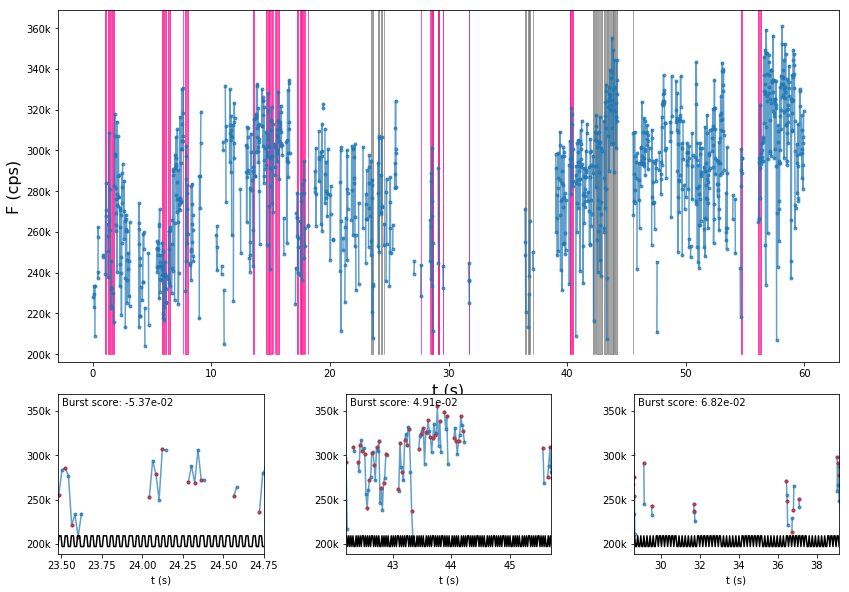

In [57]:
bscores = array([0])
selectedROIS= []
#i = randint(0,wave.shape[0]//2)
for i in range(wave.shape[0]//2):
    #print(i)
    FB = 1.0*wave[i,:] # Blue channel
    FA = 1.0*wave[i+nrois,:] # red channel
    if isfinite(FA).sum()>0:
        stats = burstanalysis(FB,FA, verbose = True, plot = False,pname=str(i).zfill(3),thf = 0.6, ncycles = 12)
    else:
        stats = nan

    #FB = 1.0*ctrl[i,:] # Blue channel
    #FA = 1.0*ctrl[i+nrois,:] # red channel
    #if isfinite(FA).sum()>0:
    #    statsC = burstanalysis(FB,FA, verbose = True, plot = False,pname=str(i).zfill(3)+" ctrl",thf = 0.6, ncycles = 12)
    #else:
    #    statsC = nan
    
    #fullstats[i] = [stats,statsC]
    
    t = arange(0,FA.shape[0])*10e-3
    Sast = FA.reshape(FA.shape[0]//4,4)
    sel = isfinite(Sast.sum(axis=1))
    #print(sel.sum())
    Sp = FA+FB
    Stt = Sp.reshape(Sp.shape[0]//4,4)
    tst = t.reshape(t.shape[0]//4,4)
    ts = tst[sel,:]
    tse = column_stack((tst[:,:2].mean(axis=1),tst[:,2:].mean(axis=1)))
    tse = tse[sel,].flatten()
    Sps = column_stack((Stt[:,:2].mean(axis=1),Stt[:,2:].mean(axis=1)))
    Sps = Sps[sel,:].flatten()
    selnan = isnan(Sast.sum(axis=1))
    Stt[selnan,:] = array([nan,nan,nan,nan])
    tst[selnan,:] = array([nan,nan,nan,nan])
    tst = column_stack((tst[:,:2].mean(axis=1),tst[:,2:].mean(axis=1)))
    Stt = column_stack((Stt[:,:2].mean(axis=1),Stt[:,2:].mean(axis=1)))

    def thousands(x, pos):
        'The two args are the value and tick position'
        return '%1.0fk' % (x*1e-3)



    #print(Sps.shape,ts.shape)



    #print("Times",ts.shape,tse.shape,Sps.shape)

    
    
    if Sps.shape[0]>0:
        formatter = FuncFormatter(thousands)


        fig = figure(figsize=(14,10))
        grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.2)
        plt.subplot(grid[:2, 0:])
        currentAxis = gca()
        plot(tst.flatten(),Stt.flatten(),'C0-',alpha=0.7)
        plot(tse,Sps,'C0.',alpha=0.7)
        #print(burst)
        ymin = min(Sps)*.98
        ymax = max(Sps)*1.02
        currentAxis.yaxis.set_major_formatter(formatter)


        #try:

        burst = stats["burstIdF"]
        for b in burst:
            tsb = ts[b[0]:b[1],:].flatten()
            nsel = arange(tsb.shape[0]-1)[(tsb[1:]-tsb[:-1]-0.01>0.0005)]
            if nsel.shape[0]>0:
                #print(nsel)
                s0 = 0
                for s1 in nsel:
                    currentAxis.add_patch(Rectangle((tsb[s0], ymin), tsb[s1]-tsb[s0], ymax,alpha=0.7,color='gray'))
                    s0 = s1+1
            else:
                currentAxis.add_patch(Rectangle((tsb[0], ymin), tsb[-1]-tsb[0], ymax,alpha=0.7,color='gray'))

        
        burst = stats["burstIdR"]
        #print("Burst R:",burst)
        for b in burst:
            tsb = ts[b[0]:b[1],:].flatten()
            nsel = arange(tsb.shape[0]-1)[(tsb[1:]-tsb[:-1]-0.01>0.0005)]
            s0 = 0
            if nsel.shape[0]>0:
                s0 = 0
                for s1 in nsel:
                    currentAxis.add_patch(Rectangle((tsb[s0], ymin), tsb[s1]-tsb[s0], ymax,alpha=0.7,color='deeppink'))
                    s0 = s1+1
            else:
                currentAxis.add_patch(Rectangle((tsb[0], ymin), tsb[-1]-tsb[0], ymax,alpha=0.7,color='deeppink'))

                
        xlabel("t (s)",fontsize = 16)
        ylabel("F (cps)",fontsize = 16)
        
        burst = stats["burstIdF"]
        bscore = stats["burstIdF score"]
        bscores = concatenate((bscores,bscore))
        if abs(mean(bscore))>0.1 : selectedROIS.append([i,mean(bscore)])
        #print(bscore)
        ab = bscore.argsort()
        if len(ab)>=3:
            for ib in range(3):
                b = burst[ab][ib]
                #print(db)
                plt.subplot(grid[2, ib])
                currentAxis = gca()
                currentAxis.yaxis.set_major_formatter(formatter)
                plot(tst.flatten(),Stt.flatten(),'C0-',alpha=0.7)
                plot(tse,Sps,'C0.',alpha=0.7)
                sqwup = (arange(Sps.shape[0])%2)==0
                plot(tse[sqwup],Sps[sqwup],'C3.',alpha=0.7)
                #print(Sps.shape)
                tsb = ts[b[0]:b[1],:].flatten()
                xlim(tsb[0],tsb[-1])
                bottom, top = ylim()
                text(tsb[0]+(tsb[-1]-tsb[0])*.02,top-(top-bottom)*.02,'Burst score: %.2e' % bscore[ab][ib], ha='left', va='top')
                xlabel('t (s)')
                tss = linspace(tsb[0],tsb[-1],200)
                plot(tss,bottom+(top-bottom)*0.005+(1+sign(sin(2*pi*tss*25.0)))*(top-bottom)*0.07/2.0,'k-')

                
        elif len(ab)==2:
            for ib in range(2):
                b = burst[ab][ib]
                #print(db)
                if ib==0:
                    plt.subplot(grid[2, :2])
                else:
                    plt.subplot(grid[2,2])
                currentAxis = gca()
                currentAxis.yaxis.set_major_formatter(formatter)
                plot(tst.flatten(),Stt.flatten(),'C0-',alpha=0.7)
                plot(tse,Sps,'C0.',alpha=0.7)
                sqwup = (arange(Sps.shape[0])%2)==0
                plot(tse[sqwup],Sps[sqwup],'C3.',alpha=0.7)
                #print(Sps.shape)
                tsb = ts[b[0]:b[1],:].flatten()
                xlim(tsb[0],tsb[-1])
                xlabel('t (s)')
                bottom, top = ylim()
                text(tsb[0]+(tsb[-1]-tsb[0])*.02,top-(top-bottom)*.02,'Burst score: %.2e' % bscore[ab][ib], ha='left', va='top')
                xlabel('t (s)')
                tss = linspace(tsb[0],tsb[-1],200)
                plot(tss,bottom+(top-bottom)*0.005+(1+sign(sin(2*pi*tss*25.0)))*(top-bottom)*0.07/2.0,'k-')
        elif len(ab) == 1:
            for ib in range(1):
                b = burst[ab][ib]
                #print(db)
                plt.subplot(grid[2,:])
                currentAxis = gca()
                currentAxis.yaxis.set_major_formatter(formatter)
                plot(tst.flatten(),Stt.flatten(),'C0-',alpha=0.7)
                plot(tse,Sps,'C0.',alpha=0.7)
                sqwup = (arange(Sps.shape[0])%2)==0
                plot(tse[sqwup],Sps[sqwup],'C3.',alpha=0.7)
                #print(Sps.shape)
                tsb = ts[b[0]:b[1],:].flatten()
                xlim(tsb[0],tsb[-1])
                xlabel('t (s)')
                bottom, top = ylim()
                text(tsb[0]+(tsb[-1]-tsb[0])*.02,top-(top-bottom)*.02,'Burst score: %.2e' % bscore[ab][ib], ha='left', va='top')
                xlabel('t (s)')
                tss = linspace(tsb[0],tsb[-1],200)
                plot(tss,bottom+(top-bottom)*0.005+(1+sign(sin(2*pi*tss*25.0)))*(top-bottom)*0.07/2.0,'k-')

        #except:
        #    pass
        savefig("imgs/BurstF"+str(i).zfill(4)+".png")
        close()

(array([  2.,   1.,   2.,   3.,  11.,  10.,  14.,  44.,  53., 132., 252.,
        458., 283.,  21.,  68.,  31.,  60., 375., 438., 227., 100.,  58.,
         34.,  15.,  11.,   3.,   2.,   1.,   0.,   2.,   2.]),
 array([-0.2483508 , -0.23165264, -0.21495449, -0.19825633, -0.18155817,
        -0.16486002, -0.14816186, -0.13146371, -0.11476555, -0.0980674 ,
        -0.08136924, -0.06467108, -0.04797293, -0.03127477, -0.01457662,
         0.00212154,  0.0188197 ,  0.03551785,  0.05221601,  0.06891416,
         0.08561232,  0.10231048,  0.11900863,  0.13570679,  0.15240494,
         0.1691031 ,  0.18580125,  0.20249941,  0.21919757,  0.23589572,
         0.25259388,  0.26929203]),
 <a list of 31 Patch objects>)

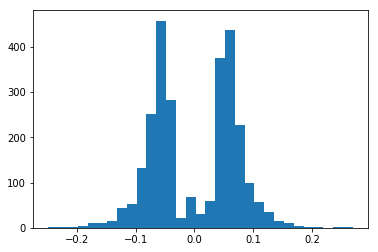

In [11]:
hist(bscores,bins=31)

In [17]:
print(selectedROIS)

[1, 8, 9, 21, 46, 53, 55, 60, 71, 84, 92, 95, 126, 127, 133, 140, 145, 147, 156, 167, 173, 179, 185, 205, 220, 225, 232, 248, 249, 270, 282, 286, 294, 299, 323, 340, 354, 359, 370, 371, 376, 377, 385, 390, 395, 401, 422, 439, 449, 475, 479, 480, 503, 509, 514, 516, 519, 526, 527, 537, 539, 544, 545, 548, 553, 554, 566, 570, 572, 575, 580, 585, 606, 609, 613, 618, 620, 631, 656, 658, 660, 664, 684, 688, 712, 718, 742, 744, 745, 755, 762, 763, 774, 779, 785, 795, 800, 803, 806, 817, 819, 837, 838, 839, 842, 849, 855, 856, 857, 865, 872, 881, 883, 886, 888, 907, 922, 924, 926, 931, 947, 951, 960, 973, 977, 985, 986, 987, 992, 996, 1005, 1027]


In [21]:
bscoresR = array([0])
selectedROISR = []
#i = randint(0,wave.shape[0]//2)
for i in range(wave.shape[0]//2):
    #print(i)
    FB = 1.0*wave[i,:] # Blue channel
    FA = 1.0*wave[i+nrois,:] # red channel
    if isfinite(FA).sum()>0:
        stats = burstanalysis(FB,FA, verbose = True, plot = False,pname=str(i).zfill(3),thf = 0.6, ncycles = 12)
    else:
        stats = nan

    #FB = 1.0*ctrl[i,:] # Blue channel
    #FA = 1.0*ctrl[i+nrois,:] # red channel
    #if isfinite(FA).sum()>0:
    #    statsC = burstanalysis(FB,FA, verbose = True, plot = False,pname=str(i).zfill(3)+" ctrl",thf = 0.6, ncycles = 12)
    #else:
    #    statsC = nan
    
    #fullstats[i] = [stats,statsC]
    
    if mean(FA[isfinite(FA)])>=mean(FB[isfinite(FB)]):
        SXt = FA.reshape(FA.shape[0]//4,4)
    else:
        SXt = FB.reshape(FB.shape[0]//4,4)    
    
    t = arange(0,FA.shape[0])*10e-3
    Sast = FA.reshape(FA.shape[0]//4,4)
    sel = isfinite(Sast.sum(axis=1))
    #print(sel.sum())
    Sp = FA+FB
    Stt = Sp.reshape(Sp.shape[0]//4,4)
    SXt = SXt/Stt
    
    tst = t.reshape(t.shape[0]//4,4)
    ts = tst[sel,:]
    tse = column_stack((tst[:,:2].mean(axis=1),tst[:,2:].mean(axis=1)))
    tse = tse[sel,].flatten()
    
    Sps = column_stack((SXt[:,:2].mean(axis=1),SXt[:,2:].mean(axis=1)))
    Sps = Sps[sel,:].flatten()

    selnan = isnan(SXt.sum(axis=1))
    SXt[selnan,:] = array([nan,nan,nan,nan])
    tst[selnan,:] = array([nan,nan,nan,nan])
    tst = column_stack((tst[:,:2].mean(axis=1),tst[:,2:].mean(axis=1)))
    Stt = column_stack((SXt[:,:2].mean(axis=1),SXt[:,2:].mean(axis=1)))
    
    #def thousands(x, pos):
    #    'The two args are the value and tick position'
    #    return '%1.0fk' % (x*1e-3)



    #print(Sps.shape,ts.shape)



    #print("Times",ts.shape,tse.shape,Sps.shape)

    
    
    if Sps.shape[0]>0:
        #formatter = FuncFormatter(thousands)


        fig = figure(figsize=(14,10))
        grid = plt.GridSpec(3, 3, wspace=0.2, hspace=0.3)
        plt.subplot(grid[:2, 0:])
        currentAxis = gca()
        plot(tst.flatten(),Stt.flatten(),'C0-',alpha=0.7)
        plot(tse,Sps,'C0.',alpha=0.7)
        #print(burst)
        miSps = Sps.min()
        maSps = Sps.max()
        ymin = miSps-(maSps-miSps)*0.02
        ymax = maSps+(maSps-miSps)*0.02
        #currentAxis.yaxis.set_major_formatter(formatter)


        #try:

        burst = stats["burstIdF"]
        for b in burst:
            tsb = ts[b[0]:b[1],:].flatten()
            nsel = arange(tsb.shape[0]-1)[(tsb[1:]-tsb[:-1]-0.01>0.0005)]
            if nsel.shape[0]>0:
                #print(nsel)
                s0 = 0
                for s1 in nsel:
                    currentAxis.add_patch(Rectangle((tsb[s0], ymin), tsb[s1]-tsb[s0], ymax,alpha=0.7,color='gray'))
                    s0 = s1+1
            else:
                currentAxis.add_patch(Rectangle((tsb[0], ymin), tsb[-1]-tsb[0], ymax,alpha=0.7,color='gray'))

        
        burst = stats["burstIdR"]
        #print("Burst R:",burst)
        for b in burst:
            tsb = ts[b[0]:b[1],:].flatten()
            nsel = arange(tsb.shape[0]-1)[(tsb[1:]-tsb[:-1]-0.01>0.0005)]
            s0 = 0
            if nsel.shape[0]>0:
                s0 = 0
                for s1 in nsel:
                    currentAxis.add_patch(Rectangle((tsb[s0], ymin), tsb[s1]-tsb[s0], ymax,alpha=0.7,color='deeppink'))
                    s0 = s1+1
            else:
                currentAxis.add_patch(Rectangle((tsb[0], ymin), tsb[-1]-tsb[0], ymax,alpha=0.7,color='deeppink'))

                
        xlabel("t (s)",fontsize = 16)
        ylabel("R",fontsize = 16)
        
        burst = stats["burstIdR"]
        bscore = stats["burstIdR score"]
        bscoresR = concatenate((bscoresR,bscore))
        if abs(mean(bscore))>0.029 : selectedROISR.append([i,mean(bscore)])
        #print(bscore)
        ab = bscore.argsort()
        if len(ab)>=3:
            for ib in range(3):
                b = burst[ab][ib]
                #print(db)
                plt.subplot(grid[2, ib])
                currentAxis = gca()
                #currentAxis.yaxis.set_major_formatter(formatter)
                plot(tst.flatten(),Stt.flatten(),'C0-',alpha=0.7)
                plot(tse,Sps,'C0.',alpha=0.7)
                sqwup = (arange(Sps.shape[0])%2)==0
                plot(tse[sqwup],Sps[sqwup],'C3.',alpha=0.7)
                #print(Sps.shape)
                tsb = ts[b[0]:b[1],:].flatten()
                xlim(tsb[0],tsb[-1])
                bottom, top = ylim()
                text(tsb[0]+(tsb[-1]-tsb[0])*.02,top-(top-bottom)*.02,'Burst score: %.2e' % bscore[ab][ib], ha='left', va='top')
                xlabel('t (s)')
                tss = linspace(tsb[0],tsb[-1],2000)
                plot(tss,bottom+(top-bottom)*0.005+(1+sign(sin(2*pi*tss*25.0)))*(top-bottom)*0.07/2.0,'k-')

                
        elif len(ab)==2:
            for ib in range(2):
                b = burst[ab][ib]
                #print(db)
                if ib==0:
                    plt.subplot(grid[2, :2])
                else:
                    plt.subplot(grid[2,2])
                currentAxis = gca()
                #currentAxis.yaxis.set_major_formatter(formatter)
                plot(tst.flatten(),Stt.flatten(),'C0-',alpha=0.7)
                plot(tse,Sps,'C0.',alpha=0.7)
                sqwup = (arange(Sps.shape[0])%2)==0
                plot(tse[sqwup],Sps[sqwup],'C3.',alpha=0.7)
                #print(Sps.shape)
                tsb = ts[b[0]:b[1],:].flatten()
                xlim(tsb[0],tsb[-1])
                xlabel('t (s)')
                bottom, top = ylim()
                text(tsb[0]+(tsb[-1]-tsb[0])*.02,top-(top-bottom)*.02,'Burst score: %.2e' % bscore[ab][ib], ha='left', va='top')
                xlabel('t (s)')
                tss = linspace(tsb[0],tsb[-1],2000)
                plot(tss,bottom+(top-bottom)*0.005+(1+sign(sin(2*pi*tss*25.0)))*(top-bottom)*0.07/2.0,'k-')
        elif len(ab) == 1:
            for ib in range(1):
                b = burst[ab][ib]
                #print(db)
                plt.subplot(grid[2,:])
                currentAxis = gca()
                #currentAxis.yaxis.set_major_formatter(formatter)
                plot(tst.flatten(),Stt.flatten(),'C0-',alpha=0.7)
                plot(tse,Sps,'C0.',alpha=0.7)
                sqwup = (arange(Sps.shape[0])%2)==0
                plot(tse[sqwup],Sps[sqwup],'C3.',alpha=0.7)
                #print(Sps.shape)
                tsb = ts[b[0]:b[1],:].flatten()
                xlim(tsb[0],tsb[-1])
                xlabel('t (s)')
                bottom, top = ylim()
                text(tsb[0]+(tsb[-1]-tsb[0])*.02,top-(top-bottom)*.02,'Burst score: %.2e' % bscore[ab][ib], ha='left', va='top')
                xlabel('t (s)')
                tss = linspace(tsb[0],tsb[-1],2000)
                plot(tss,bottom+(top-bottom)*0.005+(1+sign(sin(2*pi*tss*25.0)))*(top-bottom)*0.07/2.0,'k-')

        #except:
        #    pass
        savefig("imgs/BurstR"+str(i).zfill(4)+".png")
        close()

Particle 000
Selected dF/F = -9.74e-03 +/- 1.37e-02
Total dF/F = -1.75e-03 +/- 4.00e-03
Selected (from dF) dR = 5.42e-03 +/- 4.42e-03
Unselected dR = 1.69e-03 +/- 1.85e-03
Selected (from dR) dR = 6.09e-03 +/- 4.77e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  13.8 +/- 0.8197560612767679
Total length =  69.0
Burst score =  -0.13438089596770664 +- 0.3628456212694472
Burst score per time (units of frame)=  -0.021020434215436676 +-  0.018554512867745614
Number of intervals =  7
Av. Length =  16.857142857142858 +/- 1.7074694419062764
Total length =  118.0
Burst score =  -0.13438089596770664 +- 0.3628456212694472
Burst score per time (units of frame)=  -0.021020434215436676 +-  0.018554512867745614

 The overlap between the 2 burst searchs is 5.80 %


############


Particle 001
Selected dF/F = -1.90e-02 +/- 5.50e-02
Total dF/F = 1.17e-02 +/- 8.98e-03
Selected (from dF) dR = -2.34e-03 +/- 1.13e-02
Unselected dR = 5.48e-04 +/- 2.44e-03
Selected (from dR) dR = 2.37e-04 +/-

/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/users/bssn/serna/environments/deepl/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Particle 008
Selected dF/F = -3.66e-02 +/- 1.76e-02
Total dF/F = -5.97e-03 +/- 5.99e-03
Selected (from dF) dR = 9.77e-05 +/- 4.38e-03
Unselected dR = -5.14e-04 +/- 1.64e-03
Selected (from dR) dR = -4.07e-03 +/- 1.14e-02

 Burst statistics dF/F
Number of intervals =  8
Av. Length =  16.375 +/- 1.4570679033593457
Total length =  131.0
Burst score =  -0.5995916451678512 +- 0.458742827202631
Burst score per time (units of frame)=  -0.022202670671823813 +-  0.020317263399274293
Number of intervals =  2
Av. Length =  14.5 +/- 1.0606601717798212
Total length =  29.0
Burst score =  -0.5995916451678512 +- 0.458742827202631
Burst score per time (units of frame)=  -0.022202670671823813 +-  0.020317263399274293

 The overlap between the 2 burst searchs is 44.83 %


############


Particle 009
Selected dF/F = 8.40e-02 +/- 2.37e-02
Total dF/F = 1.70e-03 +/- 3.62e-03
Selected (from dF) dR = 7.98e-03 +/- 7.96e-03
Unselected dR = 2.50e-03 +/- 1.53e-03
Selected (from dR) dR = 2.64e-02 +/- 4.97e-03

 Bur

Particle 030
Selected dF/F = -4.78e-02 +/- 2.05e-02
Total dF/F = 3.19e-04 +/- 6.15e-03
Selected (from dF) dR = -6.58e-03 +/- 6.69e-03
Unselected dR = -8.59e-04 +/- 2.02e-03
Selected (from dR) dR = -9.52e-03 +/- 8.91e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  12.75 +/- 0.21650635094610965
Total length =  51.0
Burst score =  -0.6089840174225734 +- 0.4607130330875954
Burst score per time (units of frame)=  -0.028297677710999357 +-  0.030437539850408483
Number of intervals =  2
Av. Length =  17.0 +/- 3.5355339059327373
Total length =  34.0
Burst score =  -0.6089840174225734 +- 0.4607130330875954
Burst score per time (units of frame)=  -0.028297677710999357 +-  0.030437539850408483

 The overlap between the 2 burst searchs is 55.88 %


############


Particle 031
Selected dF/F = 3.70e-03 +/- 1.35e-02
Total dF/F = -1.36e-03 +/- 2.58e-03
Selected (from dF) dR = -1.12e-02 +/- 5.83e-03
Unselected dR = -2.65e-04 +/- 1.18e-03
Selected (from dR) dR = -1.15e-02 +/- 5.58e-03


Particle 043
Selected dF/F = -1.22e-03 +/- 1.92e-02
Total dF/F = 2.50e-03 +/- 3.81e-03
Selected (from dF) dR = 2.29e-03 +/- 5.02e-03
Unselected dR = 8.39e-04 +/- 1.30e-03
Selected (from dR) dR = 7.21e-03 +/- 7.14e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  18.2 +/- 3.2545352970892787
Total length =  91.0
Burst score =  -0.02225651956685497 +- 0.39934155438826285
Burst score per time (units of frame)=  0.026958248933756163 +-  0.030181066911440346
Number of intervals =  3
Av. Length =  16.666666666666668 +/- 1.186342028003479
Total length =  50.0
Burst score =  -0.02225651956685497 +- 0.39934155438826285
Burst score per time (units of frame)=  0.026958248933756163 +-  0.030181066911440346

 The overlap between the 2 burst searchs is 72.00 %


############


Particle 044
Selected dF/F = -8.76e-04 +/- 1.32e-02
Total dF/F = -3.29e-03 +/- 3.77e-03
Selected (from dF) dR = -3.13e-03 +/- 6.12e-03
Unselected dR = -3.79e-03 +/- 1.94e-03
Selected (from dR) dR = -1.90e-02 +/

Particle 057
Selected dF/F = -3.59e-02 +/- 1.93e-02
Total dF/F = -2.12e-03 +/- 3.55e-03
Selected (from dF) dR = 1.16e-03 +/- 3.66e-03
Unselected dR = -4.23e-04 +/- 9.56e-04
Selected (from dR) dR = -2.54e-02 +/- 5.97e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  19.333333333333332 +/- 4.3800896320948945
Total length =  58.0
Burst score =  -0.6947615570285445 +- 0.7661179761613518
Burst score per time (units of frame)=  0.006613728647204209 +-  0.0410207345549853
Number of intervals =  2
Av. Length =  15.5 +/- 1.0606601717798212
Total length =  31.0
Burst score =  -0.6947615570285445 +- 0.7661179761613518
Burst score per time (units of frame)=  0.006613728647204209 +-  0.0410207345549853

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 058
Selected dF/F = 2.94e-03 +/- 9.30e-03
Total dF/F = 1.68e-03 +/- 3.05e-03
Selected (from dF) dR = 2.20e-03 +/- 3.71e-03
Unselected dR = -5.51e-04 +/- 1.27e-03
Selected (from dR) dR = -3.48e-02 +/- 5.43e-

Particle 072
Selected dF/F = -2.72e-02 +/- 1.87e-02
Total dF/F = -2.49e-03 +/- 3.54e-03
Selected (from dF) dR = 4.37e-03 +/- 5.97e-03
Unselected dR = 2.45e-04 +/- 1.17e-03
Selected (from dR) dR = -2.88e-02 +/- 5.69e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  15.333333333333334 +/- 1.9626135258506328
Total length =  46.0
Burst score =  -0.41781211679028835 +- 0.5297880496242424
Burst score per time (units of frame)=  0.008777659534829006 +-  0.03417529353440737
Number of intervals =  2
Av. Length =  12.5 +/- 0.35355339059327373
Total length =  25.0
Burst score =  -0.41781211679028835 +- 0.5297880496242424
Burst score per time (units of frame)=  0.008777659534829006 +-  0.03417529353440737

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 073
Selected dF/F = -1.07e-02 +/- 2.42e-02
Total dF/F = 2.26e-04 +/- 5.17e-03
Selected (from dF) dR = 3.93e-03 +/- 7.44e-03
Unselected dR = 1.66e-03 +/- 2.06e-03
Selected (from dR) dR = 3.50e-02 +/- 1.3

Particle 084
Selected dF/F = -1.28e-02 +/- 2.41e-02
Total dF/F = -8.52e-03 +/- 5.24e-03
Selected (from dF) dR = -1.95e-03 +/- 6.01e-03
Unselected dR = -2.88e-03 +/- 1.60e-03
Selected (from dR) dR = -1.38e-02 +/- 4.62e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  13.8 +/- 0.9959919678390984
Total length =  69.0
Burst score =  -0.17644121217626457 +- 0.6146350216802744
Burst score per time (units of frame)=  0.0059514579645427645 +-  0.03349796821119616
Number of intervals =  7
Av. Length =  15.285714285714286 +/- 2.608575228555249
Total length =  107.0
Burst score =  -0.17644121217626457 +- 0.6146350216802744
Burst score per time (units of frame)=  0.0059514579645427645 +-  0.03349796821119616

 The overlap between the 2 burst searchs is 39.13 %


############


Particle 085
Selected dF/F = -9.05e-03 +/- 2.01e-02
Total dF/F = -1.15e-03 +/- 6.61e-03
Selected (from dF) dR = 6.79e-03 +/- 7.39e-03
Unselected dR = -5.15e-03 +/- 3.05e-03
Selected (from dR) dR = -3.05e-02 

Particle 102
Selected dF/F = 8.51e-02 +/- 1.64e-02
Total dF/F = 1.19e-02 +/- 3.93e-03
Selected (from dF) dR = 7.72e-03 +/- 5.93e-03
Unselected dR = 1.32e-03 +/- 1.09e-03
Selected (from dR) dR = 1.08e-02 +/- 3.61e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  14.5 +/- 1.7677669529663687
Total length =  29.0
Burst score =  1.2341058497591386 +- 0.07897140363197551
Burst score per time (units of frame)=  0.08723719415293202 +-  0.04320541958052171
Number of intervals =  5
Av. Length =  14.2 +/- 0.9121403400793104
Total length =  71.0
Burst score =  1.2341058497591386 +- 0.07897140363197551
Burst score per time (units of frame)=  0.08723719415293202 +-  0.04320541958052171

 The overlap between the 2 burst searchs is 65.52 %


############


Particle 103
Selected dF/F = -2.97e-02 +/- 1.04e-02
Total dF/F = -3.86e-03 +/- 4.70e-03
Selected (from dF) dR = -4.84e-03 +/- 4.92e-03
Unselected dR = -4.66e-03 +/- 2.56e-03
Selected (from dR) dR = -2.57e-02 +/- 5.02e-03

 Burst sta

Particle 115
Selected dF/F = 1.17e-02 +/- 1.51e-02
Total dF/F = -4.99e-04 +/- 5.93e-03
Selected (from dF) dR = -1.05e-02 +/- 6.63e-03
Unselected dR = -2.10e-03 +/- 3.36e-03
Selected (from dR) dR = -2.69e-02 +/- 9.39e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  19.5 +/- 4.596194077712559
Total length =  39.0
Burst score =  0.2276684864294619 +- 0.2246497346207808
Burst score per time (units of frame)=  0.03048947995092511 +-  0.03697018089941387
Number of intervals =  1
Av. Length =  15.0 +/- 0.0
Total length =  15.0
Burst score =  0.2276684864294619 +- 0.2246497346207808
Burst score per time (units of frame)=  0.03048947995092511 +-  0.03697018089941387

 The overlap between the 2 burst searchs is 100.00 %


############


Particle 116
Selected dF/F = -7.78e-03 +/- 2.57e-02
Total dF/F = 2.82e-03 +/- 5.84e-03
Selected (from dF) dR = -6.94e-03 +/- 6.85e-03
Unselected dR = -2.20e-04 +/- 2.51e-03
Selected (from dR) dR = -1.19e-03 +/- 7.24e-03

 Burst statistics dF/F
N

Particle 133
Selected dF/F = 1.01e-01 +/- 2.35e-02
Total dF/F = 3.94e-03 +/- 5.55e-03
Selected (from dF) dR = 9.92e-03 +/- 8.94e-03
Unselected dR = -9.74e-04 +/- 1.58e-03
Selected (from dR) dR = -2.58e-02 +/- 6.00e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  21.0 +/- 0.0
Total length =  21.0
Burst score =  2.120036470186344 +- 0.0
Burst score per time (units of frame)=  0.10095411762792114 +-  0.10748496218273604
Number of intervals =  2
Av. Length =  15.0 +/- 0.7071067811865475
Total length =  30.0
Burst score =  2.120036470186344 +- 0.0
Burst score per time (units of frame)=  0.10095411762792114 +-  0.10748496218273604

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 136
Selected dF/F = -2.59e-02 +/- 2.38e-02
Total dF/F = -2.90e-03 +/- 6.42e-03
Selected (from dF) dR = 3.78e-03 +/- 4.83e-03
Unselected dR = 1.17e-03 +/- 1.46e-03
Selected (from dR) dR = 1.95e-02 +/- 4.40e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length = 

Particle 153
Selected dF/F = 9.92e-03 +/- 9.58e-03
Total dF/F = 2.46e-03 +/- 3.92e-03
Selected (from dF) dR = 5.81e-03 +/- 3.73e-03
Unselected dR = 2.17e-03 +/- 1.92e-03
Selected (from dR) dR = 1.02e-02 +/- 4.90e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  16.5 +/- 2.7763885414929472
Total length =  99.0
Burst score =  0.16364369112115026 +- 0.3639052961899072
Burst score per time (units of frame)=  -0.004683001692503021 +-  0.01255310105578567
Number of intervals =  6
Av. Length =  14.0 +/- 1.3123346456686353
Total length =  84.0
Burst score =  0.16364369112115026 +- 0.3639052961899072
Burst score per time (units of frame)=  -0.004683001692503021 +-  0.01255310105578567

 The overlap between the 2 burst searchs is 32.14 %


############


Particle 154
Selected dF/F = 2.32e-02 +/- 1.84e-02
Total dF/F = 4.63e-03 +/- 4.46e-03
Selected (from dF) dR = -8.26e-04 +/- 6.46e-03
Unselected dR = -1.71e-03 +/- 1.72e-03
Selected (from dR) dR = -2.40e-02 +/- 5.39e-03

 Burst s

Particle 169
Selected dF/F = 6.72e-02 +/- 2.20e-02
Total dF/F = 4.59e-03 +/- 8.96e-03
Selected (from dF) dR = -1.46e-03 +/- 7.00e-03
Unselected dR = -1.33e-03 +/- 2.47e-03
Selected (from dR) dR = -2.27e-02 +/- 4.90e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  20.0 +/- 0.0
Total length =  20.0
Burst score =  1.3430888904179827 +- 0.0
Burst score per time (units of frame)=  0.06715444452089914 +-  0.09818415633210244
Number of intervals =  1
Av. Length =  14.0 +/- 0.0
Total length =  14.0
Burst score =  1.3430888904179827 +- 0.0
Burst score per time (units of frame)=  0.06715444452089914 +-  0.09818415633210244

 The overlap between the 2 burst searchs is 42.86 %


############


Particle 171
Selected dF/F = -1.14e-02 +/- 6.56e-03
Total dF/F = -2.19e-03 +/- 2.75e-03
Selected (from dF) dR = 4.01e-03 +/- 3.33e-03
Unselected dR = 4.41e-04 +/- 1.51e-03
Selected (from dR) dR = 8.61e-03 +/- 4.44e-03

 Burst statistics dF/F
Number of intervals =  9
Av. Length =  18.1111111

Particle 184
Selected dF/F = -1.31e-02 +/- 8.53e-03
Total dF/F = -4.82e-03 +/- 4.74e-03
Selected (from dF) dR = 3.14e-03 +/- 4.94e-03
Unselected dR = 3.29e-03 +/- 3.15e-03
Selected (from dR) dR = 3.32e-02 +/- 1.33e-02

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  27.0 +/- 5.792715732327589
Total length =  81.0
Burst score =  -0.3529478283984611 +- 0.5536390593862988
Burst score per time (units of frame)=  -0.00044535039150806507 +-  0.02184082719679181
Number of intervals =  1
Av. Length =  14.0 +/- 0.0
Total length =  14.0
Burst score =  -0.3529478283984611 +- 0.5536390593862988
Burst score per time (units of frame)=  -0.00044535039150806507 +-  0.02184082719679181

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 185
Selected dF/F = -1.01e-01 +/- 3.63e-02
Total dF/F = -1.63e-02 +/- 1.02e-02
Selected (from dF) dR = -1.83e-02 +/- 9.54e-03
Unselected dR = -9.61e-04 +/- 2.46e-03
Selected (from dR) dR = -5.48e-03 +/- 7.70e-03

 Burst statistics

Particle 197
Selected dF/F = -2.36e-02 +/- 1.13e-02
Total dF/F = -3.39e-03 +/- 7.18e-03
Selected (from dF) dR = 8.33e-03 +/- 4.97e-03
Unselected dR = 1.00e-02 +/- 3.05e-03
Selected (from dR) dR = 2.48e-02 +/- 4.27e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  18.8 +/- 3.363331681532465
Total length =  94.0
Burst score =  -0.4429237534625378 +- 0.3053354663036341
Burst score per time (units of frame)=  -0.010737002712272754 +-  0.0196177602767448
Number of intervals =  4
Av. Length =  24.0 +/- 4.387482193696061
Total length =  96.0
Burst score =  -0.4429237534625378 +- 0.3053354663036341
Burst score per time (units of frame)=  -0.010737002712272754 +-  0.0196177602767448

 The overlap between the 2 burst searchs is 56.38 %


############


Particle 198
Selected dF/F = 2.77e-02 +/- 2.73e-02
Total dF/F = 9.11e-03 +/- 1.00e-02
Selected (from dF) dR = -1.79e-03 +/- 8.72e-03
Unselected dR = -2.05e-03 +/- 4.13e-03
Selected (from dR) dR = -1.74e-02 +/- 1.57e-02

 Burst sta

Particle 213
Selected dF/F = -1.34e-02 +/- 1.74e-02
Total dF/F = -1.43e-03 +/- 3.80e-03
Selected (from dF) dR = 7.32e-03 +/- 6.72e-03
Unselected dR = 1.10e-04 +/- 1.65e-03
Selected (from dR) dR = 6.81e-03 +/- 5.24e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  13.666666666666666 +/- 0.9813067629253164
Total length =  41.0
Burst score =  -0.18287041359630105 +- 0.46179964566140647
Burst score per time (units of frame)=  -0.02856316241146009 +-  0.029781027407809326
Number of intervals =  5
Av. Length =  16.2 +/- 1.3682105101189654
Total length =  81.0
Burst score =  -0.18287041359630105 +- 0.46179964566140647
Burst score per time (units of frame)=  -0.02856316241146009 +-  0.029781027407809326

 The overlap between the 2 burst searchs is 29.27 %


############


Particle 214
Selected dF/F = 7.12e-02 +/- 1.84e-02
Total dF/F = 5.50e-03 +/- 4.08e-03
Selected (from dF) dR = 2.21e-02 +/- 5.99e-03
Unselected dR = 5.88e-03 +/- 1.49e-03
Selected (from dR) dR = 2.54e-02 +/- 8

Particle 228
Selected dF/F = -8.36e-02 +/- 3.00e-02
Total dF/F = -5.33e-03 +/- 3.49e-03
Selected (from dF) dR = -1.04e-02 +/- 1.19e-02
Unselected dR = -4.67e-05 +/- 1.60e-03
Selected (from dR) dR = -7.85e-03 +/- 9.38e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  17.0 +/- 0.0
Total length =  17.0
Burst score =  -1.4209105190154425 +- 0.0
Burst score per time (units of frame)=  -0.08358297170679074 +-  0.12359650535166752
Number of intervals =  2
Av. Length =  15.5 +/- 2.4748737341529163
Total length =  31.0
Burst score =  -1.4209105190154425 +- 0.0
Burst score per time (units of frame)=  -0.08358297170679074 +-  0.12359650535166752

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 231
Selected dF/F = -4.03e-02 +/- 1.47e-02
Total dF/F = -7.07e-03 +/- 5.11e-03
Selected (from dF) dR = -1.03e-02 +/- 8.94e-03
Unselected dR = -6.16e-04 +/- 2.80e-03
Selected (from dR) dR = 1.32e-03 +/- 6.20e-03

 Burst statistics dF/F
Number of intervals =  4
Av

Particle 248
Selected dF/F = 1.02e-01 +/- 2.39e-02
Total dF/F = 2.14e-02 +/- 9.22e-03
Selected (from dF) dR = 2.00e-02 +/- 9.57e-03
Unselected dR = 3.37e-03 +/- 3.43e-03
Selected (from dR) dR = 1.27e-02 +/- 7.33e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  12.5 +/- 0.35355339059327373
Total length =  25.0
Burst score =  1.2765624295001552 +- 0.07151196994603531
Burst score per time (units of frame)=  0.102025845304134 +-  0.059664791709247225
Number of intervals =  3
Av. Length =  19.666666666666668 +/- 4.650766563656967
Total length =  59.0
Burst score =  1.2765624295001552 +- 0.07151196994603531
Burst score per time (units of frame)=  0.102025845304134 +-  0.059664791709247225

 The overlap between the 2 burst searchs is 48.00 %


############


Particle 249
Selected dF/F = -1.63e-01 +/- 6.08e-02
Total dF/F = -5.19e-03 +/- 7.40e-03
Selected (from dF) dR = 5.07e-03 +/- 9.10e-03
Unselected dR = 1.61e-03 +/- 1.19e-03
Selected (from dR) dR = 3.73e-03 +/- 5.62e-03

 

Particle 263
Selected dF/F = -5.42e-03 +/- 1.48e-02
Total dF/F = -3.13e-04 +/- 3.64e-03
Selected (from dF) dR = -8.83e-03 +/- 6.13e-03
Unselected dR = -4.10e-03 +/- 1.74e-03
Selected (from dR) dR = -2.46e-02 +/- 5.81e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  16.5 +/- 1.0606601717798212
Total length =  33.0
Burst score =  -0.08948030011869218 +- 0.6078666805913258
Burst score per time (units of frame)=  0.010213639935877372 +-  0.03253779160901639
Number of intervals =  2
Av. Length =  13.0 +/- 0.7071067811865475
Total length =  26.0
Burst score =  -0.08948030011869218 +- 0.6078666805913258
Burst score per time (units of frame)=  0.010213639935877372 +-  0.03253779160901639

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 264
Selected dF/F = 7.73e-02 +/- 2.94e-02
Total dF/F = -2.29e-03 +/- 4.14e-03
Selected (from dF) dR = 2.71e-03 +/- 7.86e-03
Unselected dR = -1.32e-03 +/- 1.73e-03
Selected (from dR) dR = -1.67e-02 +/- 5.87e-03

 Bur

Particle 279
Selected dF/F = -3.29e-02 +/- 1.90e-02
Total dF/F = 1.44e-03 +/- 3.79e-03
Selected (from dF) dR = 1.59e-03 +/- 7.07e-03
Unselected dR = -9.77e-04 +/- 1.44e-03
Selected (from dR) dR = 5.18e-03 +/- 4.63e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  13.25 +/- 0.649519052838329
Total length =  53.0
Burst score =  -0.43540927752567016 +- 0.48913810802392205
Burst score per time (units of frame)=  -0.05031001607128103 +-  0.027558841758715324
Number of intervals =  6
Av. Length =  18.333333333333332 +/- 1.6101529717988268
Total length =  110.0
Burst score =  -0.43540927752567016 +- 0.48913810802392205
Burst score per time (units of frame)=  -0.05031001607128103 +-  0.027558841758715324

 The overlap between the 2 burst searchs is 50.94 %


############


Particle 280
Selected dF/F = 5.24e-03 +/- 1.03e-02
Total dF/F = 2.46e-03 +/- 5.90e-03
Selected (from dF) dR = -1.03e-03 +/- 3.47e-03
Unselected dR = -7.89e-04 +/- 2.06e-03
Selected (from dR) dR = 7.13e-03 +/

Particle 295
Selected dF/F = 6.93e-03 +/- 1.55e-02
Total dF/F = 7.72e-04 +/- 9.36e-03
Selected (from dF) dR = -2.02e-04 +/- 4.49e-03
Unselected dR = 6.80e-04 +/- 2.94e-03
Selected (from dR) dR = 1.00e-02 +/- 6.81e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  14.4 +/- 1.3446189051177289
Total length =  72.0
Burst score =  0.09973838649518471 +- 0.3608135614862135
Burst score per time (units of frame)=  -0.0004281339542764477 +-  0.021800076085498186
Number of intervals =  3
Av. Length =  14.333333333333334 +/- 0.7200822998230956
Total length =  43.0
Burst score =  0.09973838649518471 +- 0.3608135614862135
Burst score per time (units of frame)=  -0.0004281339542764477 +-  0.021800076085498186

 The overlap between the 2 burst searchs is 20.93 %


############


Particle 296
Selected dF/F = 6.56e-02 +/- 2.11e-02
Total dF/F = 1.38e-02 +/- 4.76e-03
Selected (from dF) dR = -2.29e-03 +/- 6.42e-03
Unselected dR = 2.21e-04 +/- 1.53e-03
Selected (from dR) dR = 2.11e-02 +/- 4

Particle 311
Selected dF/F = 4.12e-02 +/- 1.67e-02
Total dF/F = 9.30e-04 +/- 4.50e-03
Selected (from dF) dR = 5.39e-03 +/- 3.77e-03
Unselected dR = 1.24e-03 +/- 1.24e-03
Selected (from dR) dR = 1.10e-02 +/- 7.10e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  17.5 +/- 3.7841041799142436
Total length =  105.0
Burst score =  0.72096425662001 +- 0.5860537496266714
Burst score per time (units of frame)=  0.02176552472045495 +-  0.019544484175664713
Number of intervals =  3
Av. Length =  14.0 +/- 0.47140452079103173
Total length =  42.0
Burst score =  0.72096425662001 +- 0.5860537496266714
Burst score per time (units of frame)=  0.02176552472045495 +-  0.019544484175664713

 The overlap between the 2 burst searchs is 33.33 %


############


Particle 312
Selected dF/F = 1.68e-02 +/- 1.81e-02
Total dF/F = 4.05e-03 +/- 6.08e-03
Selected (from dF) dR = 1.77e-03 +/- 4.53e-03
Unselected dR = 4.29e-04 +/- 1.80e-03
Selected (from dR) dR = 4.53e-03 +/- 5.58e-03

 Burst statistics

Particle 323
Selected dF/F = 1.34e-02 +/- 4.44e-02
Total dF/F = 1.65e-02 +/- 1.07e-02
Selected (from dF) dR = 1.50e-02 +/- 8.80e-03
Unselected dR = 5.87e-03 +/- 2.44e-03
Selected (from dR) dR = 3.58e-02 +/- 1.18e-02

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  15.5 +/- 1.7677669529663687
Total length =  31.0
Burst score =  0.20802482855864668 +- 1.2591178919356436
Burst score per time (units of frame)=  -0.018252334135698243 +-  0.10803755640271598
Number of intervals =  1
Av. Length =  17.0 +/- 0.0
Total length =  17.0
Burst score =  0.20802482855864668 +- 1.2591178919356436
Burst score per time (units of frame)=  -0.018252334135698243 +-  0.10803755640271598

 The overlap between the 2 burst searchs is 100.00 %


############


Particle 324
Selected dF/F = -5.38e-02 +/- 1.32e-02
Total dF/F = -3.67e-03 +/- 3.62e-03
Selected (from dF) dR = 4.33e-03 +/- 4.09e-03
Unselected dR = -1.12e-03 +/- 1.47e-03
Selected (from dR) dR = -1.25e-02 +/- 4.66e-03

 Burst statistics dF/

Particle 334
Selected dF/F = 8.68e-02 +/- 2.03e-02
Total dF/F = 2.05e-02 +/- 1.21e-02
Selected (from dF) dR = 1.61e-02 +/- 7.25e-03
Unselected dR = 3.55e-03 +/- 3.47e-03
Selected (from dR) dR = 2.24e-02 +/- 9.03e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  14.25 +/- 1.4306903927824497
Total length =  57.0
Burst score =  1.2367782943832941 +- 0.1301740842865303
Burst score per time (units of frame)=  0.08690035172476875 +-  0.038028273140973366
Number of intervals =  2
Av. Length =  15.0 +/- 0.7071067811865475
Total length =  30.0
Burst score =  1.2367782943832941 +- 0.1301740842865303
Burst score per time (units of frame)=  0.08690035172476875 +-  0.038028273140973366

 The overlap between the 2 burst searchs is 86.67 %


############


Particle 335
Selected dF/F = -7.96e-02 +/- 1.27e-02
Total dF/F = -6.36e-03 +/- 3.38e-03
Selected (from dF) dR = -1.35e-02 +/- 7.59e-03
Unselected dR = -1.45e-03 +/- 1.61e-03
Selected (from dR) dR = -1.83e-02 +/- 9.10e-03

 Burst st

Particle 351
Selected dF/F = 9.55e-03 +/- 2.14e-02
Total dF/F = 3.29e-03 +/- 7.36e-03
Selected (from dF) dR = 1.13e-02 +/- 7.62e-03
Unselected dR = 4.68e-03 +/- 3.09e-03
Selected (from dR) dR = 3.53e-02 +/- 1.27e-02

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  17.0 +/- 3.5355339059327373
Total length =  34.0
Burst score =  0.16231517489869435 +- 0.5872006812248854
Burst score per time (units of frame)=  -0.01073679404182036 +-  0.05624715857336375
Number of intervals =  1
Av. Length =  14.0 +/- 0.0
Total length =  14.0
Burst score =  0.16231517489869435 +- 0.5872006812248854
Burst score per time (units of frame)=  -0.01073679404182036 +-  0.05624715857336375

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 352
Selected dF/F = -7.48e-03 +/- 1.15e-02
Total dF/F = -7.35e-04 +/- 3.95e-03
Selected (from dF) dR = 3.98e-03 +/- 4.29e-03
Unselected dR = -2.29e-04 +/- 1.43e-03
Selected (from dR) dR = 4.73e-03 +/- 3.84e-03

 Burst statistics dF/F
Num

Particle 365
Selected dF/F = 7.93e-03 +/- 1.30e-02
Total dF/F = 2.43e-03 +/- 5.43e-03
Selected (from dF) dR = 7.74e-03 +/- 6.27e-03
Unselected dR = 1.77e-03 +/- 2.90e-03
Selected (from dR) dR = -2.88e-02 +/- 8.04e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  14.0 +/- 1.6329931618554523
Total length =  42.0
Burst score =  0.11096271870854553 +- 0.35602590361505304
Burst score per time (units of frame)=  0.016017303785134607 +-  0.0239833313061603
Number of intervals =  1
Av. Length =  18.0 +/- 0.0
Total length =  18.0
Burst score =  0.11096271870854553 +- 0.35602590361505304
Burst score per time (units of frame)=  0.016017303785134607 +-  0.0239833313061603

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 367
Selected dF/F = -5.23e-02 +/- 2.32e-02
Total dF/F = -1.12e-02 +/- 8.33e-03
Selected (from dF) dR = 2.25e-03 +/- 6.09e-03
Unselected dR = -1.16e-03 +/- 2.26e-03
Selected (from dR) dR = -1.41e-02 +/- 5.03e-03

 Burst statistics dF/F
N

Particle 381
Selected dF/F = -4.16e-03 +/- 1.76e-02
Total dF/F = -4.01e-03 +/- 4.15e-03
Selected (from dF) dR = 3.51e-03 +/- 5.85e-03
Unselected dR = -2.60e-03 +/- 1.59e-03
Selected (from dR) dR = -2.71e-02 +/- 4.43e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  14.25 +/- 1.3863170633011772
Total length =  57.0
Burst score =  -0.05926599581870748 +- 0.46430973117628077
Burst score per time (units of frame)=  -0.004998736791342708 +-  0.028832777139939002
Number of intervals =  4
Av. Length =  16.0 +/- 1.3693063937629153
Total length =  64.0
Burst score =  -0.05926599581870748 +- 0.46430973117628077
Burst score per time (units of frame)=  -0.004998736791342708 +-  0.028832777139939002

 The overlap between the 2 burst searchs is 22.81 %


############


Particle 383
Selected dF/F = 2.23e-02 +/- 1.03e-02
Total dF/F = 5.05e-03 +/- 3.08e-03
Selected (from dF) dR = -7.39e-03 +/- 4.05e-03
Unselected dR = -1.89e-03 +/- 1.60e-03
Selected (from dR) dR = -2.98e-02 +/- 8.64e-0

Particle 395
Selected dF/F = 1.08e-01 +/- 4.76e-02
Total dF/F = 9.95e-03 +/- 6.09e-03
Selected (from dF) dR = 1.18e-02 +/- 1.02e-02
Unselected dR = 2.56e-03 +/- 1.57e-03
Selected (from dR) dR = 1.34e-02 +/- 6.40e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  19.0 +/- 0.0
Total length =  19.0
Burst score =  2.0460812409591744 +- 0.0
Burst score per time (units of frame)=  0.10768848636627235 +-  0.20734058208221706
Number of intervals =  4
Av. Length =  12.25 +/- 0.21650635094610965
Total length =  49.0
Burst score =  2.0460812409591744 +- 0.0
Burst score per time (units of frame)=  0.10768848636627235 +-  0.20734058208221706

 The overlap between the 2 burst searchs is 89.47 %


############


Particle 396
Selected dF/F = -7.45e-02 +/- 3.00e-02
Total dF/F = -3.33e-03 +/- 7.34e-03
Selected (from dF) dR = -1.60e-03 +/- 8.17e-03
Unselected dR = 1.23e-03 +/- 2.57e-03
Selected (from dR) dR = 4.64e-04 +/- 5.76e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Lengt

Particle 409
Selected dF/F = -2.15e-02 +/- 7.57e-03
Total dF/F = -1.81e-03 +/- 3.44e-03
Selected (from dF) dR = 8.14e-04 +/- 2.96e-03
Unselected dR = 2.72e-03 +/- 1.57e-03
Selected (from dR) dR = 9.85e-03 +/- 4.57e-03

 Burst statistics dF/F
Number of intervals =  7
Av. Length =  15.142857142857142 +/- 1.7074694419062766
Total length =  106.0
Burst score =  -0.3248388649937195 +- 0.1490628968605521
Burst score per time (units of frame)=  -0.01999040489572922 +-  0.009505577266068833
Number of intervals =  4
Av. Length =  16.0 +/- 2.2638462845343543
Total length =  64.0
Burst score =  -0.3248388649937195 +- 0.1490628968605521
Burst score per time (units of frame)=  -0.01999040489572922 +-  0.009505577266068833

 The overlap between the 2 burst searchs is 45.31 %


############


Particle 410
Selected dF/F = 2.38e-02 +/- 9.03e-03
Total dF/F = 3.08e-03 +/- 3.72e-03
Selected (from dF) dR = 1.24e-03 +/- 3.46e-03
Unselected dR = -9.42e-04 +/- 1.56e-03
Selected (from dR) dR = -3.19e-02 +/- 6.

Particle 420
Selected dF/F = 4.50e-03 +/- 1.28e-02
Total dF/F = -2.00e-03 +/- 5.48e-03
Selected (from dF) dR = -7.34e-04 +/- 3.88e-03
Unselected dR = -3.21e-03 +/- 1.68e-03
Selected (from dR) dR = -5.74e-03 +/- 3.88e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  15.6 +/- 1.8460769214742923
Total length =  78.0
Burst score =  0.0702639975035603 +- 0.41128541721525147
Burst score per time (units of frame)=  0.008420259422596808 +-  0.019376760331975745
Number of intervals =  5
Av. Length =  15.2 +/- 2.2521101216414796
Total length =  76.0
Burst score =  0.0702639975035603 +- 0.41128541721525147
Burst score per time (units of frame)=  0.008420259422596808 +-  0.019376760331975745

 The overlap between the 2 burst searchs is 48.68 %


############


Particle 421
Selected dF/F = 3.66e-02 +/- 2.15e-02
Total dF/F = 4.72e-03 +/- 6.81e-03
Selected (from dF) dR = -6.48e-03 +/- 5.28e-03
Unselected dR = 3.17e-04 +/- 2.07e-03
Selected (from dR) dR = -6.99e-03 +/- 5.96e-03

 Burs

Particle 436
Selected dF/F = -2.40e-02 +/- 2.45e-02
Total dF/F = 1.78e-03 +/- 6.59e-03
Selected (from dF) dR = 2.52e-03 +/- 7.12e-03
Unselected dR = 9.78e-04 +/- 2.24e-03
Selected (from dR) dR = -1.52e-03 +/- 5.56e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  17.0 +/- 3.5355339059327373
Total length =  34.0
Burst score =  -0.40873207162021963 +- 1.088529194045747
Burst score per time (units of frame)=  -0.029427428502786426 +-  0.05586186053135598
Number of intervals =  3
Av. Length =  20.333333333333332 +/- 4.27741701220448
Total length =  61.0
Burst score =  -0.40873207162021963 +- 1.088529194045747
Burst score per time (units of frame)=  -0.029427428502786426 +-  0.05586186053135598

 The overlap between the 2 burst searchs is 64.71 %


############


Particle 437
Selected dF/F = -4.94e-02 +/- 1.94e-02
Total dF/F = -5.03e-03 +/- 3.27e-03
Selected (from dF) dR = -3.03e-03 +/- 5.36e-03
Unselected dR = 9.16e-04 +/- 1.29e-03
Selected (from dR) dR = -6.95e-04 +/- 5.2

Particle 448
Selected dF/F = 6.31e-02 +/- 1.83e-02
Total dF/F = 5.78e-04 +/- 3.71e-03
Selected (from dF) dR = 5.75e-03 +/- 6.54e-03
Unselected dR = -2.02e-03 +/- 1.59e-03
Selected (from dR) dR = 2.07e-03 +/- 4.69e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  13.0 +/- 0.7071067811865475
Total length =  26.0
Burst score =  0.8204461834821046 +- 0.06542407852364304
Burst score per time (units of frame)=  0.06178671307200323 +-  0.03951442862032053
Number of intervals =  6
Av. Length =  13.333333333333334 +/- 0.8713548411865625
Total length =  80.0
Burst score =  0.8204461834821046 +- 0.06542407852364304
Burst score per time (units of frame)=  0.06178671307200323 +-  0.03951442862032053

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 449
Selected dF/F = -1.42e-01 +/- 3.89e-02
Total dF/F = -1.63e-02 +/- 1.02e-02
Selected (from dF) dR = -3.20e-03 +/- 4.90e-03
Unselected dR = -1.05e-03 +/- 1.58e-03
Selected (from dR) dR = -1.42e-02 +/- 4.22e-

Particle 461
Selected dF/F = -2.81e-02 +/- 1.90e-02
Total dF/F = 1.24e-03 +/- 4.40e-03
Selected (from dF) dR = -4.77e-03 +/- 6.47e-03
Unselected dR = 1.15e-03 +/- 1.52e-03
Selected (from dR) dR = 2.50e-02 +/- 6.29e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  22.5 +/- 4.596194077712559
Total length =  45.0
Burst score =  -0.6327404490528776 +- 0.6211052893343739
Burst score per time (units of frame)=  -0.0597970051126396 +-  0.05304316202532953
Number of intervals =  3
Av. Length =  18.0 +/- 0.47140452079103173
Total length =  54.0
Burst score =  -0.6327404490528776 +- 0.6211052893343739
Burst score per time (units of frame)=  -0.0597970051126396 +-  0.05304316202532953

 The overlap between the 2 burst searchs is 48.89 %


############


Particle 462
Selected dF/F = 8.37e-02 +/- 1.93e-02
Total dF/F = 1.04e-03 +/- 3.71e-03
Selected (from dF) dR = 1.78e-02 +/- 9.34e-03
Unselected dR = 2.28e-03 +/- 1.72e-03
Selected (from dR) dR = 2.29e-02 +/- 7.47e-03

 Burst statis

Particle 477
Selected dF/F = -1.09e-02 +/- 2.08e-02
Total dF/F = 1.17e-03 +/- 3.61e-03
Selected (from dF) dR = 8.23e-03 +/- 1.04e-02
Unselected dR = 1.70e-03 +/- 1.70e-03
Selected (from dR) dR = 1.61e-02 +/- 7.58e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  14.5 +/- 1.7677669529663687
Total length =  29.0
Burst score =  -0.15742426683659033 +- 0.7845221144232357
Burst score per time (units of frame)=  -0.008841418072474693 +-  0.04133029596298167
Number of intervals =  4
Av. Length =  13.5 +/- 0.82915619758885
Total length =  54.0
Burst score =  -0.15742426683659033 +- 0.7845221144232357
Burst score per time (units of frame)=  -0.008841418072474693 +-  0.04133029596298167

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 478
Selected dF/F = 1.53e-02 +/- 1.56e-02
Total dF/F = 7.49e-03 +/- 4.80e-03
Selected (from dF) dR = -6.92e-04 +/- 4.95e-03
Unselected dR = -7.72e-04 +/- 1.75e-03
Selected (from dR) dR = 6.38e-03 +/- 5.77e-03

 Burst st

Particle 489
Selected dF/F = -2.57e-02 +/- 1.17e-02
Total dF/F = -7.58e-04 +/- 2.89e-03
Selected (from dF) dR = -2.24e-03 +/- 3.73e-03
Unselected dR = 1.13e-03 +/- 1.22e-03
Selected (from dR) dR = -2.65e-02 +/- 7.54e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  14.666666666666666 +/- 1.5928079096479395
Total length =  88.0
Burst score =  -0.37634488466354005 +- 0.3369297336764247
Burst score per time (units of frame)=  -0.02842475346324244 +-  0.014916747479128134
Number of intervals =  2
Av. Length =  18.0 +/- 3.5355339059327373
Total length =  36.0
Burst score =  -0.37634488466354005 +- 0.3369297336764247
Burst score per time (units of frame)=  -0.02842475346324244 +-  0.014916747479128134

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 490
Selected dF/F = -4.43e-02 +/- 1.49e-02
Total dF/F = -6.15e-03 +/- 3.56e-03
Selected (from dF) dR = -1.06e-02 +/- 9.93e-03
Unselected dR = 2.77e-03 +/- 2.49e-03
Selected (from dR) dR = 3.29e-02 +/-

Particle 502
Selected dF/F = -2.90e-02 +/- 1.43e-02
Total dF/F = 6.85e-04 +/- 5.01e-03
Selected (from dF) dR = 8.61e-03 +/- 5.23e-03
Unselected dR = -1.20e-03 +/- 2.15e-03
Selected (from dR) dR = 3.13e-02 +/- 1.14e-02

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  15.25 +/- 1.7455300054711176
Total length =  61.0
Burst score =  -0.442726729774764 +- 0.37956386984768586
Burst score per time (units of frame)=  -0.027023558225105045 +-  0.024765921580697067
Number of intervals =  1
Av. Length =  16.0 +/- 0.0
Total length =  16.0
Burst score =  -0.442726729774764 +- 0.37956386984768586
Burst score per time (units of frame)=  -0.027023558225105045 +-  0.024765921580697067

 The overlap between the 2 burst searchs is 75.00 %


############


Particle 503
Selected dF/F = 1.83e-01 +/- 6.46e-02
Total dF/F = 2.15e-02 +/- 1.63e-02
Selected (from dF) dR = 3.44e-02 +/- 9.65e-03
Unselected dR = 6.61e-03 +/- 3.38e-03
Selected (from dR) dR = 3.07e-02 +/- 5.60e-03

 Burst statistics dF/

Particle 517
Selected dF/F = 5.13e-03 +/- 1.35e-02
Total dF/F = -2.15e-04 +/- 2.95e-03
Selected (from dF) dR = 5.23e-03 +/- 5.14e-03
Unselected dR = 9.72e-04 +/- 1.45e-03
Selected (from dR) dR = -2.24e-02 +/- 8.78e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  15.666666666666666 +/- 2.5962936545662054
Total length =  47.0
Burst score =  0.08032105585623035 +- 0.38834204950063766
Burst score per time (units of frame)=  0.025283522934420613 +-  0.025802248748990605
Number of intervals =  2
Av. Length =  14.5 +/- 1.0606601717798212
Total length =  29.0
Burst score =  0.08032105585623035 +- 0.38834204950063766
Burst score per time (units of frame)=  0.025283522934420613 +-  0.025802248748990605

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 518
Selected dF/F = -1.71e-02 +/- 1.78e-02
Total dF/F = 4.89e-04 +/- 3.30e-03
Selected (from dF) dR = 2.51e-03 +/- 5.55e-03
Unselected dR = -8.81e-05 +/- 1.10e-03
Selected (from dR) dR = 1.54e-03 +/- 6.

Particle 530
Selected dF/F = 5.03e-02 +/- 8.07e-03
Total dF/F = 7.32e-03 +/- 3.37e-03
Selected (from dF) dR = -2.28e-04 +/- 3.89e-03
Unselected dR = 1.27e-04 +/- 1.65e-03
Selected (from dR) dR = -7.85e-03 +/- 5.08e-03

 Burst statistics dF/F
Number of intervals =  6
Av. Length =  15.5 +/- 1.1242281302693369
Total length =  93.0
Burst score =  0.7801963321100116 +- 0.04824218511839135
Burst score per time (units of frame)=  0.05005012558739323 +-  0.012689774668378102
Number of intervals =  6
Av. Length =  15.333333333333334 +/- 1.8206632897971045
Total length =  92.0
Burst score =  0.7801963321100116 +- 0.04824218511839135
Burst score per time (units of frame)=  0.05005012558739323 +-  0.012689774668378102

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 533
Selected dF/F = 2.46e-03 +/- 8.41e-03
Total dF/F = -8.43e-04 +/- 2.48e-03
Selected (from dF) dR = -1.45e-03 +/- 2.71e-03
Unselected dR = 3.55e-04 +/- 8.12e-04
Selected (from dR) dR = -5.26e-04 +/- 3.67e

Particle 548
Selected dF/F = -1.67e-01 +/- 5.09e-02
Total dF/F = -6.78e-03 +/- 7.19e-03
Selected (from dF) dR = -6.91e-03 +/- 9.11e-03
Unselected dR = -1.43e-04 +/- 1.56e-03
Selected (from dR) dR = -2.42e-02 +/- 7.87e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  14.0 +/- 0.0
Total length =  14.0
Burst score =  -2.3427288917230387 +- 0.0
Burst score per time (units of frame)=  -0.16733777798021704 +-  0.190360823622336
Number of intervals =  2
Av. Length =  14.5 +/- 1.7677669529663687
Total length =  29.0
Burst score =  -2.3427288917230387 +- 0.0
Burst score per time (units of frame)=  -0.16733777798021704 +-  0.190360823622336

 The overlap between the 2 burst searchs is 100.00 %


############


Particle 550
Selected dF/F = 5.00e-02 +/- 1.48e-02
Total dF/F = 8.09e-04 +/- 2.38e-03
Selected (from dF) dR = -5.47e-04 +/- 1.02e-02
Unselected dR = -1.49e-03 +/- 1.28e-03
Selected (from dR) dR = -1.01e-02 +/- 6.96e-03

 Burst statistics dF/F
Number of intervals =  1
Av. L

Particle 563
Selected dF/F = -7.24e-02 +/- 1.21e-02
Total dF/F = -2.48e-03 +/- 2.90e-03
Selected (from dF) dR = 5.02e-03 +/- 6.30e-03
Unselected dR = 2.31e-03 +/- 1.13e-03
Selected (from dR) dR = 1.60e-02 +/- 3.10e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  14.5 +/- 1.7677669529663687
Total length =  29.0
Burst score =  -1.0503634385271852 +- 0.08392741343576211
Burst score per time (units of frame)=  -0.07416029140258322 +-  0.031111852584891096
Number of intervals =  10
Av. Length =  13.3 +/- 0.5108815909777921
Total length =  133.0
Burst score =  -1.0503634385271852 +- 0.08392741343576211
Burst score per time (units of frame)=  -0.07416029140258322 +-  0.031111852584891096

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 564
Selected dF/F = -7.15e-02 +/- 2.94e-02
Total dF/F = -7.38e-04 +/- 9.05e-03
Selected (from dF) dR = -8.31e-03 +/- 1.23e-02
Unselected dR = -3.52e-03 +/- 3.65e-03
Selected (from dR) dR = -4.85e-03 +/- 8.88e-03

 

Particle 580
Selected dF/F = -1.11e-01 +/- 2.57e-02
Total dF/F = -3.35e-03 +/- 5.77e-03
Selected (from dF) dR = -8.34e-03 +/- 9.23e-03
Unselected dR = -1.19e-03 +/- 2.03e-03
Selected (from dR) dR = 1.48e-02 +/- 6.26e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  15.0 +/- 0.0
Total length =  15.0
Burst score =  -1.665005718765286 +- 0.0
Burst score per time (units of frame)=  -0.11100038125101906 +-  0.09935758306960386
Number of intervals =  4
Av. Length =  15.25 +/- 1.4737282653189494
Total length =  61.0
Burst score =  -1.665005718765286 +- 0.0
Burst score per time (units of frame)=  -0.11100038125101906 +-  0.09935758306960386

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 581
Selected dF/F = -1.88e-02 +/- 2.72e-02
Total dF/F = 1.69e-03 +/- 4.75e-03
Selected (from dF) dR = 6.42e-03 +/- 6.27e-03
Unselected dR = 4.41e-04 +/- 1.41e-03
Selected (from dR) dR = 1.07e-02 +/- 7.40e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Len

Particle 591
Selected dF/F = 1.15e-02 +/- 1.19e-02
Total dF/F = -9.30e-04 +/- 3.11e-03
Selected (from dF) dR = 8.56e-04 +/- 4.53e-03
Unselected dR = 5.62e-04 +/- 1.39e-03
Selected (from dR) dR = -4.01e-03 +/- 5.10e-03

 Burst statistics dF/F
Number of intervals =  7
Av. Length =  13.571428571428571 +/- 0.8773136840899868
Total length =  95.0
Burst score =  0.1557177858432823 +- 0.3454304673043726
Burst score per time (units of frame)=  0.0458984291981881 +-  0.01014383247370538
Number of intervals =  7
Av. Length =  14.285714285714286 +/- 0.8259635242795127
Total length =  100.0
Burst score =  0.1557177858432823 +- 0.3454304673043726
Burst score per time (units of frame)=  0.0458984291981881 +-  0.01014383247370538

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 592
Selected dF/F = -5.21e-02 +/- 1.28e-02
Total dF/F = -5.79e-04 +/- 4.21e-03
Selected (from dF) dR = 7.30e-03 +/- 9.32e-03
Unselected dR = 3.01e-03 +/- 2.47e-03
Selected (from dR) dR = 3.19e-03 +

Particle 608
Selected dF/F = 9.84e-02 +/- 1.97e-02
Total dF/F = 4.93e-03 +/- 3.01e-03
Selected (from dF) dR = -9.40e-03 +/- 1.06e-02
Unselected dR = -2.20e-03 +/- 1.56e-03
Selected (from dR) dR = -1.71e-02 +/- 4.71e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  16.0 +/- 0.0
Total length =  16.0
Burst score =  1.575169325718301 +- 0.0
Burst score per time (units of frame)=  0.09844808285739381 +-  0.07885351470798171
Number of intervals =  10
Av. Length =  14.2 +/- 0.914330356052997
Total length =  142.0
Burst score =  1.575169325718301 +- 0.0
Burst score per time (units of frame)=  0.09844808285739381 +-  0.07885351470798171

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 609
Selected dF/F = -9.34e-04 +/- 2.54e-02
Total dF/F = 5.30e-03 +/- 7.10e-03
Selected (from dF) dR = -2.27e-03 +/- 5.68e-03
Unselected dR = -3.59e-04 +/- 1.73e-03
Selected (from dR) dR = -1.65e-03 +/- 8.16e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Lengt

Particle 620
Selected dF/F = -1.27e-01 +/- 4.49e-02
Total dF/F = -2.23e-03 +/- 5.06e-03
Selected (from dF) dR = -7.02e-03 +/- 1.18e-02
Unselected dR = -1.52e-03 +/- 1.64e-03
Selected (from dR) dR = -3.49e-02 +/- 1.58e-02

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  19.0 +/- 0.0
Total length =  19.0
Burst score =  -2.419161421640427 +- 0.0
Burst score per time (units of frame)=  -0.12732428534949616 +-  0.1956066749125543
Number of intervals =  1
Av. Length =  17.0 +/- 0.0
Total length =  17.0
Burst score =  -2.419161421640427 +- 0.0
Burst score per time (units of frame)=  -0.12732428534949616 +-  0.1956066749125543

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 621
Selected dF/F = 9.55e-03 +/- 1.06e-02
Total dF/F = 2.16e-03 +/- 4.13e-03
Selected (from dF) dR = -8.52e-03 +/- 4.47e-03
Unselected dR = 1.91e-03 +/- 1.86e-03
Selected (from dR) dR = 2.72e-02 +/- 8.73e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  14.4 +/- 0

Particle 632
Selected dF/F = 3.41e-03 +/- 1.33e-02
Total dF/F = 2.03e-03 +/- 4.09e-03
Selected (from dF) dR = 4.65e-03 +/- 5.82e-03
Unselected dR = -8.62e-04 +/- 2.58e-03
Selected (from dR) dR = -2.80e-04 +/- 1.07e-02

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  18.0 +/- 2.1213203435596424
Total length =  36.0
Burst score =  0.061329393849623826 +- 0.4354464848374802
Burst score per time (units of frame)=  0.0002550481669965957 +-  0.03634236210028747
Number of intervals =  2
Av. Length =  13.5 +/- 0.35355339059327373
Total length =  27.0
Burst score =  0.061329393849623826 +- 0.4354464848374802
Burst score per time (units of frame)=  0.0002550481669965957 +-  0.03634236210028747

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 633
Selected dF/F = 1.13e-02 +/- 1.92e-02
Total dF/F = -1.36e-03 +/- 3.90e-03
Selected (from dF) dR = 7.75e-03 +/- 5.27e-03
Unselected dR = -7.88e-04 +/- 1.22e-03
Selected (from dR) dR = 1.27e-02 +/- 9.29e-03

 Burs

Particle 645
Selected dF/F = -1.08e-02 +/- 1.19e-02
Total dF/F = -2.41e-04 +/- 2.17e-03
Selected (from dF) dR = 9.55e-03 +/- 5.74e-03
Unselected dR = -6.11e-04 +/- 1.26e-03
Selected (from dR) dR = -7.46e-03 +/- 4.25e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  24.0 +/- 7.071067811865475
Total length =  48.0
Burst score =  -0.2596989730999873 +- 0.29839126305396746
Burst score per time (units of frame)=  -0.021618542926588432 +-  0.039521945831555716
Number of intervals =  8
Av. Length =  14.875 +/- 1.4730654686740843
Total length =  119.0
Burst score =  -0.2596989730999873 +- 0.29839126305396746
Burst score per time (units of frame)=  -0.021618542926588432 +-  0.039521945831555716

 The overlap between the 2 burst searchs is 72.92 %


############


Particle 646
Selected dF/F = -7.32e-03 +/- 1.20e-01
Total dF/F = 1.77e-03 +/- 1.73e-02
Selected (from dF) dR = 1.83e-02 +/- 1.56e-02
Unselected dR = 5.57e-04 +/- 3.69e-03
Selected (from dR) dR = 1.47e-02 +/- 1.17e-02



Particle 659
Selected dF/F = 4.82e-03 +/- 1.85e-02
Total dF/F = 3.44e-03 +/- 4.64e-03
Selected (from dF) dR = 6.16e-03 +/- 5.01e-03
Unselected dR = 2.04e-04 +/- 2.19e-03
Selected (from dR) dR = -4.79e-03 +/- 7.46e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  12.5 +/- 0.35355339059327373
Total length =  25.0
Burst score =  0.06028376530820023 +- 0.5210816672818006
Burst score per time (units of frame)=  0.003660939805929868 +-  0.03559734261565402
Number of intervals =  2
Av. Length =  14.0 +/- 1.414213562373095
Total length =  28.0
Burst score =  0.06028376530820023 +- 0.5210816672818006
Burst score per time (units of frame)=  0.003660939805929868 +-  0.03559734261565402

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 660
Selected dF/F = 6.68e-02 +/- 5.18e-02
Total dF/F = 3.00e-03 +/- 7.70e-03
Selected (from dF) dR = 4.47e-03 +/- 8.87e-03
Unselected dR = -1.12e-04 +/- 1.66e-03
Selected (from dR) dR = -6.59e-03 +/- 6.80e-03

 Burst stat

Particle 673
Selected dF/F = 2.62e-02 +/- 1.53e-02
Total dF/F = 4.29e-03 +/- 3.76e-03
Selected (from dF) dR = 2.03e-03 +/- 4.91e-03
Unselected dR = -3.08e-04 +/- 1.19e-03
Selected (from dR) dR = 1.98e-02 +/- 7.75e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  15.333333333333334 +/- 2.7216552697590863
Total length =  46.0
Burst score =  0.40131103064274604 +- 0.5126459714562096
Burst score per time (units of frame)=  0.026614151822683858 +-  0.027994638218130443
Number of intervals =  1
Av. Length =  16.0 +/- 0.0
Total length =  16.0
Burst score =  0.40131103064274604 +- 0.5126459714562096
Burst score per time (units of frame)=  0.026614151822683858 +-  0.027994638218130443

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 674
Selected dF/F = 2.17e-02 +/- 2.27e-02
Total dF/F = 4.01e-03 +/- 4.11e-03
Selected (from dF) dR = 5.03e-03 +/- 5.30e-03
Unselected dR = 8.28e-04 +/- 1.51e-03
Selected (from dR) dR = 3.69e-02 +/- 1.43e-02

 Burst stati

Particle 686
Selected dF/F = -1.07e-02 +/- 1.93e-02
Total dF/F = 5.41e-03 +/- 4.00e-03
Selected (from dF) dR = 2.79e-03 +/- 4.54e-03
Unselected dR = 2.71e-03 +/- 1.19e-03
Selected (from dR) dR = 7.70e-03 +/- 4.86e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  17.5 +/- 3.181980515339464
Total length =  35.0
Burst score =  -0.18706306083952012 +- 0.6530749958978459
Burst score per time (units of frame)=  -0.002557817957908709 +-  0.05135481597550712
Number of intervals =  3
Av. Length =  14.333333333333334 +/- 1.9051586888313607
Total length =  43.0
Burst score =  -0.18706306083952012 +- 0.6530749958978459
Burst score per time (units of frame)=  -0.002557817957908709 +-  0.05135481597550712

 The overlap between the 2 burst searchs is 5.71 %


############


Particle 688
Selected dF/F = 4.70e-03 +/- 1.82e-02
Total dF/F = -3.93e-03 +/- 5.52e-03
Selected (from dF) dR = 1.91e-03 +/- 3.51e-03
Unselected dR = 4.54e-04 +/- 1.12e-03
Selected (from dR) dR = 8.50e-03 +/- 9.48e

Particle 701
Selected dF/F = 2.63e-02 +/- 1.17e-02
Total dF/F = 1.69e-03 +/- 3.68e-03
Selected (from dF) dR = -1.41e-03 +/- 4.85e-03
Unselected dR = -2.11e-05 +/- 1.66e-03
Selected (from dR) dR = -7.27e-04 +/- 3.99e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  14.5 +/- 0.5590169943749475
Total length =  58.0
Burst score =  0.38099590514193915 +- 0.2899317993109838
Burst score per time (units of frame)=  0.026153421462610876 +-  0.018684720129390094
Number of intervals =  7
Av. Length =  16.714285714285715 +/- 0.9838343504648122
Total length =  117.0
Burst score =  0.38099590514193915 +- 0.2899317993109838
Burst score per time (units of frame)=  0.026153421462610876 +-  0.018684720129390094

 The overlap between the 2 burst searchs is 27.59 %


############


Particle 703
Selected dF/F = 3.19e-02 +/- 1.29e-02
Total dF/F = -8.92e-04 +/- 2.64e-03
Selected (from dF) dR = 1.32e-03 +/- 4.04e-03
Unselected dR = 7.55e-05 +/- 1.18e-03
Selected (from dR) dR = -6.56e-04 +/- 6

Particle 714
Selected dF/F = -9.17e-02 +/- 3.78e-02
Total dF/F = -1.15e-03 +/- 9.05e-03
Selected (from dF) dR = -5.97e-03 +/- 1.07e-02
Unselected dR = -1.39e-03 +/- 2.74e-03
Selected (from dR) dR = 2.49e-04 +/- 7.44e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  13.0 +/- 0.0
Total length =  13.0
Burst score =  -1.1919979215380614 +- 0.0
Burst score per time (units of frame)=  -0.09169214781062009 +-  0.1362859656043875
Number of intervals =  1
Av. Length =  27.0 +/- 0.0
Total length =  27.0
Burst score =  -1.1919979215380614 +- 0.0
Burst score per time (units of frame)=  -0.09169214781062009 +-  0.1362859656043875

 The overlap between the 2 burst searchs is 100.00 %


############


Particle 718
Selected dF/F = -9.72e-05 +/- 4.31e-02
Total dF/F = -5.90e-03 +/- 6.86e-03
Selected (from dF) dR = 2.40e-03 +/- 1.15e-02
Unselected dR = 2.57e-03 +/- 3.12e-03
Selected (from dR) dR = 7.39e-03 +/- 7.20e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  13.0 +

Particle 732
Selected dF/F = -2.60e-02 +/- 1.21e-02
Total dF/F = 4.37e-03 +/- 4.32e-03
Selected (from dF) dR = 1.37e-03 +/- 4.37e-03
Unselected dR = -5.26e-04 +/- 1.90e-03
Selected (from dR) dR = 3.17e-02 +/- 6.93e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  14.8 +/- 1.213260071048248
Total length =  74.0
Burst score =  -0.38467274273442287 +- 0.28955742063406426
Burst score per time (units of frame)=  -0.03775958267235155 +-  0.01687874908630103
Number of intervals =  2
Av. Length =  19.0 +/- 4.949747468305833
Total length =  38.0
Burst score =  -0.38467274273442287 +- 0.28955742063406426
Burst score per time (units of frame)=  -0.03775958267235155 +-  0.01687874908630103

 The overlap between the 2 burst searchs is 34.21 %


############


Particle 735
Selected dF/F = -2.12e-03 +/- 1.02e-02
Total dF/F = -5.27e-03 +/- 5.55e-03
Selected (from dF) dR = -5.71e-03 +/- 4.45e-03
Unselected dR = -3.48e-04 +/- 2.65e-03
Selected (from dR) dR = -2.26e-02 +/- 6.43e-03

 Bur

Particle 749
Selected dF/F = 2.72e-02 +/- 9.11e-03
Total dF/F = 1.61e-03 +/- 3.15e-03
Selected (from dF) dR = -2.70e-03 +/- 4.58e-03
Unselected dR = 1.01e-03 +/- 1.68e-03
Selected (from dR) dR = 2.69e-02 +/- 7.53e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  23.0 +/- 6.128258770283412
Total length =  69.0
Burst score =  0.6255259151319614 +- 0.074602654406222
Burst score per time (units of frame)=  0.038158796187031295 +-  0.02269945266381522
Number of intervals =  2
Av. Length =  13.5 +/- 0.35355339059327373
Total length =  27.0
Burst score =  0.6255259151319614 +- 0.074602654406222
Burst score per time (units of frame)=  0.038158796187031295 +-  0.02269945266381522

 The overlap between the 2 burst searchs is 29.63 %


############


Particle 750
Selected dF/F = -7.83e-02 +/- 2.84e-02
Total dF/F = 1.85e-03 +/- 3.64e-03
Selected (from dF) dR = -1.53e-02 +/- 8.92e-03
Unselected dR = 1.52e-03 +/- 1.29e-03
Selected (from dR) dR = 6.75e-03 +/- 3.21e-03

 Burst statist

Particle 762
Selected dF/F = 2.54e-01 +/- 7.13e-02
Total dF/F = 1.36e-03 +/- 8.62e-03
Selected (from dF) dR = -1.97e-02 +/- 1.31e-02
Unselected dR = 2.10e-04 +/- 1.61e-03
Selected (from dR) dR = 9.83e-03 +/- 9.66e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  15.5 +/- 1.0606601717798212
Total length =  31.0
Burst score =  3.9435203589194847 +- 0.4486198066208521
Burst score per time (units of frame)=  0.25030479670056405 +-  0.19456622683516842
Number of intervals =  5
Av. Length =  13.6 +/- 1.4310835055998656
Total length =  68.0
Burst score =  3.9435203589194847 +- 0.4486198066208521
Burst score per time (units of frame)=  0.25030479670056405 +-  0.19456622683516842

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 763
Selected dF/F = -1.56e-02 +/- 2.51e-02
Total dF/F = 3.07e-03 +/- 3.72e-03
Selected (from dF) dR = -4.30e-03 +/- 9.86e-03
Unselected dR = 1.67e-03 +/- 1.71e-03
Selected (from dR) dR = 9.94e-03 +/- 7.12e-03

 Burst statisti

Particle 776
Selected dF/F = -6.67e-03 +/- 1.03e-02
Total dF/F = -1.52e-03 +/- 6.00e-03
Selected (from dF) dR = -4.92e-04 +/- 2.40e-03
Unselected dR = 2.53e-03 +/- 1.68e-03
Selected (from dR) dR = 1.98e-02 +/- 8.55e-03

 Burst statistics dF/F
Number of intervals =  8
Av. Length =  16.625 +/- 1.1447911927508876
Total length =  133.0
Burst score =  -0.11089137036283404 +- 0.24052722603117035
Burst score per time (units of frame)=  -0.01708947573008467 +-  0.012336201624862311
Number of intervals =  1
Av. Length =  16.0 +/- 0.0
Total length =  16.0
Burst score =  -0.11089137036283404 +- 0.24052722603117035
Burst score per time (units of frame)=  -0.01708947573008467 +-  0.012336201624862311

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 777
Selected dF/F = 6.72e-02 +/- 1.15e-02
Total dF/F = 9.02e-04 +/- 3.23e-03
Selected (from dF) dR = 7.72e-03 +/- 7.78e-03
Unselected dR = 1.89e-04 +/- 1.52e-03
Selected (from dR) dR = -1.04e-02 +/- 9.30e-03

 Burst statistic

Particle 789
Selected dF/F = -2.43e-02 +/- 1.05e-02
Total dF/F = -9.81e-05 +/- 2.73e-03
Selected (from dF) dR = -7.23e-04 +/- 3.87e-03
Unselected dR = -3.54e-04 +/- 1.06e-03
Selected (from dR) dR = -1.54e-03 +/- 3.33e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  13.5 +/- 0.82915619758885
Total length =  54.0
Burst score =  -0.32746390431401073 +- 0.2606960129476335
Burst score per time (units of frame)=  -0.022023221548315937 +-  0.016234801465002318
Number of intervals =  6
Av. Length =  14.833333333333334 +/- 1.0115078586685071
Total length =  89.0
Burst score =  -0.32746390431401073 +- 0.2606960129476335
Burst score per time (units of frame)=  -0.022023221548315937 +-  0.016234801465002318

 The overlap between the 2 burst searchs is 14.81 %


############


Particle 790
Selected dF/F = 3.97e-03 +/- 1.67e-02
Total dF/F = -2.88e-03 +/- 4.02e-03
Selected (from dF) dR = 2.11e-03 +/- 6.06e-03
Unselected dR = 1.28e-03 +/- 1.42e-03
Selected (from dR) dR = 9.99e-03 +/-

Particle 803
Selected dF/F = -1.11e-02 +/- 2.38e-02
Total dF/F = -2.42e-03 +/- 3.62e-03
Selected (from dF) dR = -1.44e-03 +/- 9.13e-03
Unselected dR = -4.34e-04 +/- 1.39e-03
Selected (from dR) dR = 7.12e-03 +/- 4.59e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  13.0 +/- 0.0
Total length =  26.0
Burst score =  -0.14488015347766237 +- 0.9063400647171881
Burst score per time (units of frame)=  0.014960489823529344 +-  0.03407302714821167
Number of intervals =  7
Av. Length =  16.0 +/- 1.0690449676496976
Total length =  112.0
Burst score =  -0.14488015347766237 +- 0.9063400647171881
Burst score per time (units of frame)=  0.014960489823529344 +-  0.03407302714821167

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 804
Selected dF/F = 2.02e-02 +/- 9.81e-03
Total dF/F = 5.12e-03 +/- 2.95e-03
Selected (from dF) dR = -1.91e-03 +/- 3.81e-03
Unselected dR = -7.45e-04 +/- 1.44e-03
Selected (from dR) dR = -6.43e-03 +/- 6.08e-03

 Burst statistics d

Particle 817
Selected dF/F = -1.11e-01 +/- 4.75e-02
Total dF/F = 3.99e-04 +/- 4.37e-03
Selected (from dF) dR = -1.08e-02 +/- 8.51e-03
Unselected dR = -1.73e-04 +/- 1.21e-03
Selected (from dR) dR = -4.35e-02 +/- 1.34e-02

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  17.0 +/- 0.0
Total length =  17.0
Burst score =  -1.8949003456242772 +- 0.0
Burst score per time (units of frame)=  -0.11146472621319278 +-  0.19564349231836914
Number of intervals =  1
Av. Length =  16.0 +/- 0.0
Total length =  16.0
Burst score =  -1.8949003456242772 +- 0.0
Burst score per time (units of frame)=  -0.11146472621319278 +-  0.19564349231836914

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 819
Selected dF/F = -5.05e-02 +/- 2.35e-02
Total dF/F = -7.55e-03 +/- 6.45e-03
Selected (from dF) dR = -6.70e-03 +/- 4.14e-03
Unselected dR = -6.92e-04 +/- 1.09e-03
Selected (from dR) dR = 1.95e-03 +/- 3.23e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  15.0

Particle 833
Selected dF/F = -6.34e-02 +/- 2.19e-02
Total dF/F = -3.62e-03 +/- 3.64e-03
Selected (from dF) dR = 1.38e-03 +/- 9.99e-03
Unselected dR = 1.10e-03 +/- 1.30e-03
Selected (from dR) dR = 5.74e-03 +/- 5.62e-03

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  18.0 +/- 0.0
Total length =  18.0
Burst score =  -1.1419873559694576 +- 0.0
Burst score per time (units of frame)=  -0.0634437419983032 +-  0.09277354611919982
Number of intervals =  3
Av. Length =  14.0 +/- 0.8164965809277261
Total length =  42.0
Burst score =  -1.1419873559694576 +- 0.0
Burst score per time (units of frame)=  -0.0634437419983032 +-  0.09277354611919982

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 834
Selected dF/F = -6.55e-03 +/- 1.68e-02
Total dF/F = 4.91e-03 +/- 3.25e-03
Selected (from dF) dR = 5.43e-03 +/- 4.23e-03
Unselected dR = 2.91e-04 +/- 1.10e-03
Selected (from dR) dR = 1.53e-02 +/- 2.86e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length

Particle 846
Selected dF/F = -6.93e-03 +/- 1.04e-02
Total dF/F = -5.81e-04 +/- 3.18e-03
Selected (from dF) dR = -6.76e-03 +/- 4.87e-03
Unselected dR = -1.00e-04 +/- 1.50e-03
Selected (from dR) dR = 1.68e-03 +/- 3.90e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  17.0 +/- 2.7613402542968153
Total length =  68.0
Burst score =  -0.11774903648690463 +- 0.333160540873942
Burst score per time (units of frame)=  -0.02180063529236812 +-  0.017235827758473026
Number of intervals =  10
Av. Length =  14.6 +/- 0.9402127418834526
Total length =  146.0
Burst score =  -0.11774903648690463 +- 0.333160540873942
Burst score per time (units of frame)=  -0.02180063529236812 +-  0.017235827758473026

 The overlap between the 2 burst searchs is 57.35 %


############


Particle 847
Selected dF/F = -4.42e-03 +/- 9.68e-03
Total dF/F = 3.89e-03 +/- 2.56e-03
Selected (from dF) dR = 3.04e-03 +/- 3.80e-03
Unselected dR = 9.40e-04 +/- 1.11e-03
Selected (from dR) dR = 1.14e-02 +/- 4.33e-03

 Bur

Particle 862
Selected dF/F = 6.53e-03 +/- 9.07e-03
Total dF/F = 6.62e-03 +/- 3.34e-03
Selected (from dF) dR = -1.01e-03 +/- 4.25e-03
Unselected dR = 1.89e-03 +/- 1.75e-03
Selected (from dR) dR = 1.50e-02 +/- 4.47e-03

 Burst statistics dF/F
Number of intervals =  8
Av. Length =  16.0 +/- 1.6770509831248421
Total length =  128.0
Burst score =  0.10455191157308692 +- 0.25425312045558507
Burst score per time (units of frame)=  0.016939890531410894 +-  0.011112413409621252
Number of intervals =  9
Av. Length =  15.11111111111111 +/- 2.2467779093486078
Total length =  136.0
Burst score =  0.10455191157308692 +- 0.25425312045558507
Burst score per time (units of frame)=  0.016939890531410894 +-  0.011112413409621252

 The overlap between the 2 burst searchs is 31.25 %


############


Particle 863
Selected dF/F = -2.44e-02 +/- 8.70e-03
Total dF/F = -4.08e-03 +/- 2.64e-03
Selected (from dF) dR = -2.82e-03 +/- 5.20e-03
Unselected dR = 1.82e-03 +/- 1.63e-03
Selected (from dR) dR = 4.39e-03 +/- 

Particle 873
Selected dF/F = -9.06e-02 +/- 3.53e-02
Total dF/F = -2.29e-03 +/- 6.18e-03
Selected (from dF) dR = 6.99e-03 +/- 9.92e-03
Unselected dR = 2.55e-03 +/- 1.70e-03
Selected (from dR) dR = -2.34e-03 +/- 6.64e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  14.0 +/- 1.414213562373095
Total length =  28.0
Burst score =  -1.2677448303399124 +- 0.08287332964911152
Burst score per time (units of frame)=  -0.0893996145249981 +-  0.08838447613482475
Number of intervals =  4
Av. Length =  12.5 +/- 0.25
Total length =  50.0
Burst score =  -1.2677448303399124 +- 0.08287332964911152
Burst score per time (units of frame)=  -0.0893996145249981 +-  0.08838447613482475

 The overlap between the 2 burst searchs is 57.14 %


############


Particle 874
Selected dF/F = 1.01e-02 +/- 1.23e-02
Total dF/F = 3.90e-03 +/- 5.48e-03
Selected (from dF) dR = 4.59e-03 +/- 6.16e-03
Unselected dR = -1.34e-03 +/- 2.90e-03
Selected (from dR) dR = 3.74e-03 +/- 6.51e-03

 Burst statistics dF/F
N

Particle 884
Selected dF/F = -4.13e-03 +/- 2.20e-02
Total dF/F = -1.70e-03 +/- 6.21e-03
Selected (from dF) dR = 6.16e-03 +/- 6.86e-03
Unselected dR = 5.12e-03 +/- 2.68e-03
Selected (from dR) dR = 8.38e-03 +/- 6.54e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  12.5 +/- 0.35355339059327373
Total length =  25.0
Burst score =  -0.05158151172605291 +- 0.5373978572355327
Burst score per time (units of frame)=  0.0021953283393393434 +-  0.04578598614771706
Number of intervals =  3
Av. Length =  15.0 +/- 1.2472191289246473
Total length =  45.0
Burst score =  -0.05158151172605291 +- 0.5373978572355327
Burst score per time (units of frame)=  0.0021953283393393434 +-  0.04578598614771706

 The overlap between the 2 burst searchs is 20.00 %


############


Particle 885
Selected dF/F = -3.53e-02 +/- 1.83e-02
Total dF/F = -5.54e-04 +/- 4.21e-03
Selected (from dF) dR = -2.37e-03 +/- 4.28e-03
Unselected dR = 1.81e-03 +/- 1.08e-03
Selected (from dR) dR = 2.15e-02 +/- 5.99e-03

 Bu

Particle 896
Selected dF/F = -2.47e-02 +/- 1.78e-02
Total dF/F = -1.21e-03 +/- 3.98e-03
Selected (from dF) dR = 4.41e-04 +/- 7.01e-03
Unselected dR = -2.90e-03 +/- 1.94e-03
Selected (from dR) dR = -1.20e-02 +/- 6.47e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  15.0 +/- 1.414213562373095
Total length =  45.0
Burst score =  -0.371247771511418 +- 0.46830052844918907
Burst score per time (units of frame)=  -0.015733117326907464 +-  0.035630725410004595
Number of intervals =  5
Av. Length =  15.4 +/- 2.8227646023003756
Total length =  77.0
Burst score =  -0.371247771511418 +- 0.46830052844918907
Burst score per time (units of frame)=  -0.015733117326907464 +-  0.035630725410004595

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 897
Selected dF/F = -3.38e-02 +/- 9.06e-03
Total dF/F = -2.70e-03 +/- 3.70e-03
Selected (from dF) dR = 3.02e-03 +/- 3.79e-03
Unselected dR = 7.22e-04 +/- 1.62e-03
Selected (from dR) dR = 2.02e-03 +/- 4.49e-03

 Burs

Particle 911
Selected dF/F = -8.10e-02 +/- 2.31e-02
Total dF/F = -6.48e-03 +/- 7.44e-03
Selected (from dF) dR = 3.07e-02 +/- 1.13e-02
Unselected dR = 5.28e-03 +/- 4.01e-03
Selected (from dR) dR = 3.42e-02 +/- 1.17e-02

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  18.0 +/- 0.0
Total length =  18.0
Burst score =  -1.458700342431859 +- 0.0
Burst score per time (units of frame)=  -0.08103890791288107 +-  0.09794308976988035
Number of intervals =  1
Av. Length =  18.0 +/- 0.0
Total length =  18.0
Burst score =  -1.458700342431859 +- 0.0
Burst score per time (units of frame)=  -0.08103890791288107 +-  0.09794308976988035

 The overlap between the 2 burst searchs is 100.00 %


############


Particle 912
Selected dF/F = 5.07e-02 +/- 1.34e-02
Total dF/F = 3.69e-03 +/- 3.53e-03
Selected (from dF) dR = -1.11e-02 +/- 9.11e-03
Unselected dR = -2.58e-03 +/- 2.15e-03
Selected (from dR) dR = -3.98e-02 +/- 1.14e-02

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  21.0 +/

Particle 922
Selected dF/F = 7.10e-03 +/- 3.61e-02
Total dF/F = -3.63e-04 +/- 6.26e-03
Selected (from dF) dR = 8.56e-03 +/- 5.80e-03
Unselected dR = -4.65e-05 +/- 1.20e-03
Selected (from dR) dR = 7.20e-03 +/- 6.89e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  13.5 +/- 0.5590169943749475
Total length =  54.0
Burst score =  0.0958193689145902 +- 0.7824292444722715
Burst score per time (units of frame)=  0.017767977578796303 +-  0.055718154867016534
Number of intervals =  3
Av. Length =  15.0 +/- 1.6329931618554523
Total length =  45.0
Burst score =  0.0958193689145902 +- 0.7824292444722715
Burst score per time (units of frame)=  0.017767977578796303 +-  0.055718154867016534

 The overlap between the 2 burst searchs is 57.78 %


############


Particle 923
Selected dF/F = 3.69e-04 +/- 1.34e-02
Total dF/F = 3.15e-03 +/- 6.12e-03
Selected (from dF) dR = 7.18e-03 +/- 9.83e-03
Unselected dR = 5.57e-03 +/- 4.06e-03
Selected (from dR) dR = 1.12e-02 +/- 5.96e-03

 Burst stat

Particle 934
Selected dF/F = -1.69e-04 +/- 7.63e-03
Total dF/F = -1.88e-03 +/- 4.08e-03
Selected (from dF) dR = -1.31e-03 +/- 2.17e-03
Unselected dR = 2.13e-03 +/- 1.34e-03
Selected (from dR) dR = 1.59e-02 +/- 3.91e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  19.6 +/- 1.4587666023048376
Total length =  98.0
Burst score =  -0.003302868966213479 +- 0.22806615134132963
Burst score per time (units of frame)=  -0.005902544785398031 +-  0.013279288836178427
Number of intervals =  2
Av. Length =  14.0 +/- 1.414213562373095
Total length =  28.0
Burst score =  -0.003302868966213479 +- 0.22806615134132963
Burst score per time (units of frame)=  -0.005902544785398031 +-  0.013279288836178427

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 937
Selected dF/F = 1.96e-02 +/- 9.14e-03
Total dF/F = 4.04e-03 +/- 3.65e-03
Selected (from dF) dR = -9.82e-03 +/- 3.49e-03
Unselected dR = -3.24e-03 +/- 1.68e-03
Selected (from dR) dR = -1.27e-02 +/- 4.80e-03


Particle 950
Selected dF/F = -3.07e-03 +/- 1.41e-02
Total dF/F = 2.32e-03 +/- 3.12e-03
Selected (from dF) dR = 8.97e-04 +/- 3.84e-03
Unselected dR = -9.03e-05 +/- 9.89e-04
Selected (from dR) dR = 9.79e-04 +/- 3.36e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  15.75 +/- 1.5562374497485916
Total length =  63.0
Burst score =  -0.04842511914024775 +- 0.42457211354099716
Burst score per time (units of frame)=  0.03162836331805173 +-  0.020262503721734684
Number of intervals =  7
Av. Length =  15.428571428571429 +/- 1.6642353500306213
Total length =  108.0
Burst score =  -0.04842511914024775 +- 0.42457211354099716
Burst score per time (units of frame)=  0.03162836331805173 +-  0.020262503721734684

 The overlap between the 2 burst searchs is 33.33 %


############


Particle 951
Selected dF/F = 1.29e-01 +/- 3.20e-02
Total dF/F = 8.67e-04 +/- 8.89e-03
Selected (from dF) dR = 6.82e-03 +/- 1.05e-02
Unselected dR = -1.46e-03 +/- 2.65e-03
Selected (from dR) dR = -2.50e-02 +/-

Particle 962
Selected dF/F = -5.55e-02 +/- 1.08e-02
Total dF/F = -4.19e-03 +/- 4.06e-03
Selected (from dF) dR = -5.30e-03 +/- 6.40e-03
Unselected dR = 2.30e-03 +/- 2.19e-03
Selected (from dR) dR = 2.56e-02 +/- 5.62e-03

 Burst statistics dF/F
Number of intervals =  4
Av. Length =  13.5 +/- 0.5590169943749475
Total length =  54.0
Burst score =  -0.7493179284638927 +- 0.016808982369323894
Burst score per time (units of frame)=  -0.055291918725387426 +-  0.018689437294338612
Number of intervals =  4
Av. Length =  15.5 +/- 1.479019945774904
Total length =  62.0
Burst score =  -0.7493179284638927 +- 0.016808982369323894
Burst score per time (units of frame)=  -0.055291918725387426 +-  0.018689437294338612

 The overlap between the 2 burst searchs is 11.11 %


############


Particle 963
Selected dF/F = -3.77e-03 +/- 1.92e-02
Total dF/F = -8.75e-04 +/- 3.07e-03
Selected (from dF) dR = -9.77e-03 +/- 6.71e-03
Unselected dR = -2.34e-03 +/- 1.22e-03
Selected (from dR) dR = -1.12e-02 +/- 3.33e-03

Particle 973
Selected dF/F = 2.28e-02 +/- 3.06e-02
Total dF/F = 1.20e-02 +/- 7.70e-03
Selected (from dF) dR = -1.75e-03 +/- 4.07e-03
Unselected dR = 2.41e-03 +/- 1.47e-03
Selected (from dR) dR = 3.61e-02 +/- 8.93e-03

 Burst statistics dF/F
Number of intervals =  5
Av. Length =  17.2 +/- 1.967739820199815
Total length =  86.0
Burst score =  0.39135780921613184 +- 1.0744559971107512
Burst score per time (units of frame)=  0.03779452014743281 +-  0.04673950105926541
Number of intervals =  2
Av. Length =  16.0 +/- 0.7071067811865475
Total length =  32.0
Burst score =  0.39135780921613184 +- 1.0744559971107512
Burst score per time (units of frame)=  0.03779452014743281 +-  0.04673950105926541

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 974
Selected dF/F = 2.46e-02 +/- 7.48e-03
Total dF/F = 2.29e-03 +/- 3.39e-03
Selected (from dF) dR = 8.21e-03 +/- 3.07e-03
Unselected dR = 1.62e-03 +/- 1.52e-03
Selected (from dR) dR = 6.13e-03 +/- 4.64e-03

 Burst statistic

Particle 987
Selected dF/F = 1.87e-02 +/- 2.76e-02
Total dF/F = 5.39e-04 +/- 4.07e-03
Selected (from dF) dR = 2.53e-03 +/- 6.09e-03
Unselected dR = 1.51e-03 +/- 1.37e-03
Selected (from dR) dR = 1.30e-02 +/- 4.63e-03

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  17.0 +/- 3.5355339059327373
Total length =  34.0
Burst score =  0.3181841401718508 +- 1.160899164714857
Burst score per time (units of frame)=  -0.05567193976923396 +-  0.054406316908870364
Number of intervals =  5
Av. Length =  15.2 +/- 0.867179335547152
Total length =  76.0
Burst score =  0.3181841401718508 +- 1.160899164714857
Burst score per time (units of frame)=  -0.05567193976923396 +-  0.054406316908870364

 The overlap between the 2 burst searchs is 11.76 %


############


Particle 988
Selected dF/F = 7.80e-02 +/- 1.22e-02
Total dF/F = 1.59e-02 +/- 6.37e-03
Selected (from dF) dR = 1.06e-02 +/- 3.80e-03
Unselected dR = 1.80e-03 +/- 1.86e-03
Selected (from dR) dR = 2.37e-02 +/- 6.94e-03

 Burst statistic

Particle 1001
Selected dF/F = -2.28e-02 +/- 8.00e-03
Total dF/F = -3.21e-03 +/- 3.21e-03
Selected (from dF) dR = -3.83e-03 +/- 3.28e-03
Unselected dR = -2.27e-03 +/- 1.57e-03
Selected (from dR) dR = -3.09e-02 +/- 5.99e-03

 Burst statistics dF/F
Number of intervals =  9
Av. Length =  17.22222222222222 +/- 2.9846429063564117
Total length =  155.0
Burst score =  -0.39213312734590944 +- 0.26914106689245654
Burst score per time (units of frame)=  -0.018924640539767435 +-  0.010130132384084027
Number of intervals =  2
Av. Length =  17.5 +/- 3.8890872965260113
Total length =  35.0
Burst score =  -0.39213312734590944 +- 0.26914106689245654
Burst score per time (units of frame)=  -0.018924640539767435 +-  0.010130132384084027

 The overlap between the 2 burst searchs is 65.71 %


############


Particle 1002
Selected dF/F = 3.15e-03 +/- 2.03e-02
Total dF/F = 2.23e-03 +/- 4.72e-03
Selected (from dF) dR = -6.41e-03 +/- 5.14e-03
Unselected dR = 3.87e-04 +/- 1.51e-03
Selected (from dR) dR = -2.24e

Particle 1012
Selected dF/F = 4.49e-02 +/- 2.51e-02
Total dF/F = -7.32e-03 +/- 6.20e-03
Selected (from dF) dR = 1.83e-02 +/- 1.34e-02
Unselected dR = 5.85e-03 +/- 3.16e-03
Selected (from dR) dR = 2.93e-02 +/- 1.21e-02

 Burst statistics dF/F
Number of intervals =  1
Av. Length =  13.0 +/- 0.0
Total length =  13.0
Burst score =  0.583135073923047 +- 0.0
Burst score per time (units of frame)=  0.04485654414792669 +-  0.09044404442551233
Number of intervals =  1
Av. Length =  16.0 +/- 0.0
Total length =  16.0
Burst score =  0.583135073923047 +- 0.0
Burst score per time (units of frame)=  0.04485654414792669 +-  0.09044404442551233

 The overlap between the 2 burst searchs is 0.00 %


############


Particle 1013
Selected dF/F = 6.00e-02 +/- 1.59e-02
Total dF/F = 4.44e-03 +/- 4.58e-03
Selected (from dF) dR = -2.47e-03 +/- 5.18e-03
Unselected dR = -2.12e-03 +/- 1.61e-03
Selected (from dR) dR = -2.69e-02 +/- 1.03e-02

 Burst statistics dF/F
Number of intervals =  2
Av. Length =  17.5 +/- 3.8

Particle 1024
Selected dF/F = -2.44e-02 +/- 1.92e-02
Total dF/F = -3.03e-03 +/- 4.90e-03
Selected (from dF) dR = 5.42e-04 +/- 5.34e-03
Unselected dR = -3.02e-03 +/- 1.46e-03
Selected (from dR) dR = -1.76e-02 +/- 4.38e-03

 Burst statistics dF/F
Number of intervals =  3
Av. Length =  14.666666666666666 +/- 2.1773242158072694
Total length =  44.0
Burst score =  -0.35841585839989537 +- 0.5659136458251662
Burst score per time (units of frame)=  -0.006861320565006423 +-  0.0352312971756881
Number of intervals =  2
Av. Length =  18.5 +/- 1.7677669529663687
Total length =  37.0
Burst score =  -0.35841585839989537 +- 0.5659136458251662
Burst score per time (units of frame)=  -0.006861320565006423 +-  0.0352312971756881

 The overlap between the 2 burst searchs is 8.11 %


############


Particle 1027
Selected dF/F = -3.19e-02 +/- 3.57e-02
Total dF/F = -4.61e-03 +/- 6.76e-03
Selected (from dF) dR = 2.86e-03 +/- 6.84e-03
Unselected dR = 5.95e-04 +/- 1.42e-03
Selected (from dR) dR = 5.80e-03 +/- 

(array([  2.,   0.,   0.,   2.,  11.,  17.,  41., 110., 254., 309., 273.,
        191., 116.,  44.,   8.,  14.,  39.,  36.,   7.,  13.,  60., 126.,
        237., 328., 309., 251., 110.,  46.,  19.,   9.,   2.]),
 array([-0.05906913, -0.05558524, -0.05210135, -0.04861746, -0.04513357,
        -0.04164968, -0.03816579, -0.0346819 , -0.03119801, -0.02771412,
        -0.02423023, -0.02074634, -0.01726245, -0.01377856, -0.01029467,
        -0.00681078, -0.00332689,  0.000157  ,  0.0036409 ,  0.00712479,
         0.01060868,  0.01409257,  0.01757646,  0.02106035,  0.02454424,
         0.02802813,  0.03151202,  0.03499591,  0.0384798 ,  0.04196369,
         0.04544758,  0.04893147]),
 <a list of 31 Patch objects>)

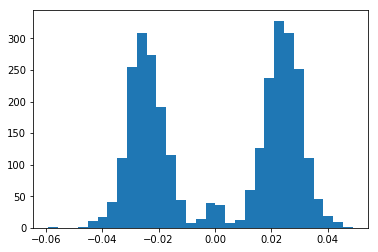

In [23]:
bscoresR = array(bscoresR)
hist(bscoresR,bins=31)

In [29]:
selectedROISR = array(selectedROISR)
selROISR = selectedROISR[(-abs(selectedROISR[:,1])).argsort(),:]

In [30]:
selROISR

array([[ 3.71000000e+02,  4.45514483e-02],
       [ 8.17000000e+02, -4.35131822e-02],
       [ 2.20000000e+01,  4.29640976e-02],
       [ 1.67000000e+02,  4.20024049e-02],
       [ 8.88000000e+02, -4.19004419e-02],
       [ 5.57000000e+02, -4.17248599e-02],
       [ 9.80000000e+02,  4.10974635e-02],
       [ 9.12000000e+02, -3.98423244e-02],
       [ 2.08000000e+02, -3.96528992e-02],
       [ 9.95000000e+02,  3.88967034e-02],
       [ 5.72000000e+02, -3.88761989e-02],
       [ 6.52000000e+02, -3.85094999e-02],
       [ 8.00000000e+02,  3.83102140e-02],
       [ 6.74000000e+02,  3.69354183e-02],
       [ 1.56000000e+02, -3.66765894e-02],
       [ 7.04000000e+02, -3.65470388e-02],
       [ 9.66000000e+02, -3.61543064e-02],
       [ 9.73000000e+02,  3.61095341e-02],
       [ 3.23000000e+02,  3.58367547e-02],
       [ 8.08000000e+02, -3.54124260e-02],
       [ 3.51000000e+02,  3.52784155e-02],
       [ 6.37000000e+02, -3.52557336e-02],
       [ 6.76000000e+02,  3.52249657e-02],
       [ 4.

# Detente!


In [ ]:
import pickle

In [39]:
bscoresR = array([0])
selectedROISR = []
with open("./fullstats.dat","rb") as f:
    fullstats = pickle.load(f)
    
#i = randint(0,wave.shape[0]//2)
for i in range(wave.shape[0]//2):
    #print(i)
    stats = fullstats[i][0]
    try:
        mm,ee = stats["F Burst score per time"]
        mfbs = mm/ee
        mFt = stats["F Burst score"][0]
        mm,ee = stats["R Burst score per time"]
        mRbs = mm/ee
        mRt = stats["R Burst score"][0]
        mm,ee = stats["Selected dR"]
        mseldR = mm/ee
        mm,ee = stats["Selected dF/F"]
        mseldF = mm/ee
        
        scores = [i,mfbs,mFt,mRbs,mRt,mseldR,mseldF]
        print(scores)
        selectedROISR.append(scores)
    except:
        pass


[0, -1.1329014329434495, -0.13438089596770664, -1.1329014329434495, -0.13438089596770664, 1.2748935113511506, -0.7121217698062553]
[1, -0.3740576806773323, -0.228342095181451, -0.3740576806773323, -0.228342095181451, 0.02375344898459118, -0.34592434369695774]
[2, -0.9802566457503166, -1.1241224506055445, -0.9802566457503166, -1.1241224506055445, -3.1257126562073165, -3.6677845195059207]
[3, -1.008491545465426, -0.9890140865612652, -1.008491545465426, -0.9890140865612652, 1.8274187716883319, -2.020998459959076]
[8, -1.0927982886030243, -0.5995916451678512, -1.0927982886030243, -0.5995916451678512, -0.35666301130805395, -2.0824079537780507]
[9, 1.290545888879183, 1.3433734939759039, 1.290545888879183, 1.3433734939759039, 5.310730685637669, 3.5481656375962034]
[10, -1.2615530709324503, -1.1814352385923177, -1.2615530709324503, -1.1814352385923177, 0.1359271281570854, -4.720299366661753]
[14, -0.4923422927610259, -0.3905187115751944, -0.4923422927610259, -0.3905187115751944, 3.330937296180

In [40]:
scoresROIS =  array(selectedROISR)

In [56]:
scoresROIS[((-abs(scoresROIS[:,2])).argsort())[:10],0]

array([762.,  21., 449., 881., 960., 205., 299., 503., 508., 526.])

In [66]:
#bscoresR = array([0])
#selectedROISR = []
with open("./fullstats.dat","rb") as f:
    fullstats = pickle.load(f)
    
#i = randint(0,wave.shape[0]//2)
print("Selection for dR")
selectionR = [102,45,58,89,118,566,591,619,374,695,1010]
selectionR.sort()
for i in selectionR:
    #print(i)
    stats = fullstats[i][0]
    try:
        mm,ee = stats["Selected dR"]
        mseldR = mm/ee
        print("Particle",i,": %.4f +/- %.4f" %(mm,ee) )

    except:
        pass
    
print("\n Selection for dF")
selectionR = [102,10,93,96,221,964,967,1010]
selectionR.sort()
for i in selectionR:
    #print(i)
    stats = fullstats[i][0]
    try:
        mm,ee = stats["Selected dF/F"]
        mseldR = mm/ee
        print("Particle",i,": %.4f +/- %.4f" %(mm,ee) )

    except:
        pass
    
print("\n Control:")
print("Selection for dR")
selectionR = [102,45,58,89,118,566,591,619,374,695,1010]
selectionR.sort()
for i in selectionR:
    #print(i)
    stats = fullstats[i][1]
    try:
        mm,ee = stats["Selected dR"]
        mseldR = mm/ee
        print("Particle",i,": %.4f +/- %.4f" %(mm,ee) )

    except:
        pass
    
print("\n Selection for dF")
selectionR = [102,10,93,96,221,964,967,1010]
selectionR.sort()
for i in selectionR:
    #print(i)
    stats = fullstats[i][1]
    try:
        mm,ee = stats["Selected dF/F"]
        mseldR = mm/ee
        print("Particle",i,": %.4f +/- %.4f" %(mm,ee) )

    except:
        pass


Selection for dR
Particle 45 : -0.0104 +/- 0.0060
Particle 58 : -0.0348 +/- 0.0054
Particle 89 : -0.0085 +/- 0.0062
Particle 102 : 0.0108 +/- 0.0036
Particle 118 : 0.0289 +/- 0.0050
Particle 374 : -0.0332 +/- 0.0077
Particle 566 : -0.0194 +/- 0.0027
Particle 591 : -0.0040 +/- 0.0051
Particle 619 : 0.0175 +/- 0.0042
Particle 695 : 0.0317 +/- 0.0055
Particle 1010 : 0.0322 +/- 0.0088

 Selection for dF
Particle 10 : -0.0844 +/- 0.0179
Particle 93 : -0.0544 +/- 0.0158
Particle 96 : -0.0692 +/- 0.0129
Particle 102 : 0.0851 +/- 0.0164
Particle 221 : 0.0023 +/- 0.0163
Particle 964 : 0.0136 +/- 0.0099
Particle 967 : -0.0477 +/- 0.0194
Particle 1010 : -0.0624 +/- 0.0090

 Control:
Selection for dR
Particle 45 : -0.0043 +/- 0.0051
Particle 58 : -0.0164 +/- 0.0037
Particle 89 : 0.0095 +/- 0.0057
Particle 102 : -0.0012 +/- 0.0060
Particle 118 : -0.0052 +/- 0.0100
Particle 374 : -0.0083 +/- 0.0072
Particle 566 : -0.0100 +/- 0.0080
Particle 591 : 0.0243 +/- 0.0066
Particle 619 : -0.0096 +/- 0.0051
P